# An analysis of Work From Home

## Step 1: Data Engineering

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

df = pd.read_csv('https://raw.githubusercontent.com/majickdave/wfh_analysis/master/wfh.csv')

df.head()

,Month,Business Days,Back/Front Office,BU,AHT,Attrition Count,Attrition %,Shrink,Monthly System Outage (hours),Daily System Outage (hours),...,Monthly Unplanned Out (hours),Daily Unplanned Out (hours),Monthly Planned Out (hours),Daily Planned Out (hours),Adherence,Conformance,ACW/ Call (seconds),AVG Hold Time (seconds),Monthly Processing-No Work (minutes),Daily Processing-No Work (minutes)
0,Jan-2019,21,Back Office,RAM,853.0,4.0,4.49%,34.06%,0.0,0.0,...,68.75,3.27,441.00,21.00,90.08%,94.03%,NaN,NaN,NaN,#VALUE!
1,Feb-2019,19,Back Office,RAM,904.0,3.0,2.83%,34.85%,0.0,0.0,...,77.75,4.09,637.00,33.53,90.40%,93.44%,NaN,NaN,NaN,#VALUE!
2,Mar-2019,22,Back Office,RAM,913.0,8.0,8.25%,34.99%,0.0,0.0,...,129.75,5.90,856.00,38.91,92.01%,94.89%,NaN,NaN,NaN,#VALUE!
3,Apr-2019,21,Back Office,RAM,897.0,6.0,6.00%,27.08%,0.0,0.0,...,60.50,2.88,710.77,33.85,92.52%,95.79%,NaN,NaN,NaN,#VALUE!
4,May-2019,20,Back Office,RAM,948.0,7.0,6.36%,36.20%,0.0,0.0,...,106.25,5.31,1155.98,57.80,92.17%,96.09%,NaN,NaN,NaN,#VALUE!


In [2]:
# modify column names
df.columns = ['Month', 'Business Days', 'Back/Front Office', 'BU', 'AHT',
       'Attrition Count', 'Attrition %', 'Shrink %',
       'Monthly System Outage (hours)', 'Daily System Outage (hours)',
       'Monthly Sameday Callout (hours)', 'Daily Sameday Callout (hours)',
       'Monthly Unplanned Out (hours)', 'Daily Unplanned Out (hours)',
       'Monthly Planned Out (hours)', 'Daily Planned Out (hours)', 'Adherence %',
       'Conformance %', 'ACW/ Call (seconds)', 'AVG Hold Time (seconds)',
       'Monthly Processing-No Work (minutes)',
       'Daily Processing-No Work (minutes)']

## Drop RAM PD and RIS PD from the analysis 
those BU's aren't on the phones

In [3]:
df = df[~df['BU'].isin(['RAM PD', 'RIS PD'])]

## Drop attrition count, drop daily outage, drop daily callout, drop dailies

These columns may not be informative.

In [4]:
## create a new dataframe with the desired columns
df = df[['Month', 'BU', 'AHT', 'Attrition %', 'Back/Front Office',
       'Shrink %', 'Monthly System Outage (hours)', 'Monthly Sameday Callout (hours)',
       'Monthly Unplanned Out (hours)', 'Monthly Planned Out (hours)', 'Adherence %', 
       'Conformance %', 'ACW/ Call (seconds)', 'AVG Hold Time (seconds)',
       'Monthly Processing-No Work (minutes)']]

In [5]:
# reformat date index
df=df.rename(columns = {'Month':'date'})
df.index = pd.to_datetime(df['date'])
df = df.drop('date', 1)

# reformat percentage
df.loc[:,['Attrition %','Shrink %', 'Adherence %', 
          'Conformance %']] = df[['Attrition %', 
                                'Shrink %', 
                                'Adherence %', 
                                'Conformance %']].replace(r'%', '', 
                                                        regex=True).astype('float') #/ 100.0



## Examine data quality of Monthly System Outage (hours)

Some BUs have not recorded this properly.

In [27]:
for bu in df['BU'].unique():
    print('\n'+bu)
    display(df[df['BU']==bu]['Monthly System Outage (hours)'])


RAM


date
2019-03-01     0.00
2019-04-01     0.00
2019-05-01     0.00
2019-06-01     0.00
2019-07-01     0.00
2020-03-01    30.92
2020-04-01    52.60
2020-05-01    27.15
2020-06-01    52.65
2020-07-01    29.40
Name: Monthly System Outage (hours), dtype: float64


WISE


date
2019-03-01     20.72
2019-04-01      7.75
2019-05-01     38.60
2019-06-01     12.58
2019-07-01      5.18
2020-03-01     34.88
2020-04-01    227.77
2020-05-01    195.73
2020-06-01    301.07
2020-07-01    313.75
Name: Monthly System Outage (hours), dtype: float64


RIS


date
2019-03-01      6.25
2019-04-01      2.85
2019-05-01     13.57
2019-06-01      9.43
2019-07-01      5.40
2020-03-01    444.67
2020-04-01    392.38
2020-05-01    336.62
2020-06-01    698.55
2020-07-01    555.20
Name: Monthly System Outage (hours), dtype: float64


RPS CT


date
2019-03-01    0.0
2019-04-01    0.0
2019-05-01    0.0
2019-06-01    0.0
2019-07-01    0.0
2020-03-01    0.0
2020-04-01    0.0
2020-05-01    0.0
2020-06-01    0.0
2020-07-01    0.0
Name: Monthly System Outage (hours), dtype: float64


RPS PT


date
2019-03-01     0.0
2019-04-01     0.0
2019-05-01     0.0
2019-06-01     7.0
2019-07-01     0.0
2020-03-01     4.8
2020-04-01    21.3
2020-05-01     7.4
2020-06-01     5.3
2020-07-01     2.0
Name: Monthly System Outage (hours), dtype: float64

In [7]:
# replace N/A and '  ' with zero
df = df.fillna(0)

## Create a month and year column

In [8]:
df['month'] = df.index.month_name()
df['year'] = df.index.year

## Analyze only January through July

In [9]:
## make copy for later
df1 = df.copy()

# index df on January through August
df = df.loc[df.index.month.isin(range(8)),:]

## Step 2: Begin Analysis

## Group by BU, year and month

Which year has a higher mean ```AHT``` for each BU?

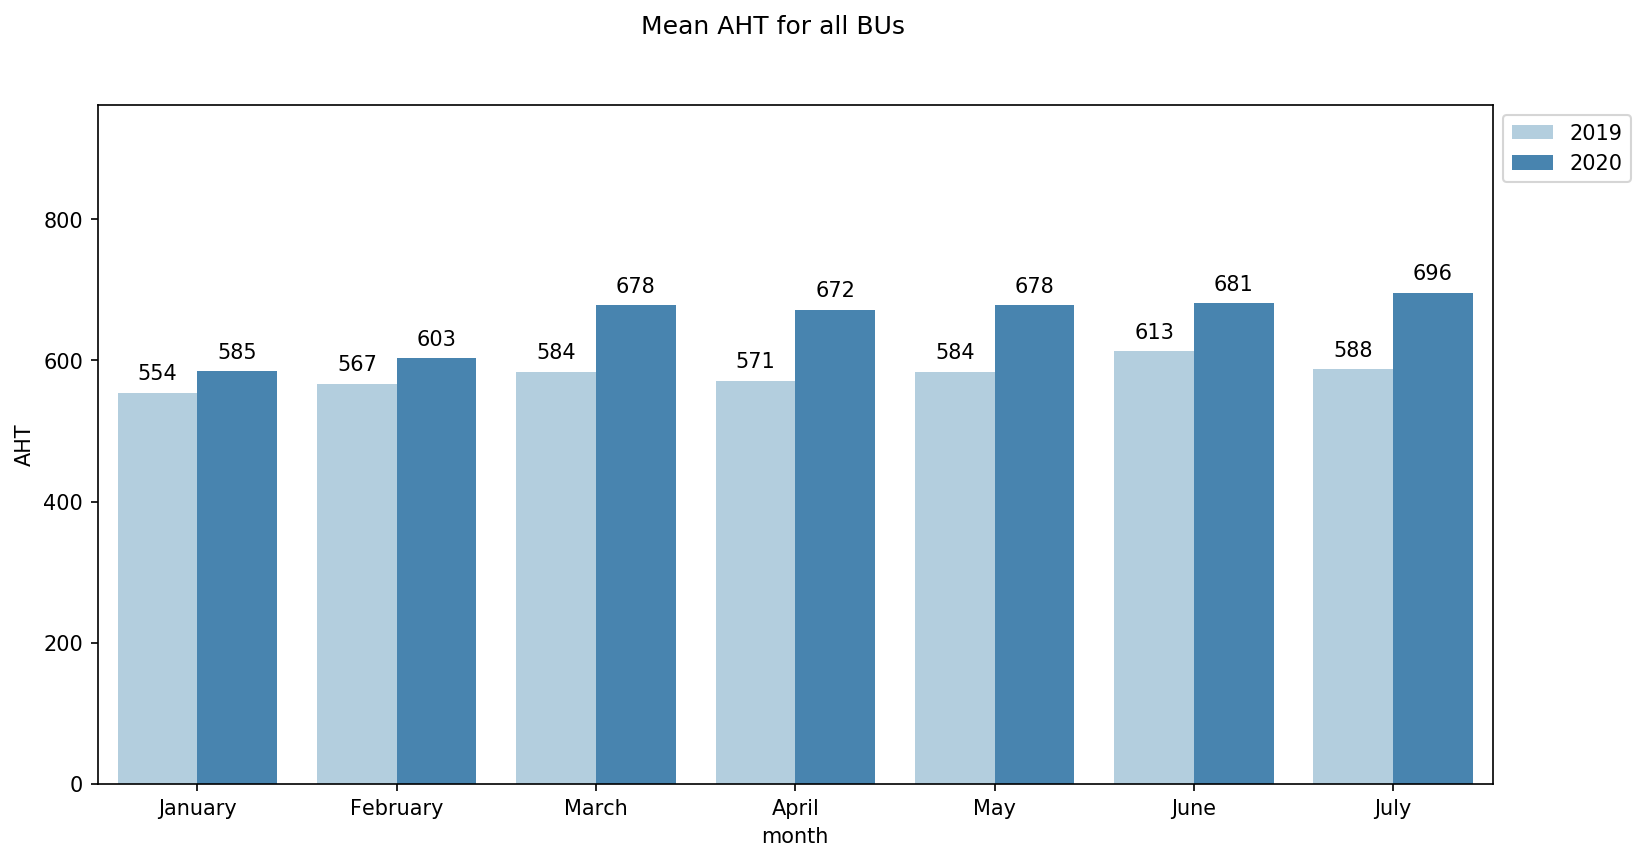

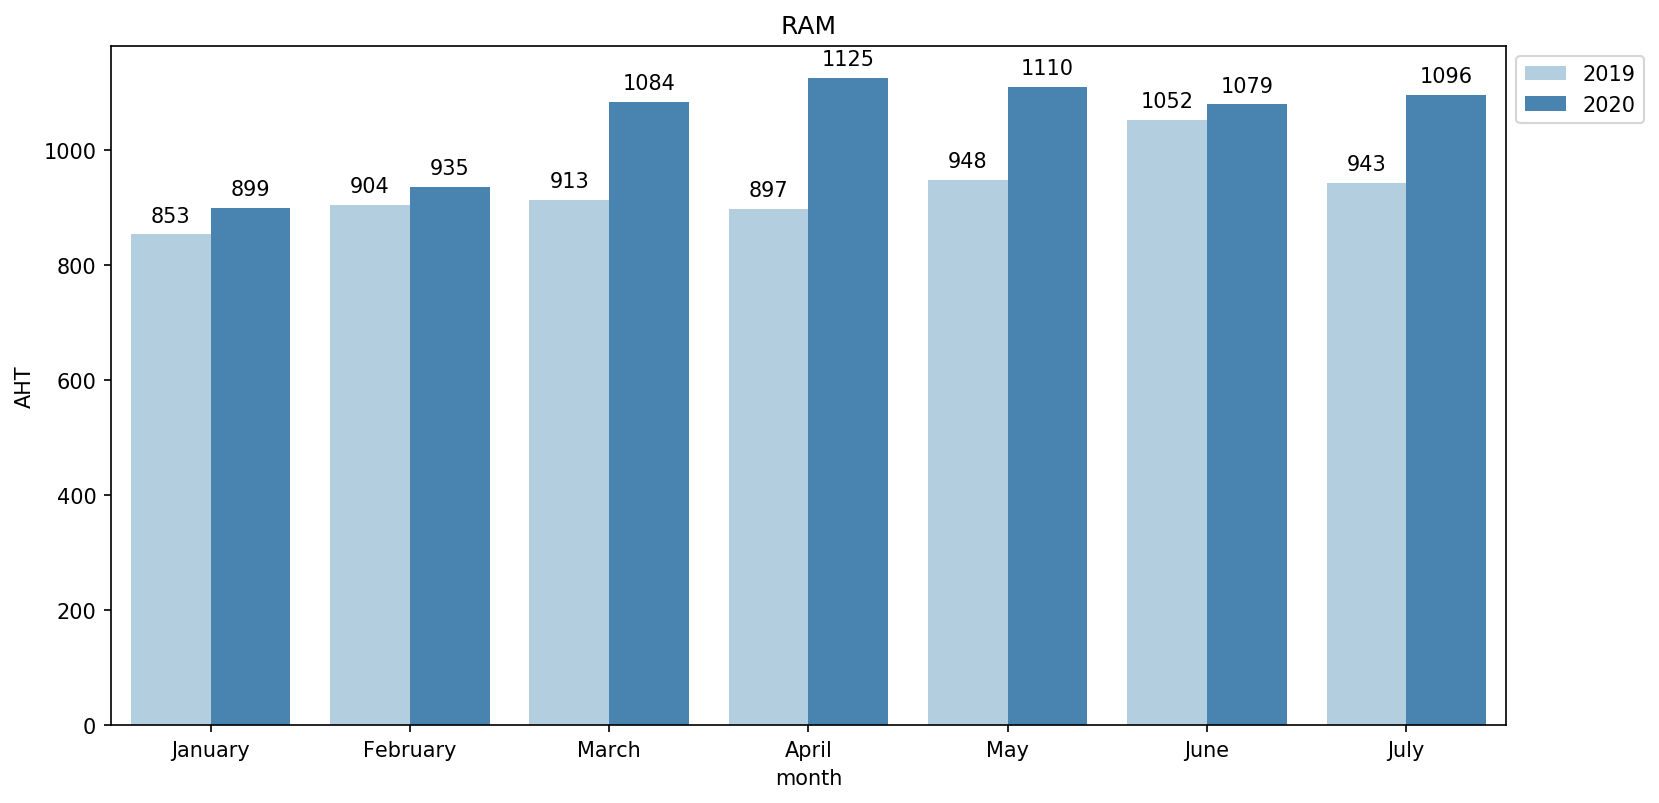

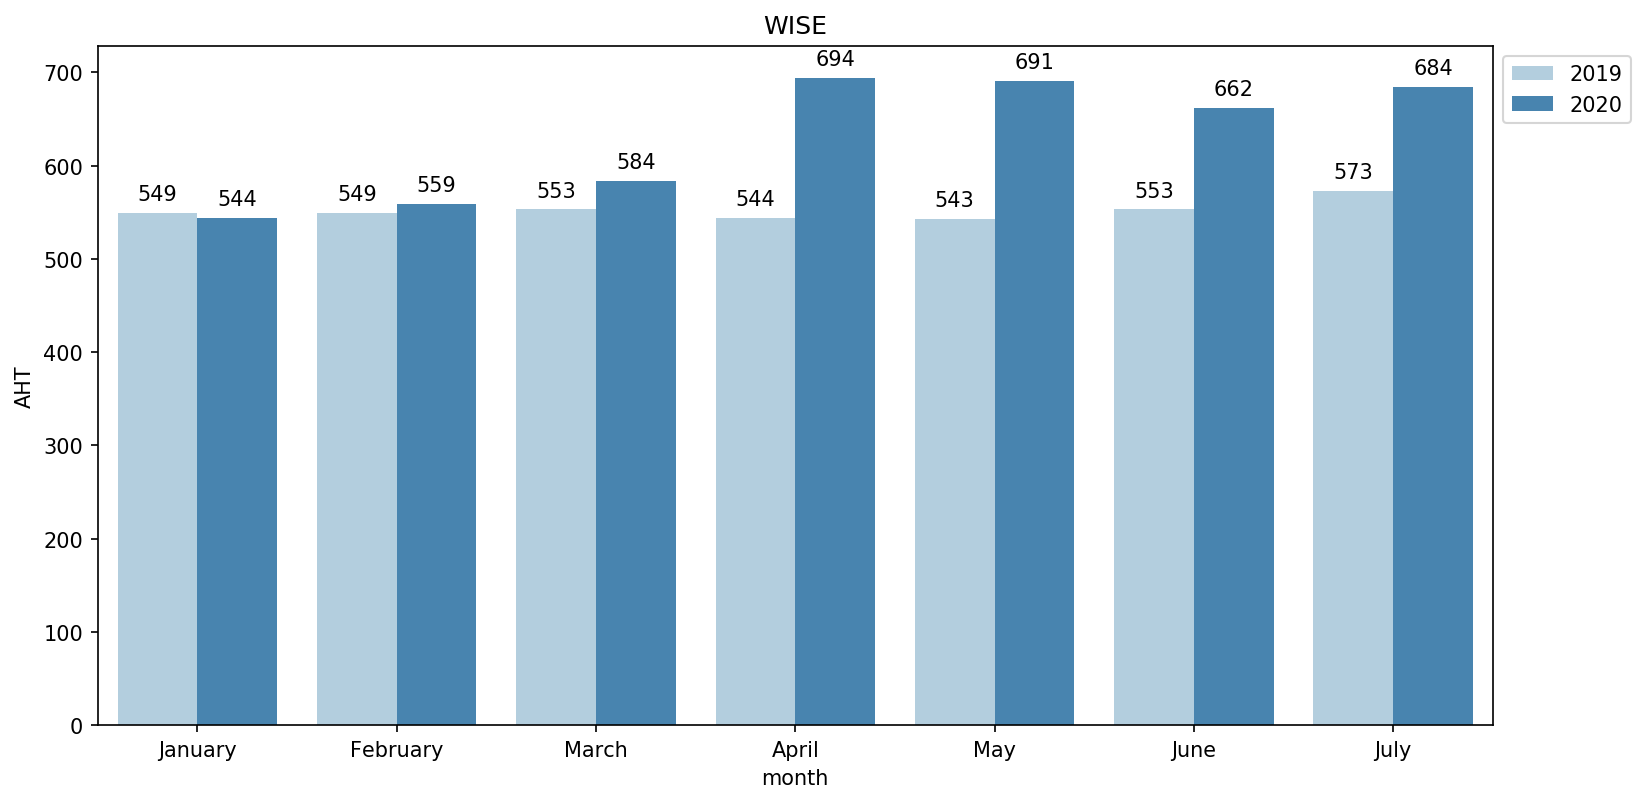

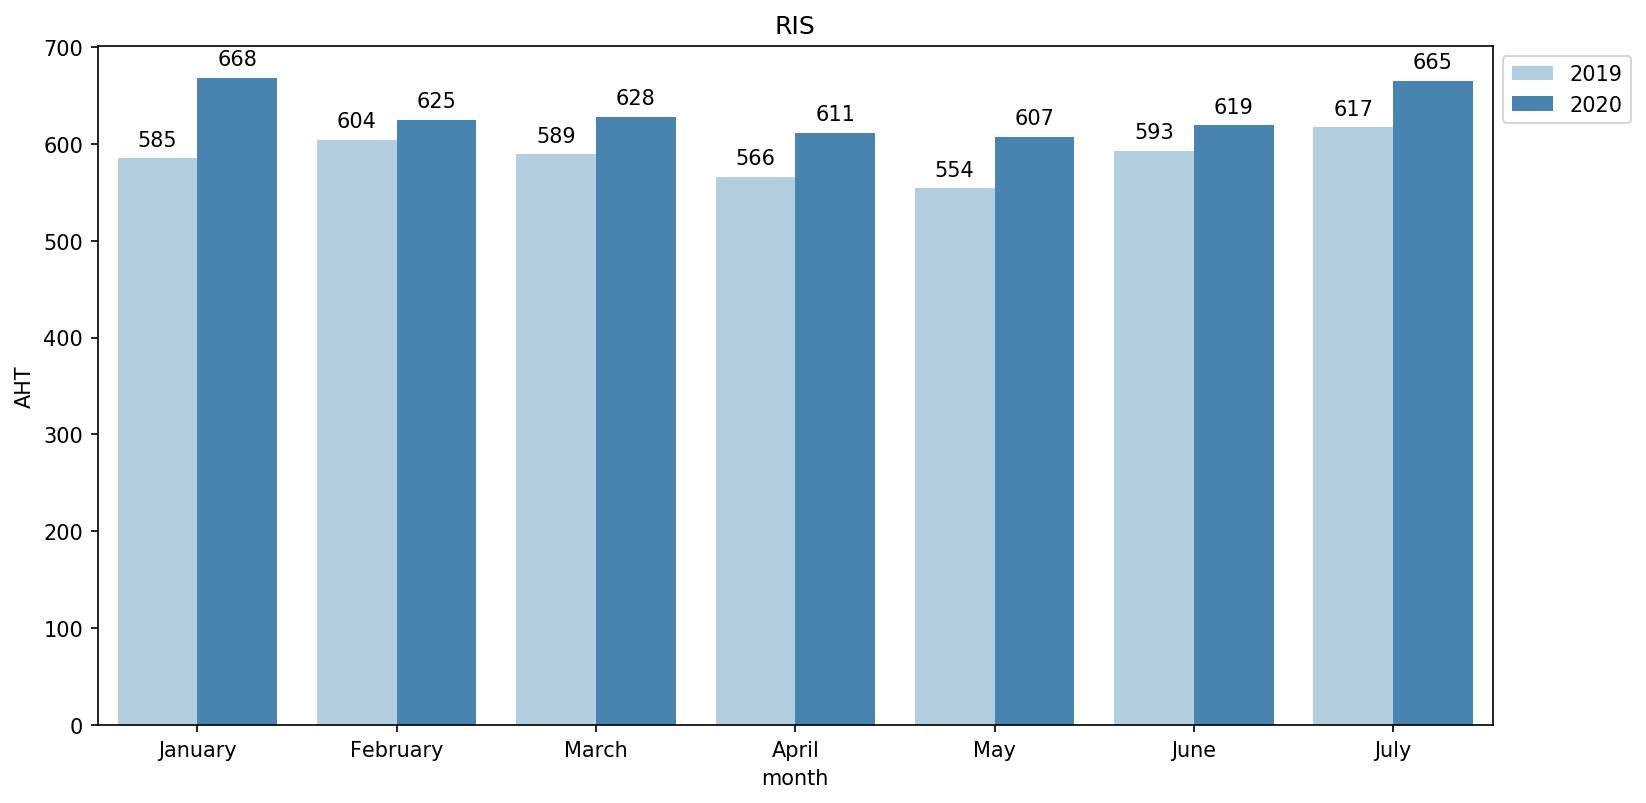

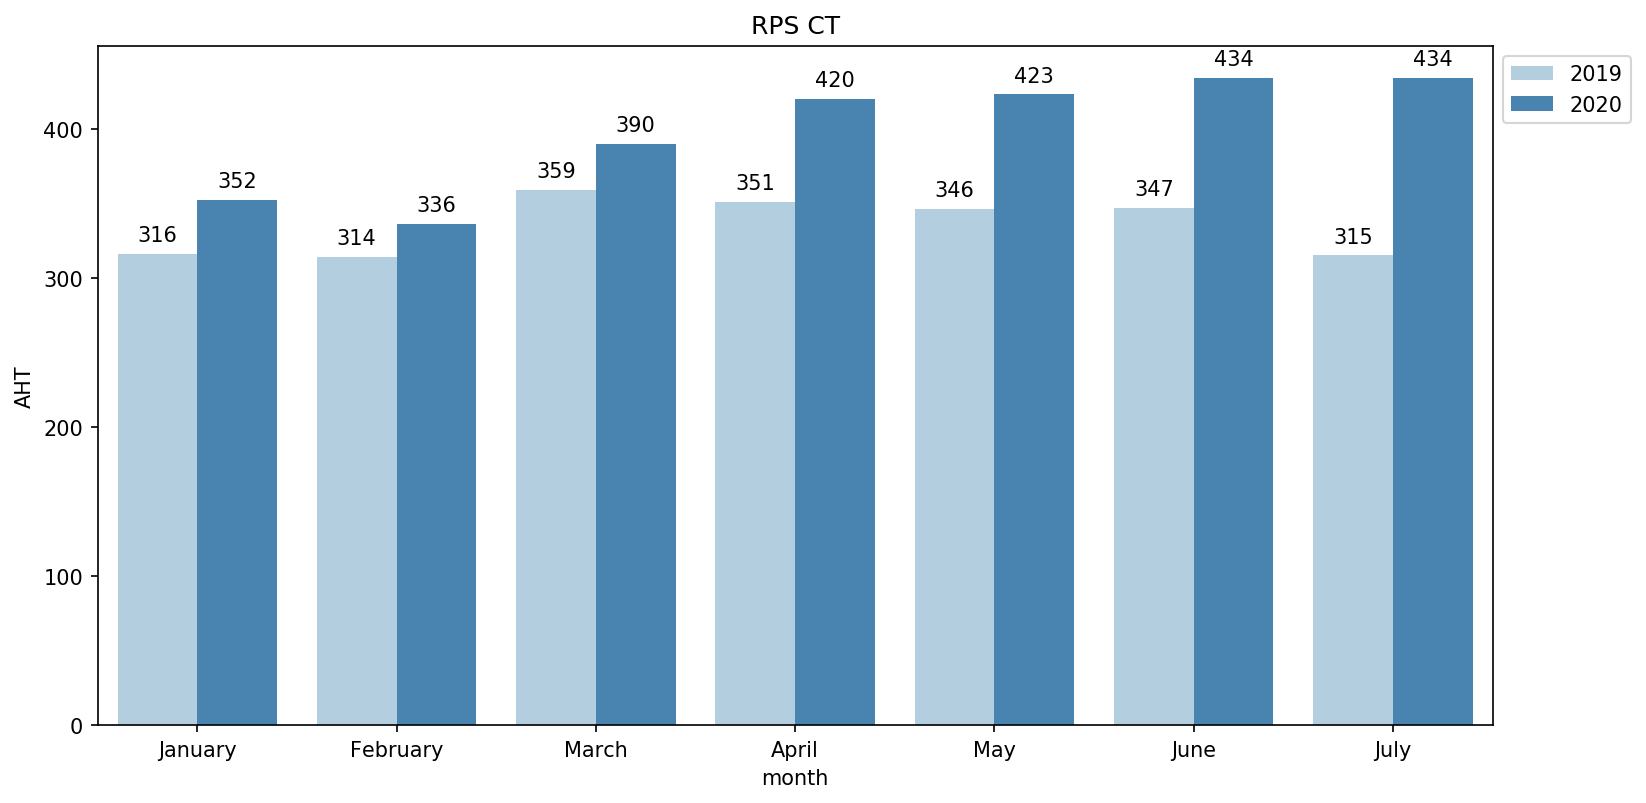

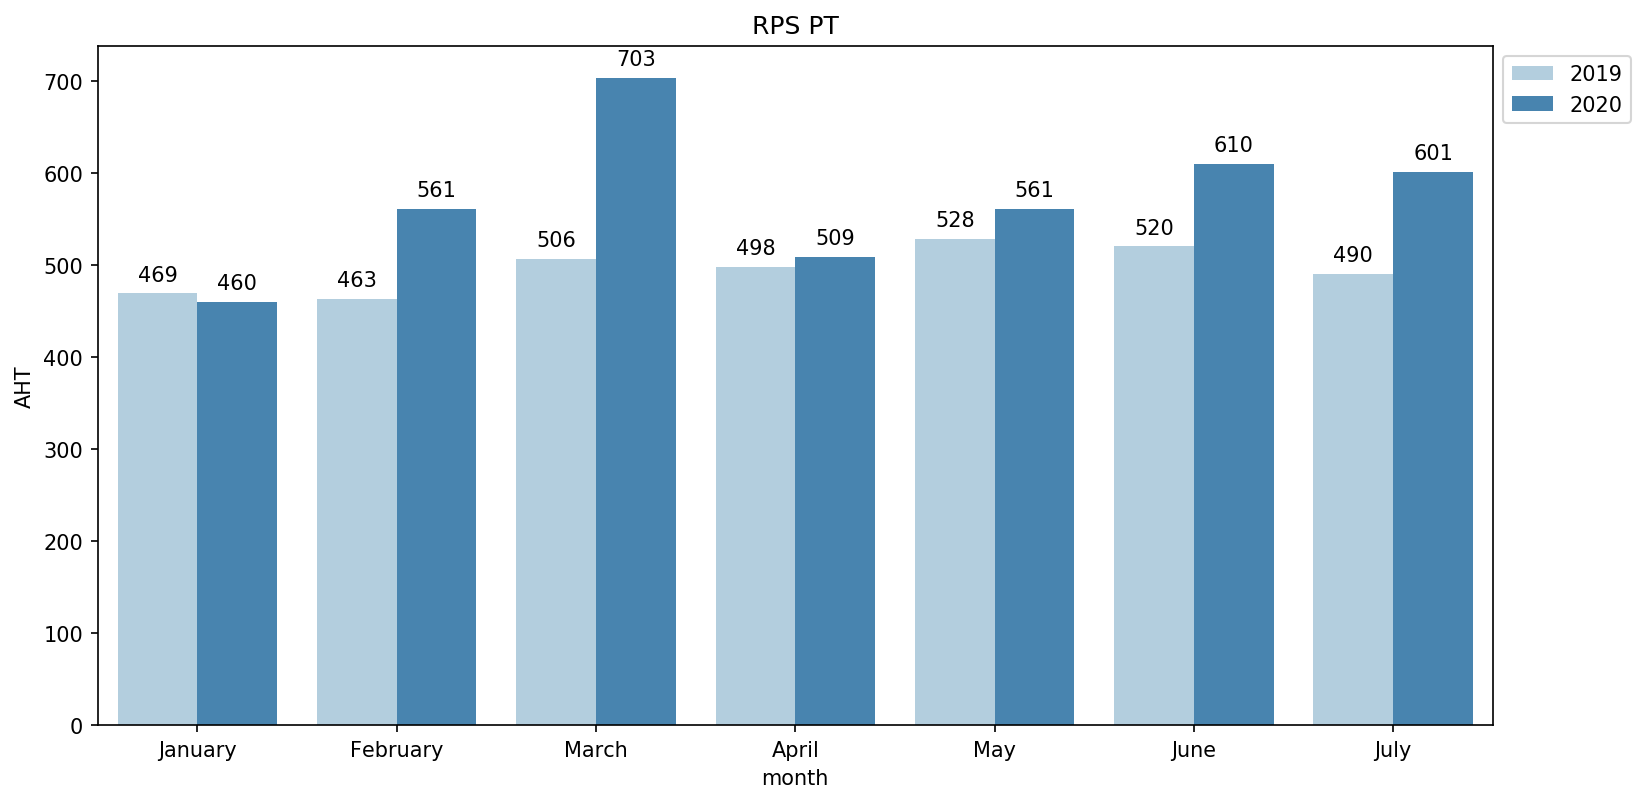

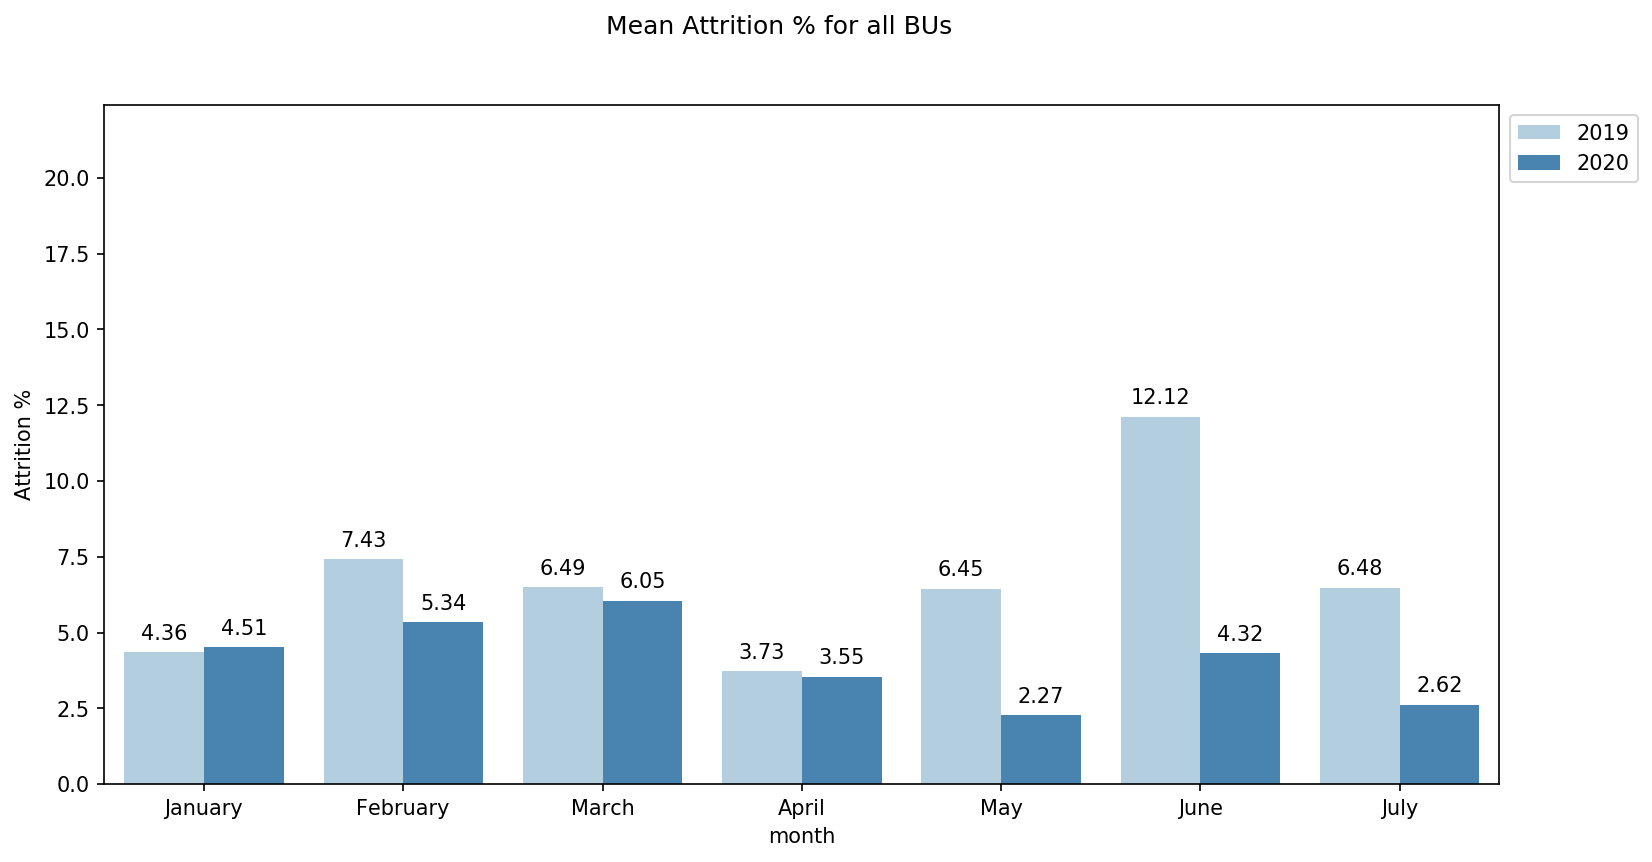

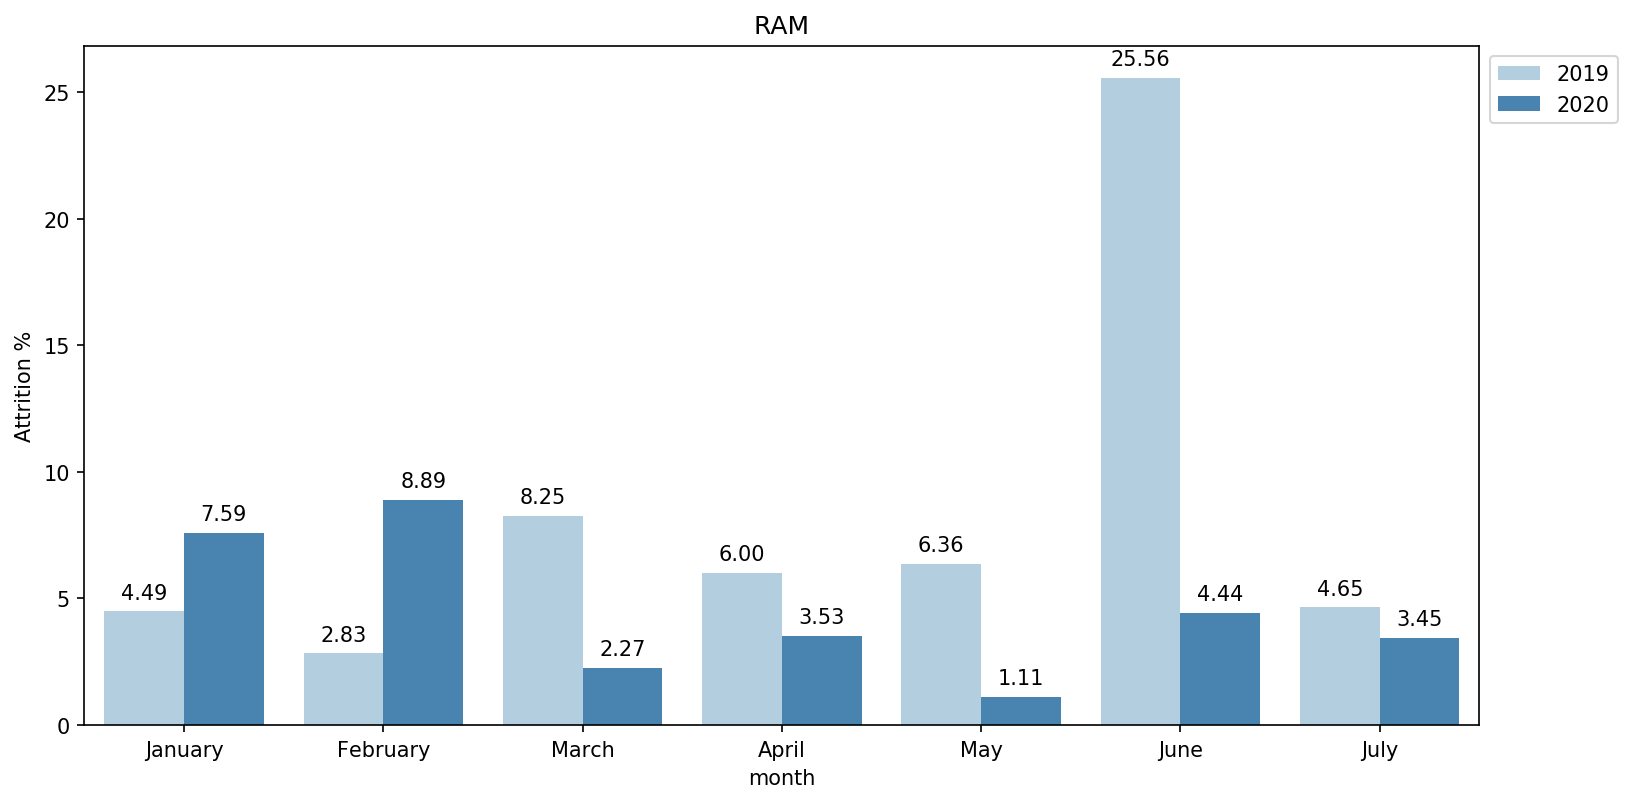

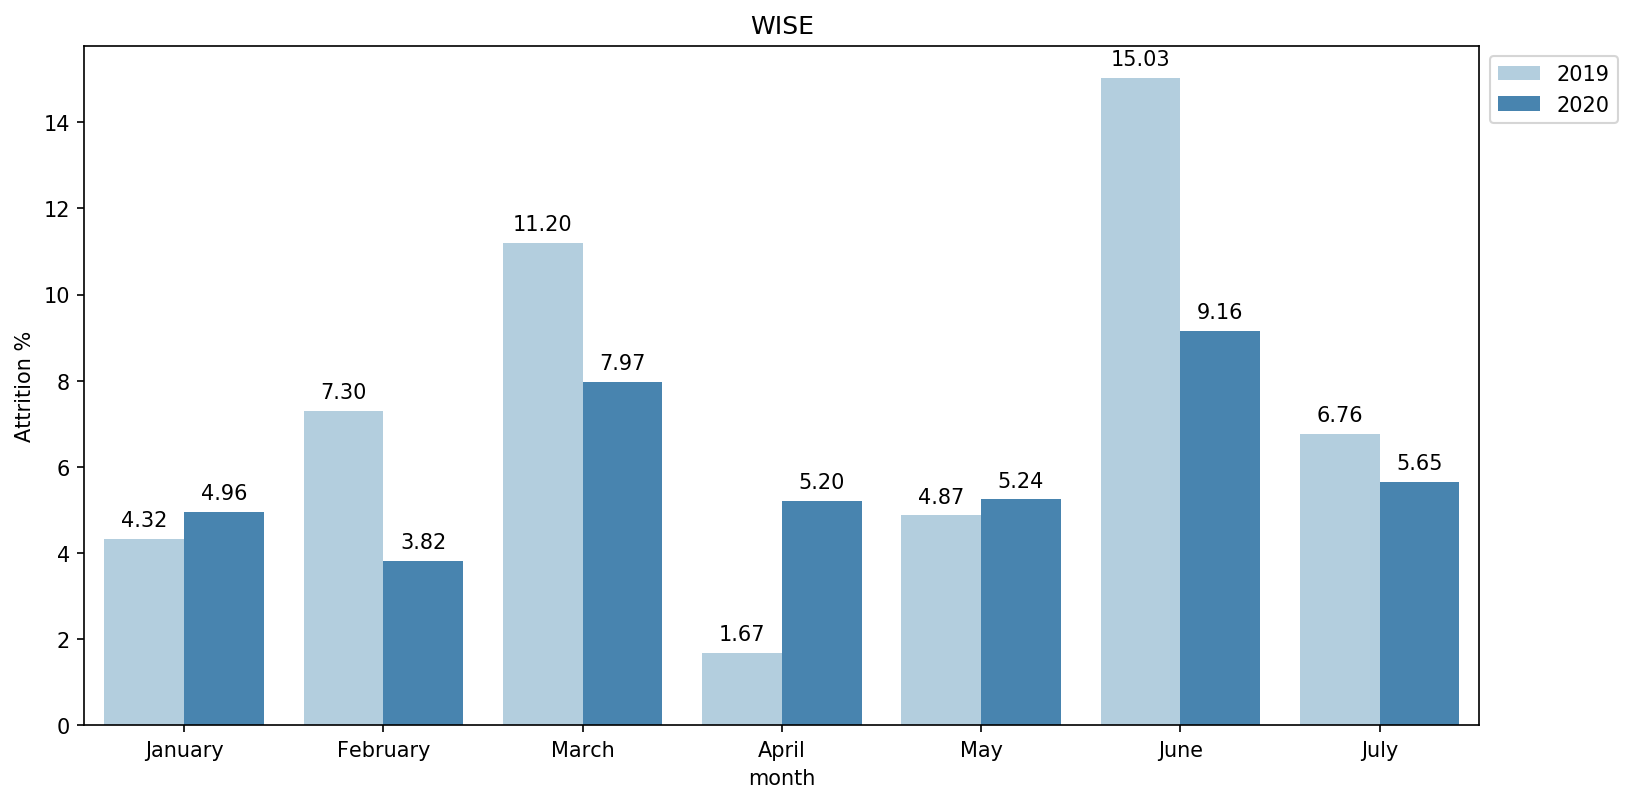

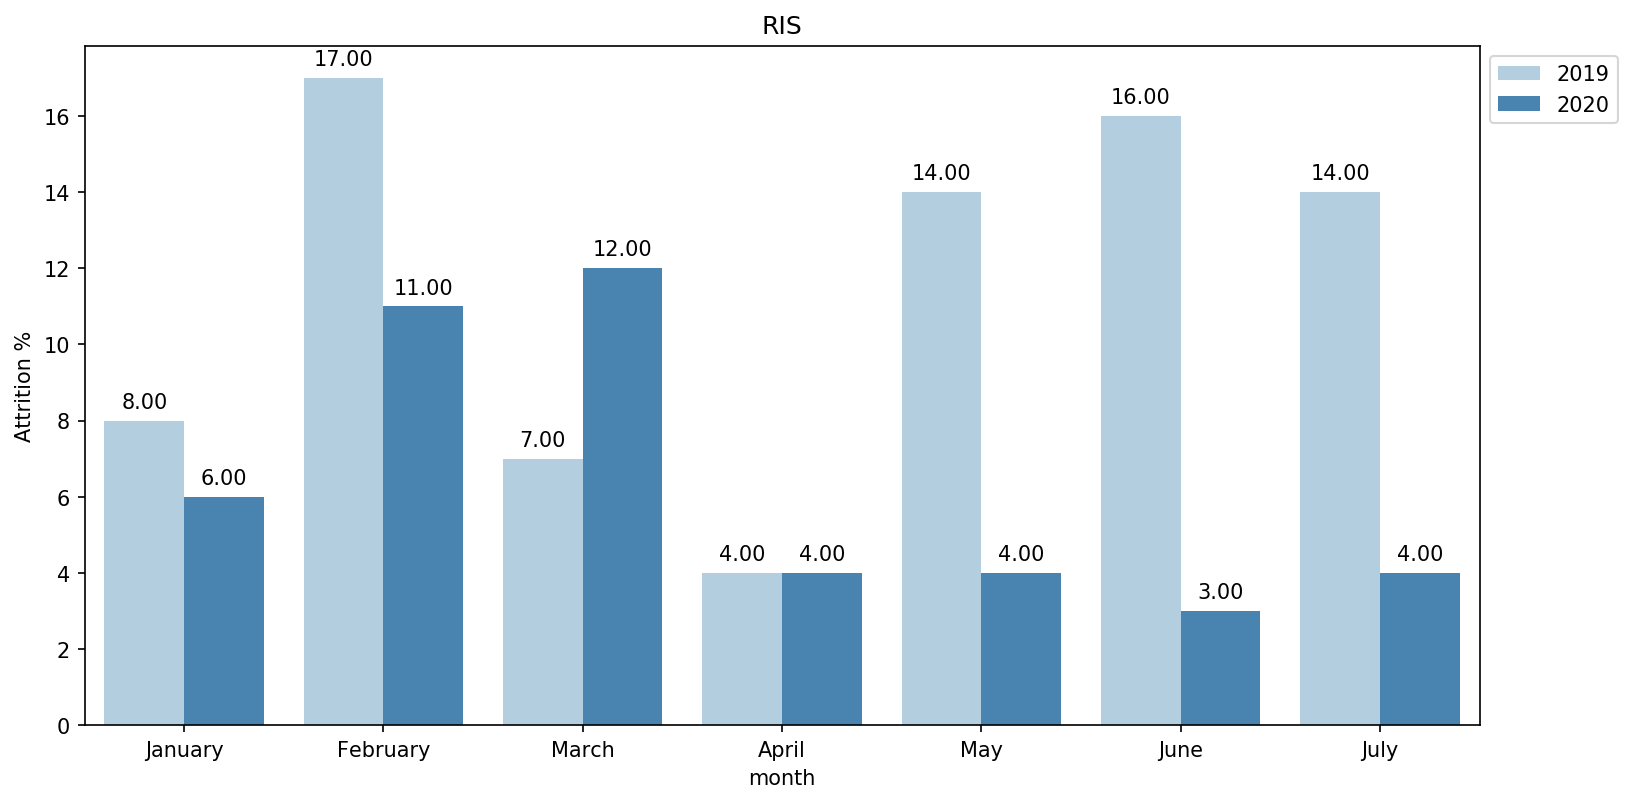

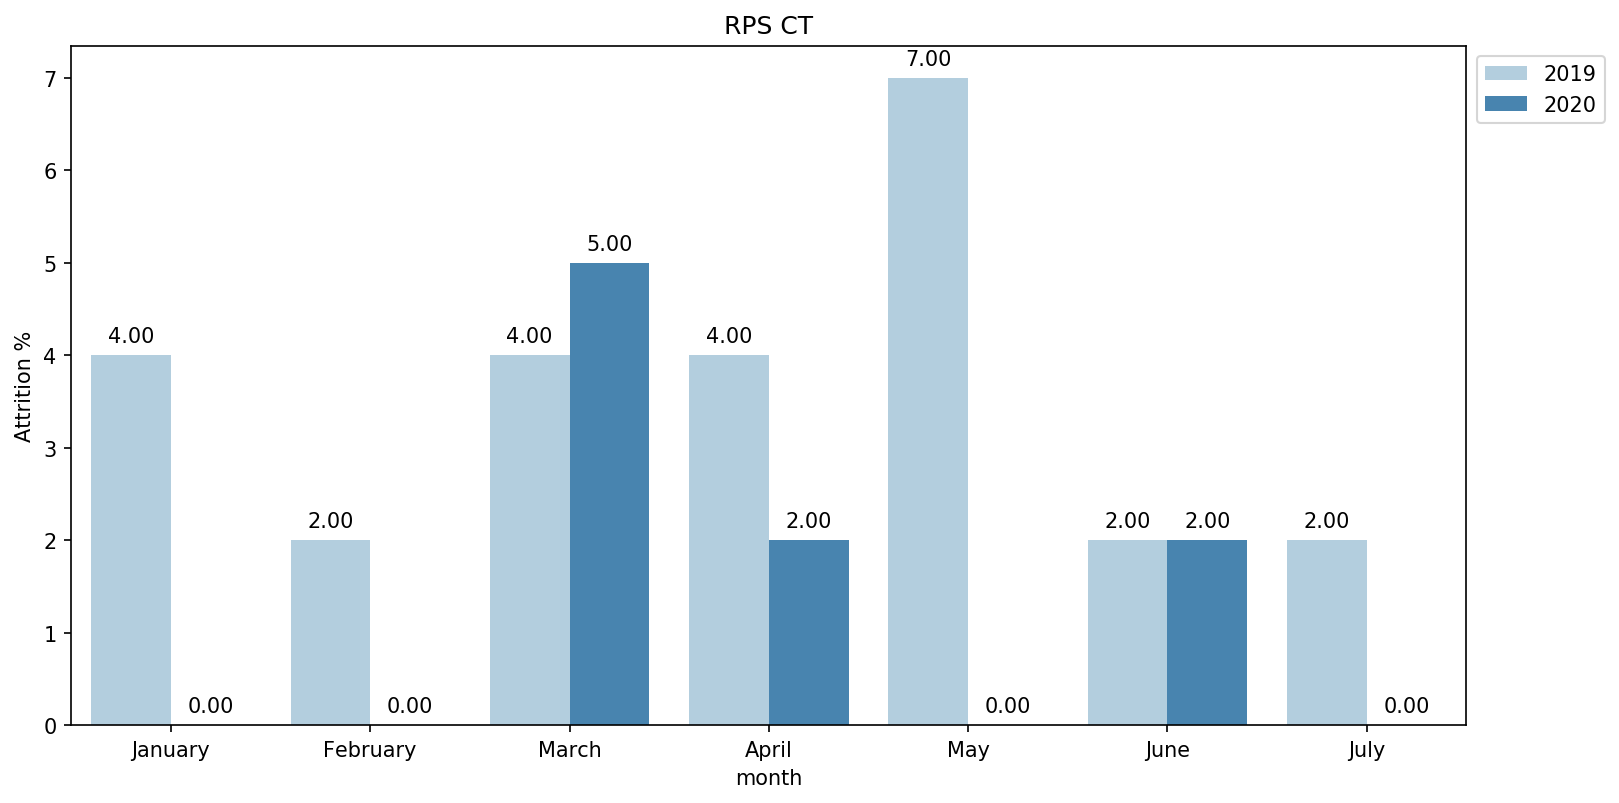

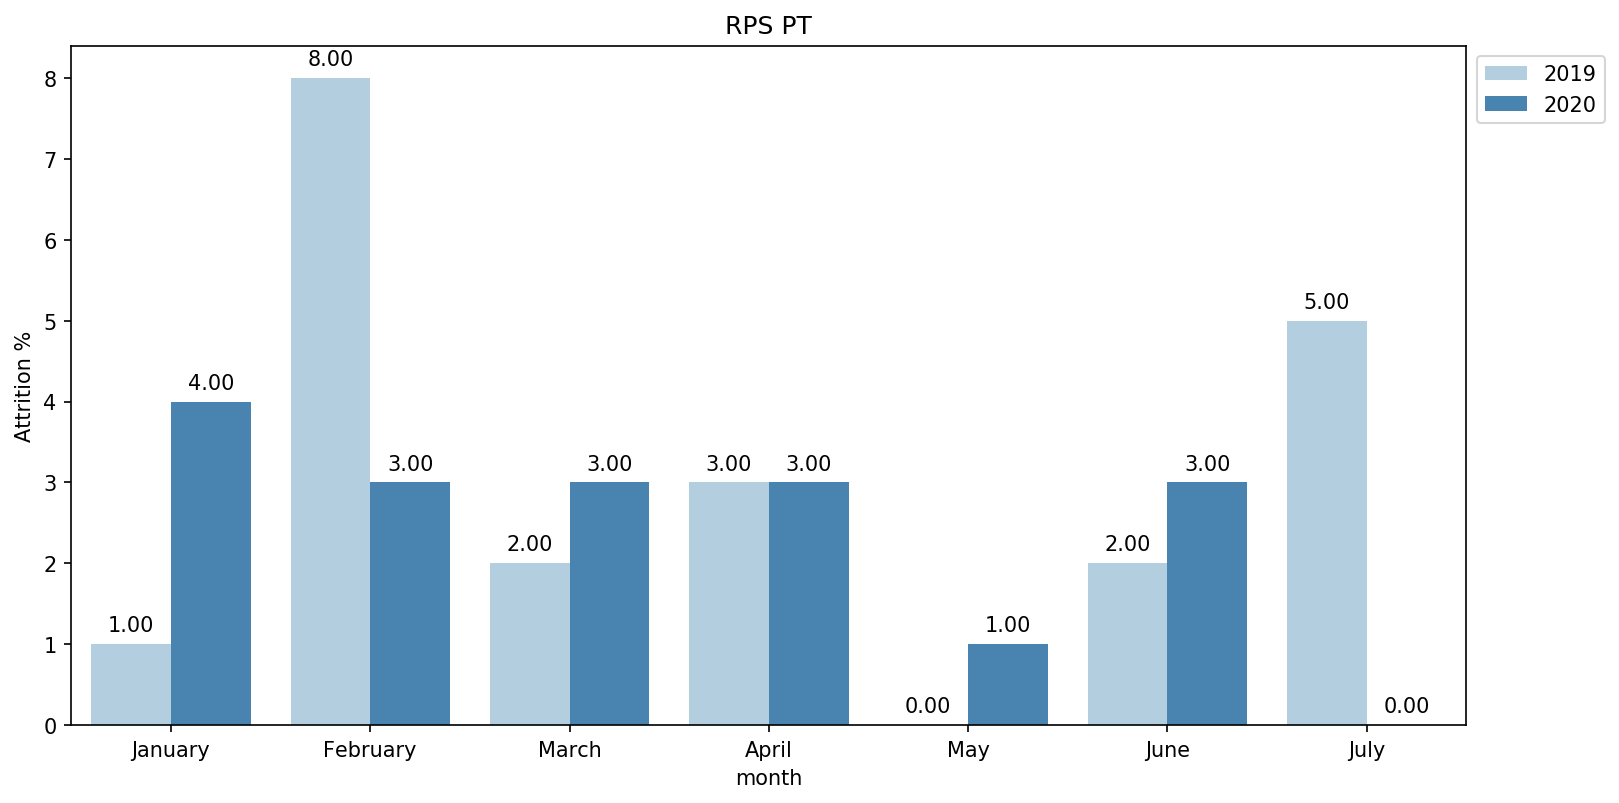

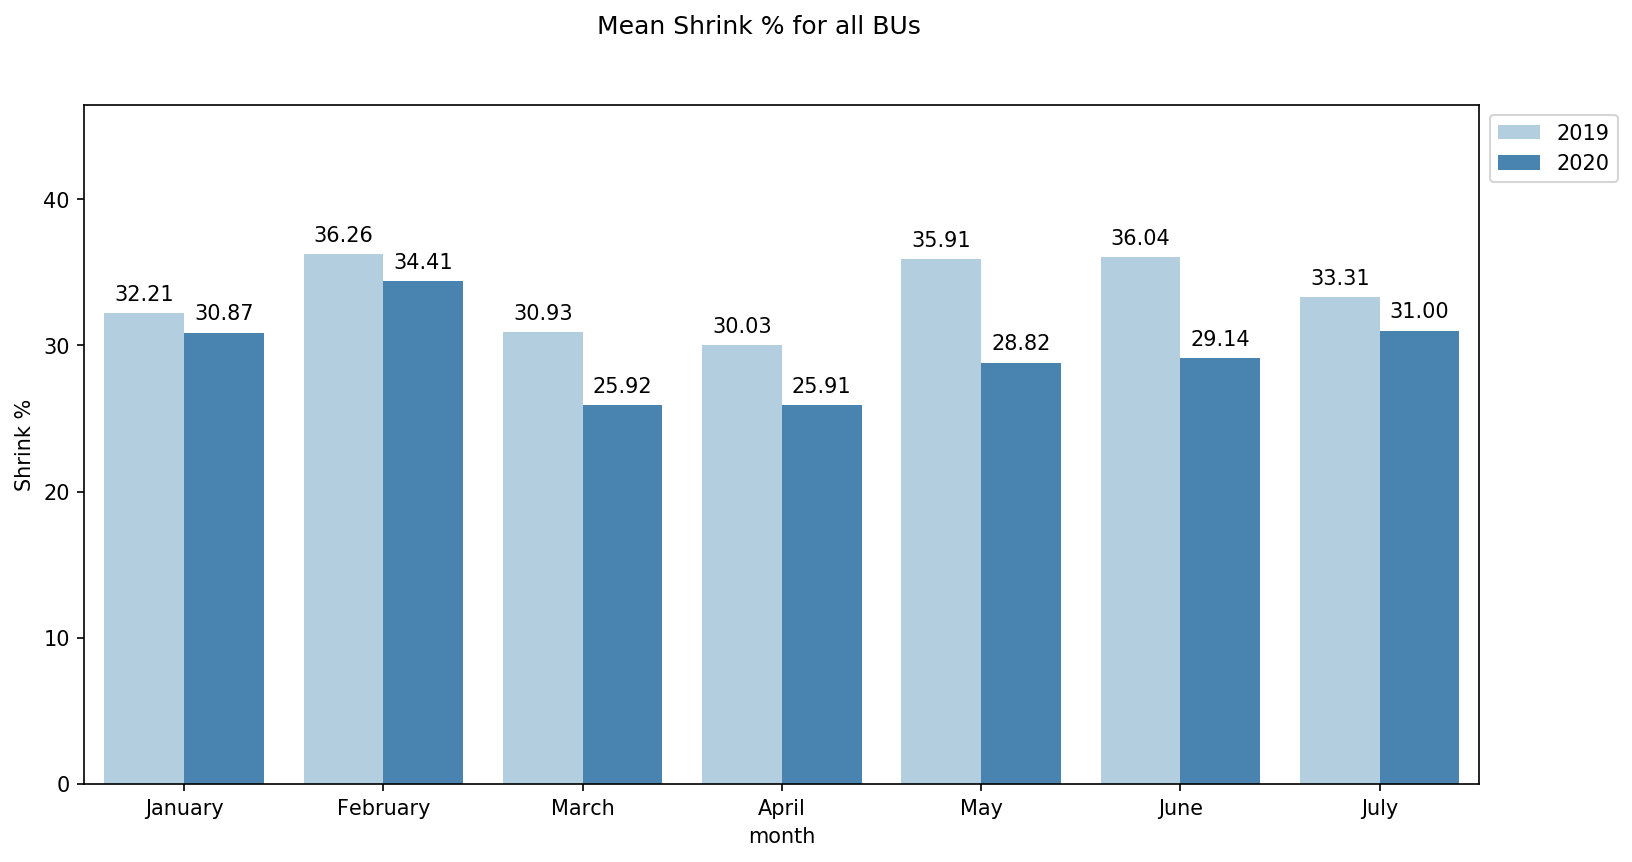

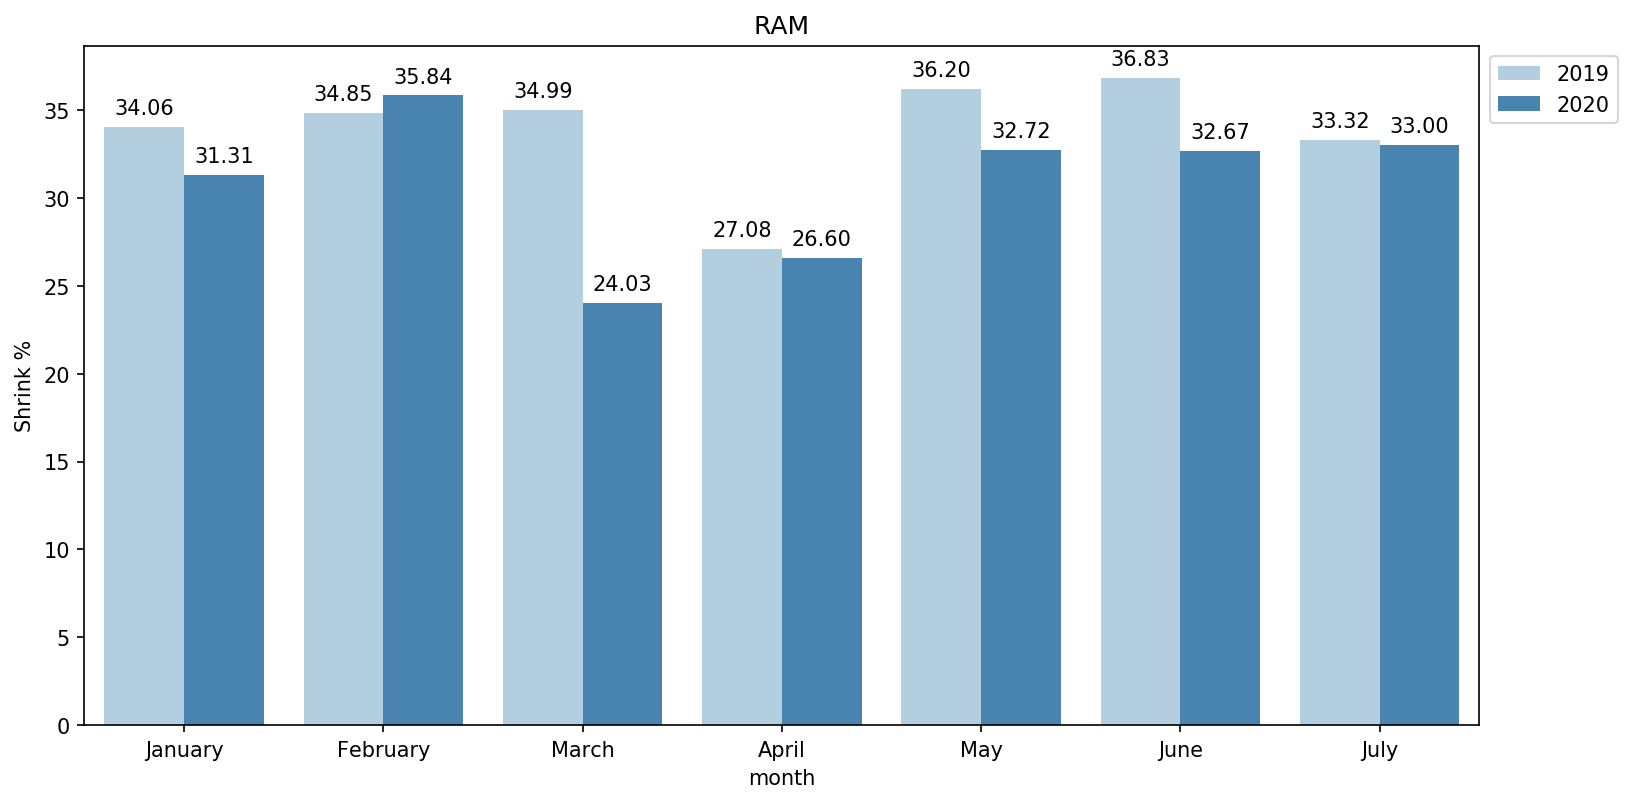

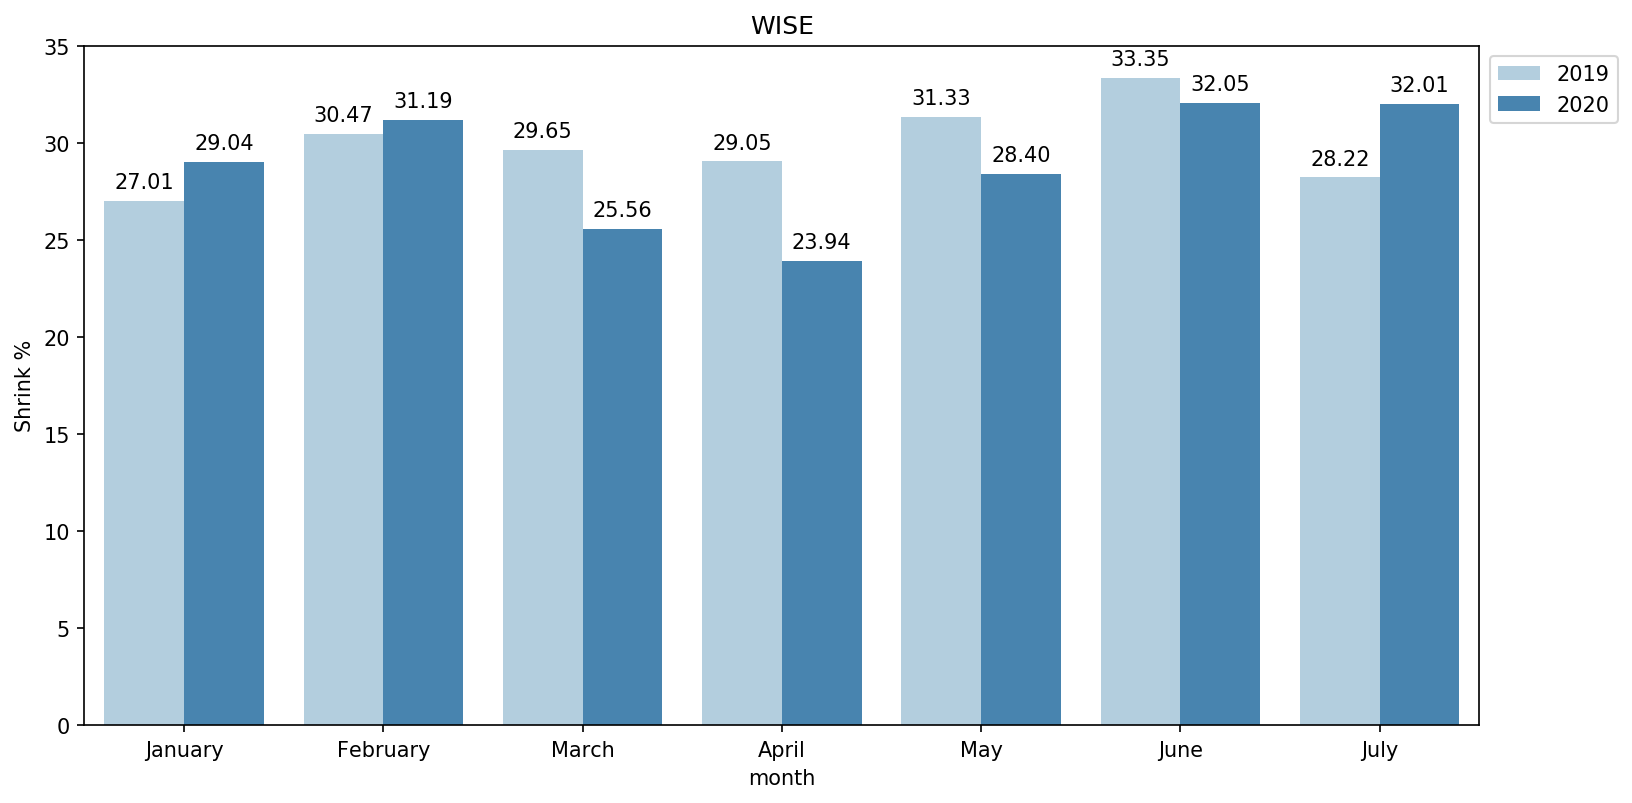

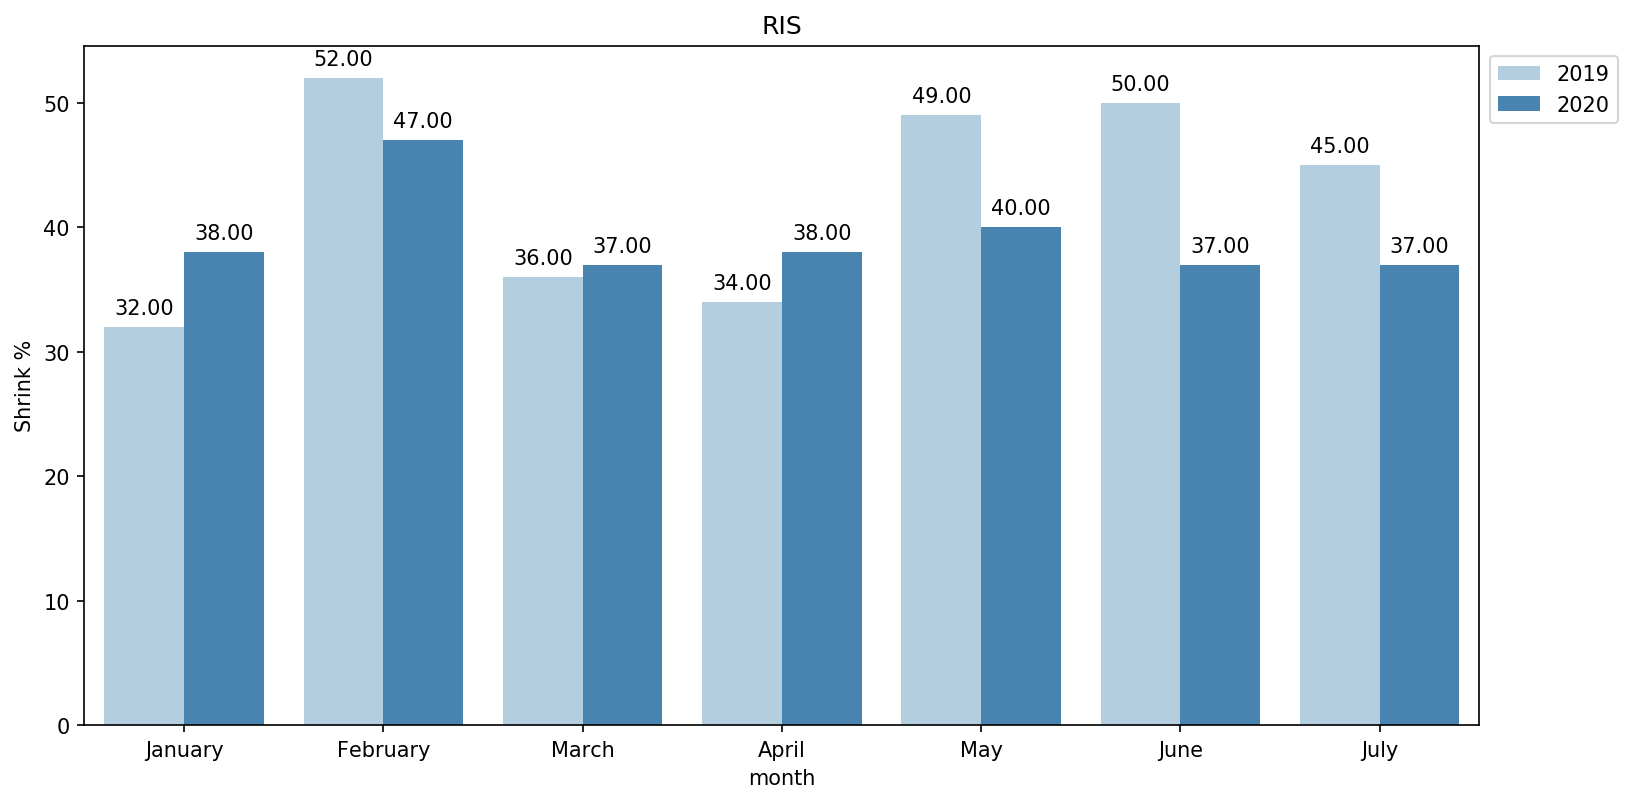

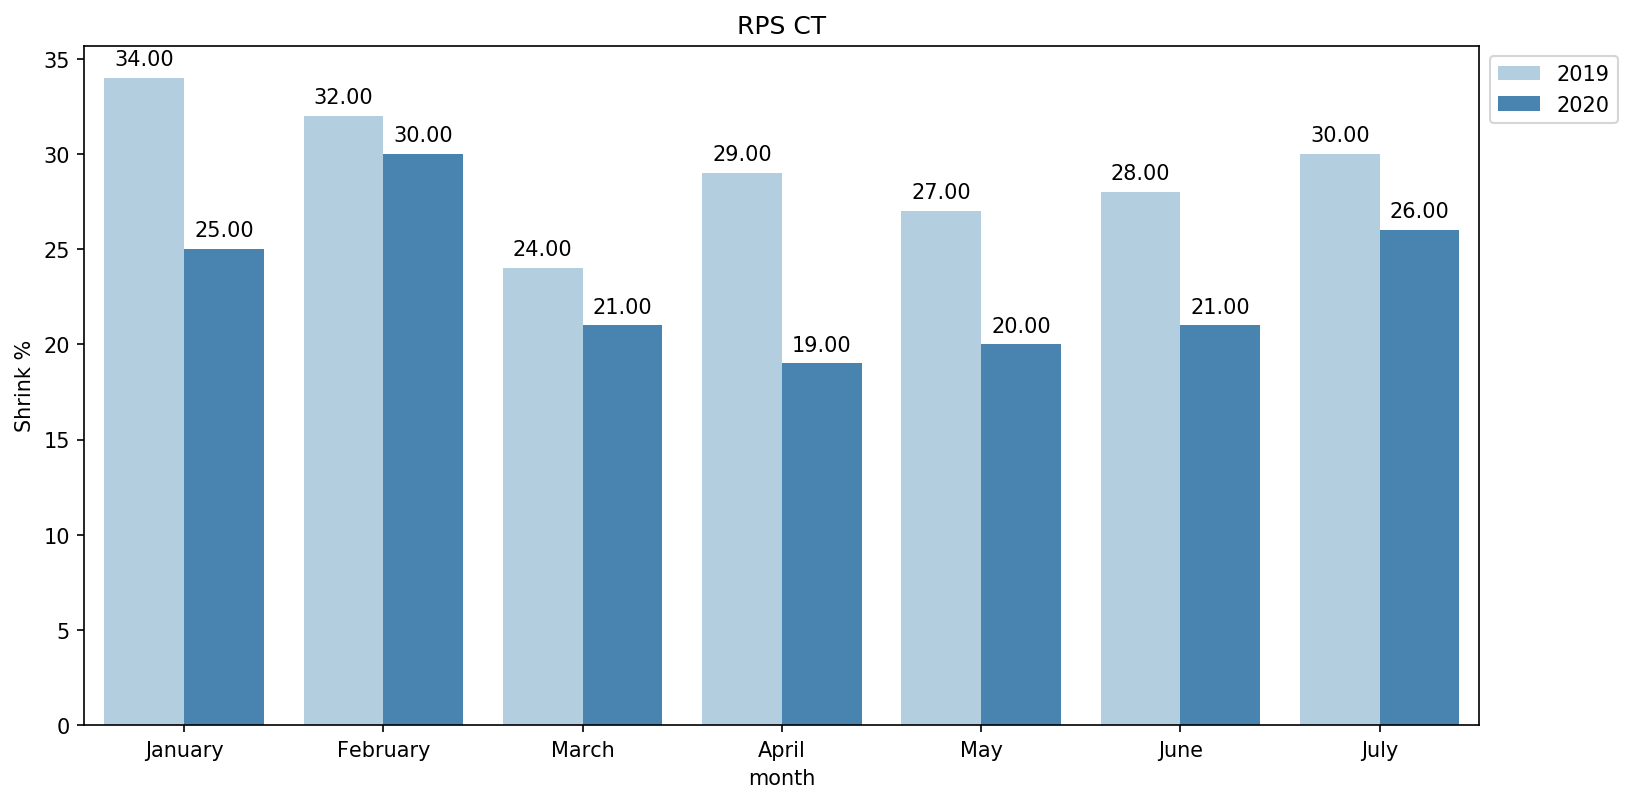

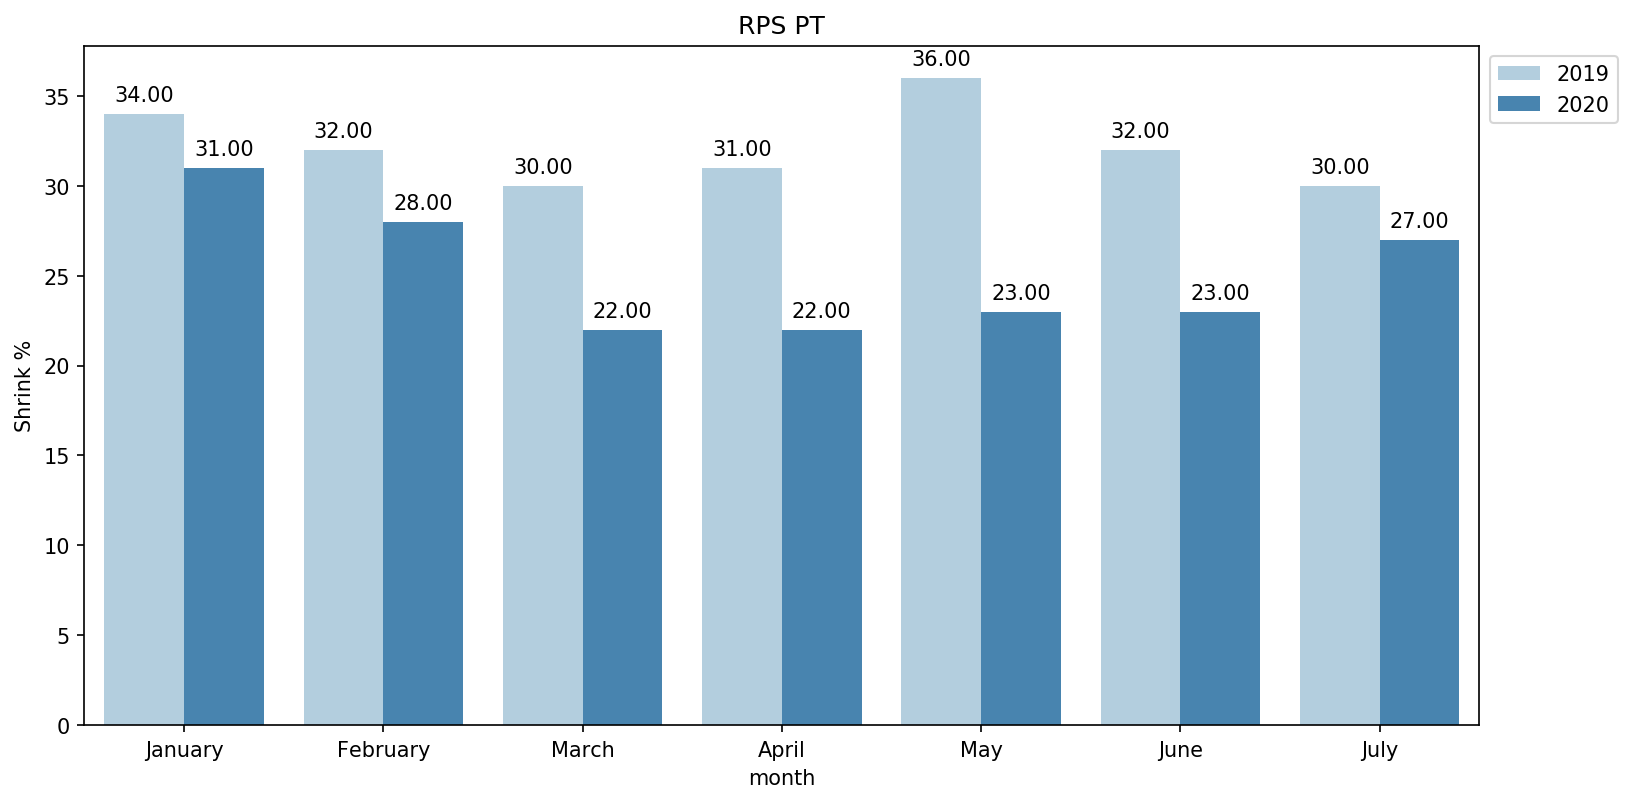

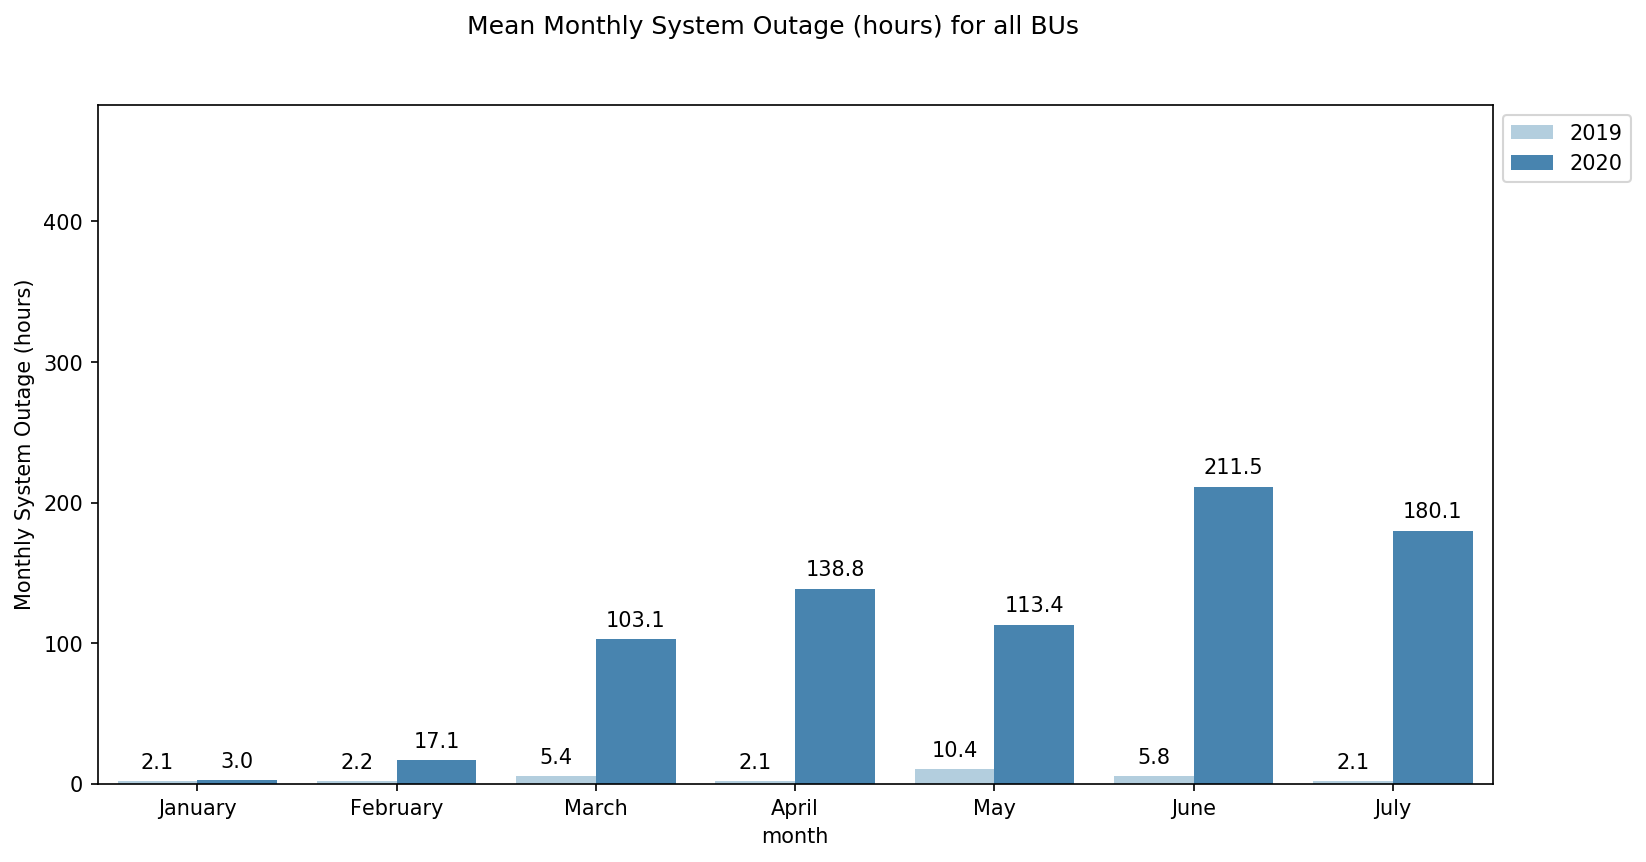

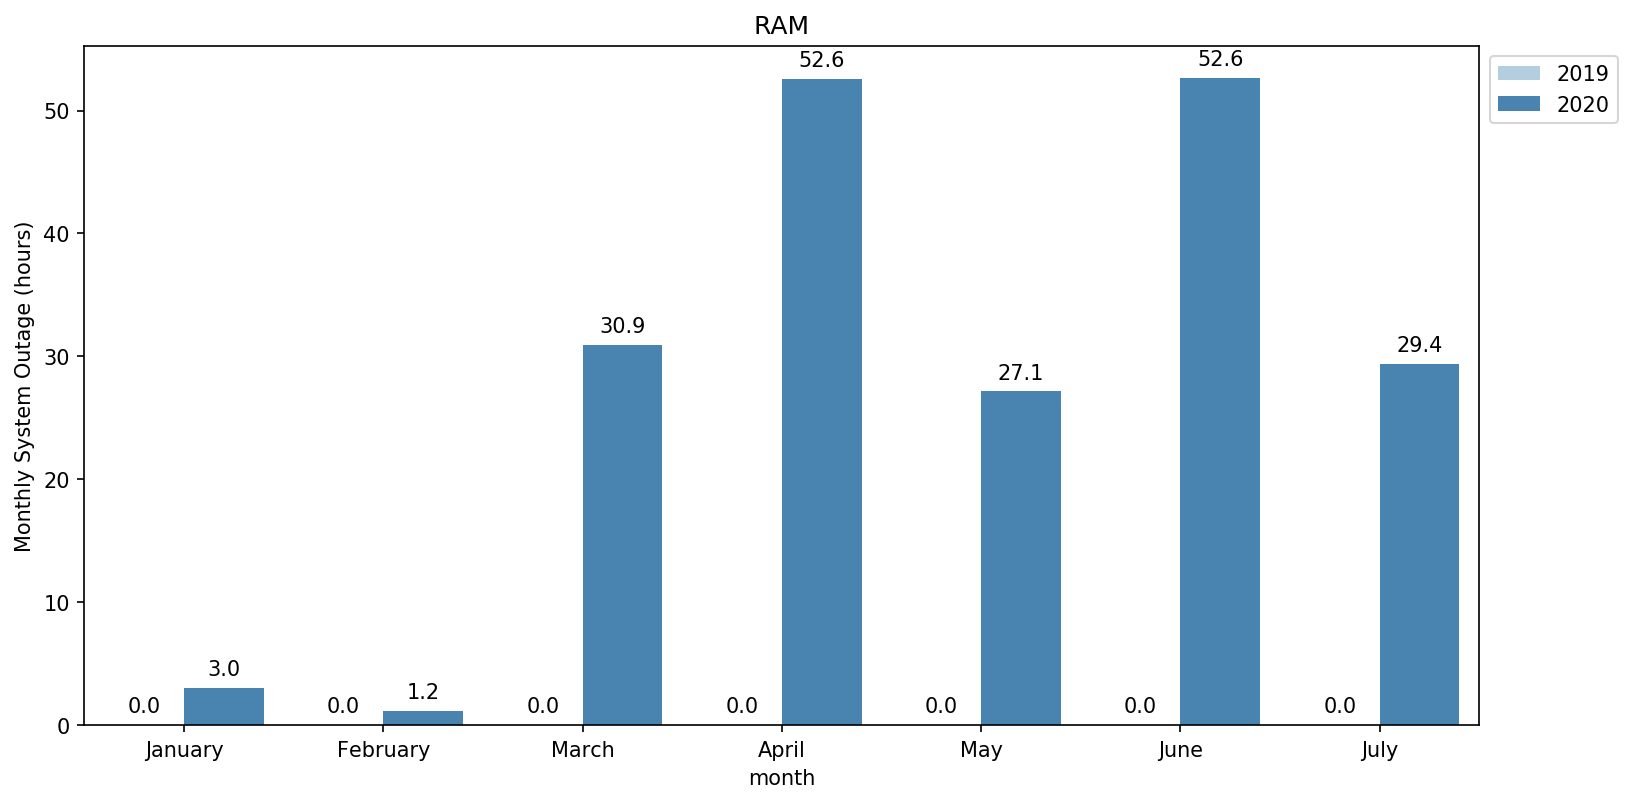

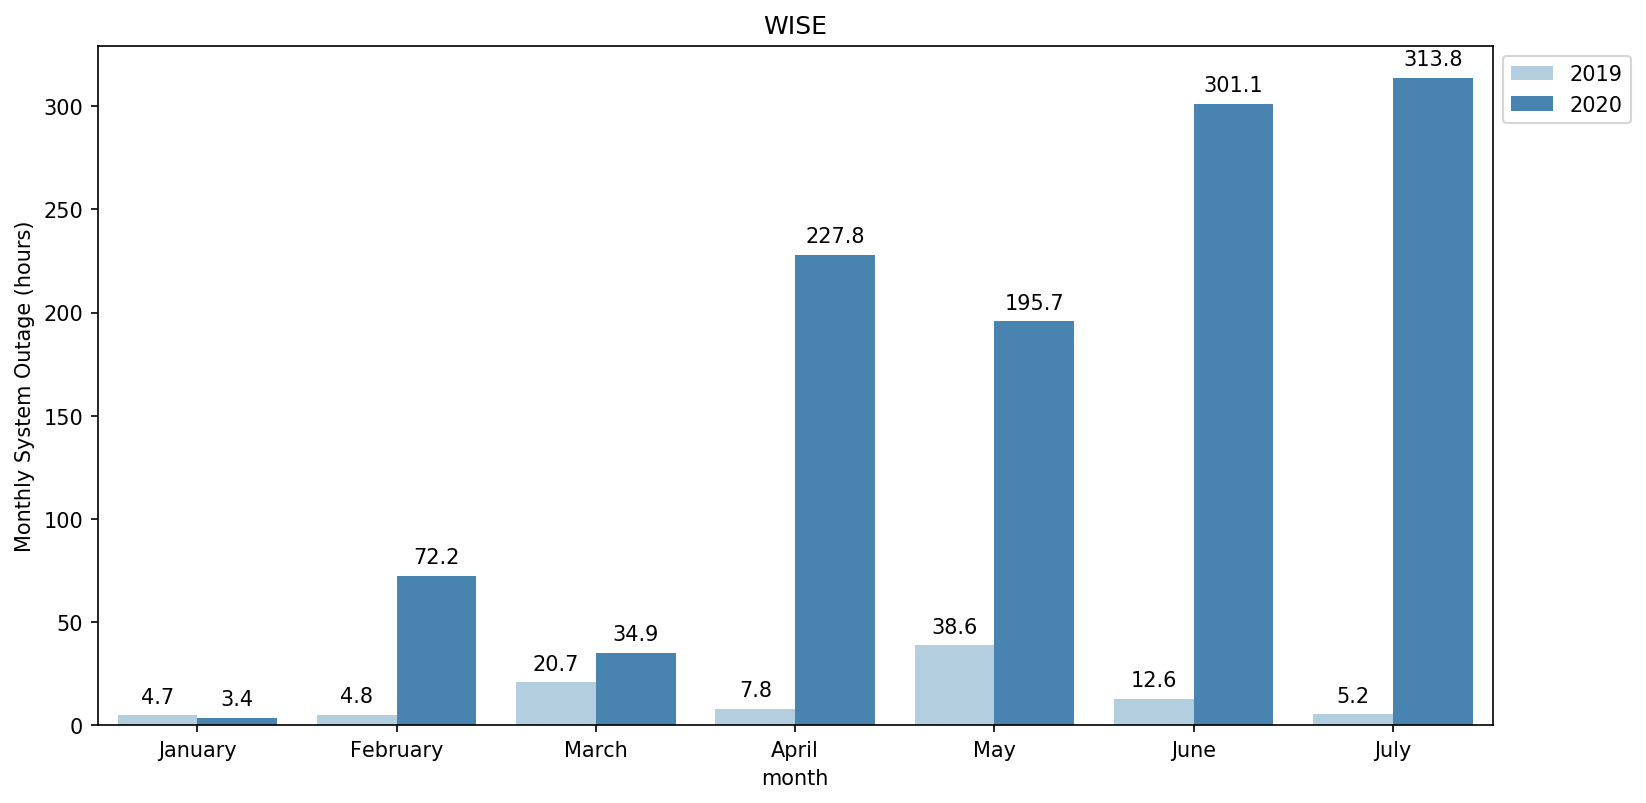

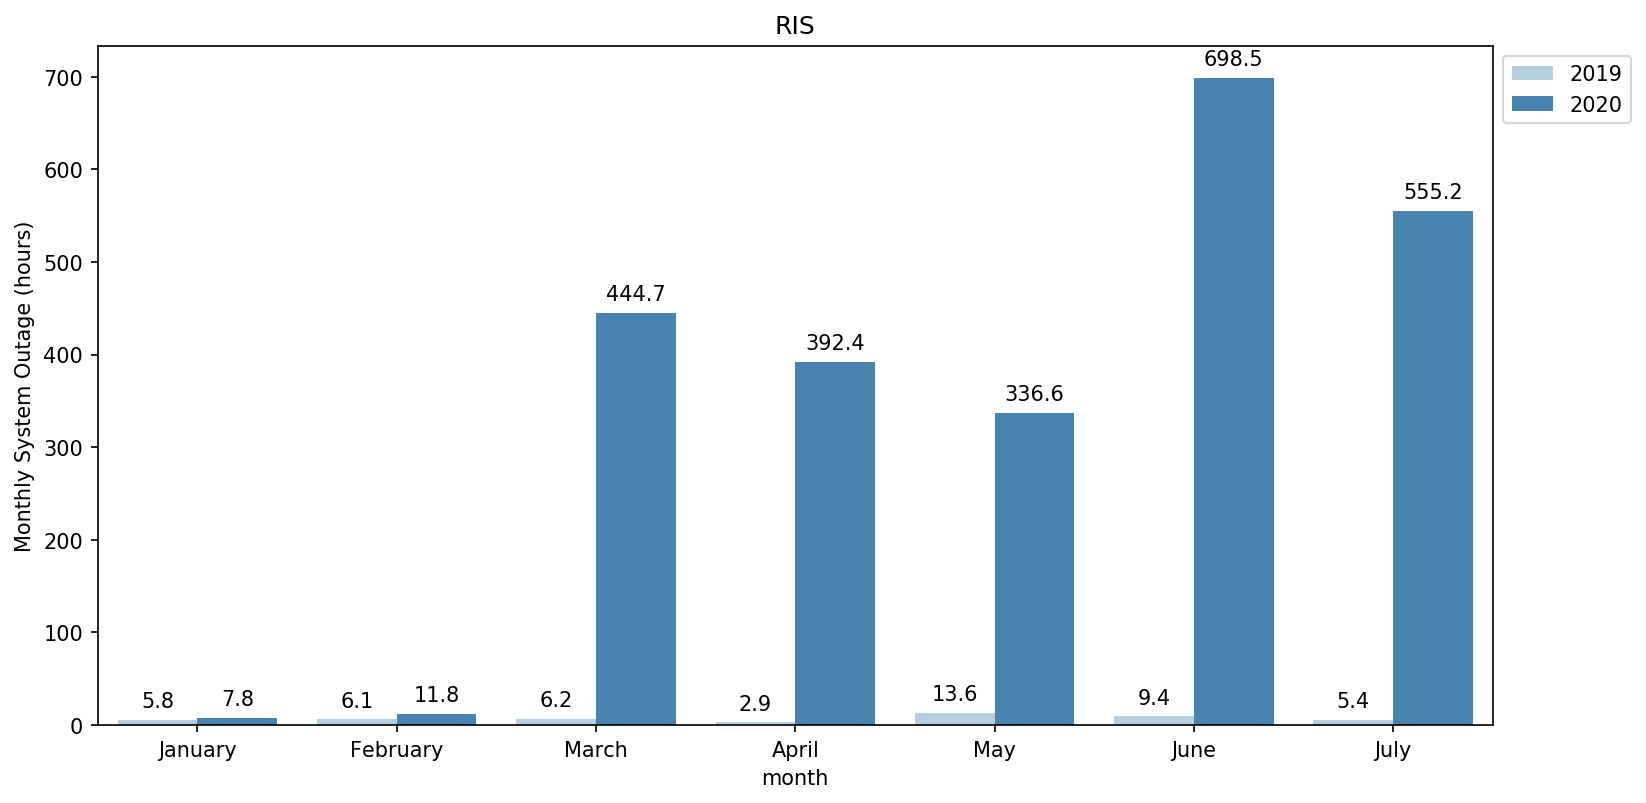

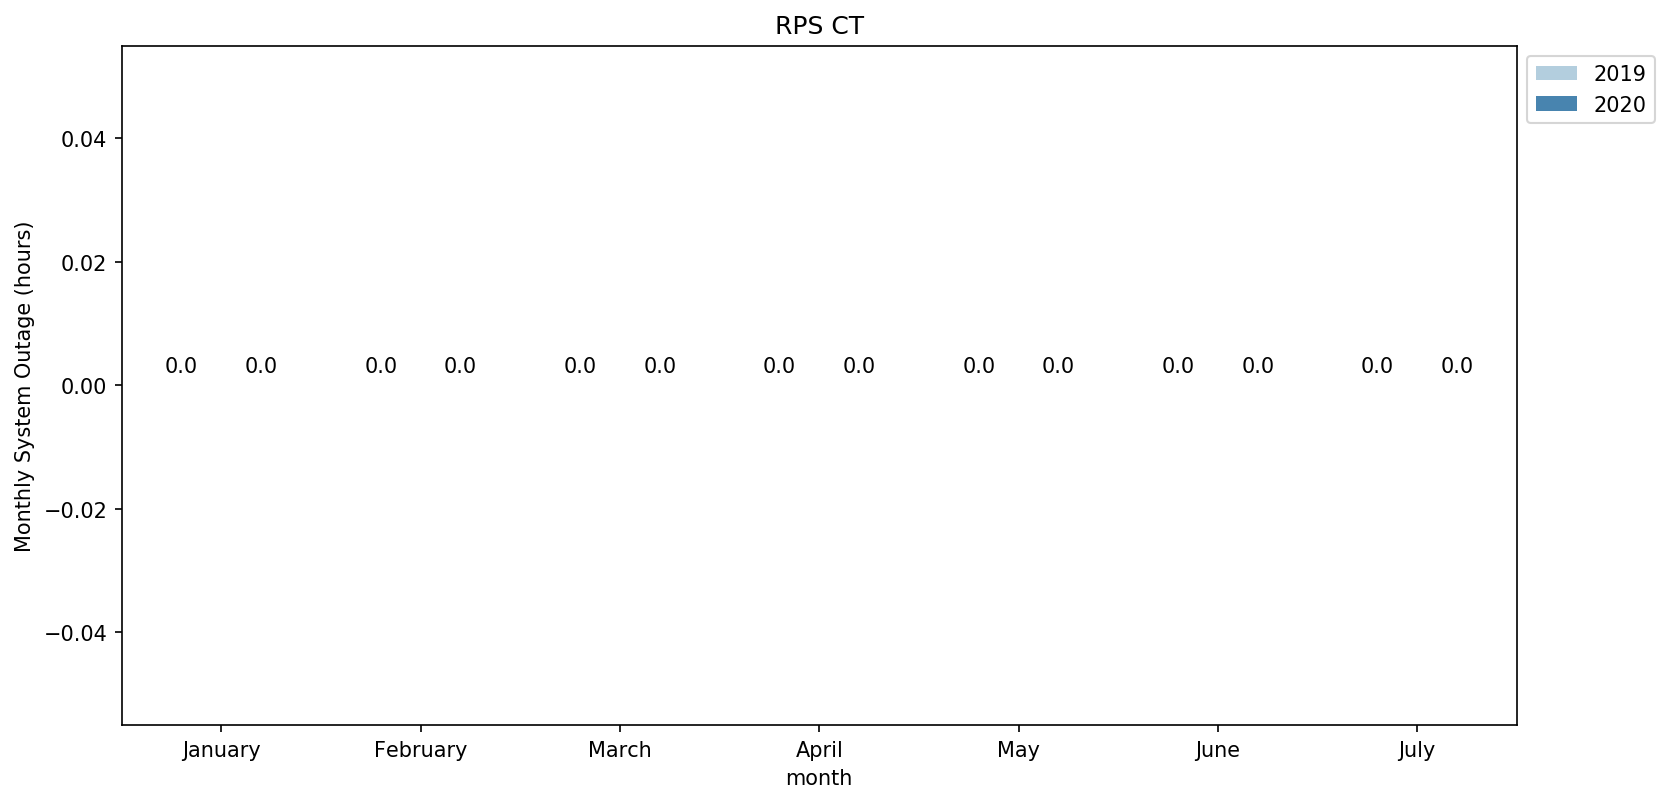

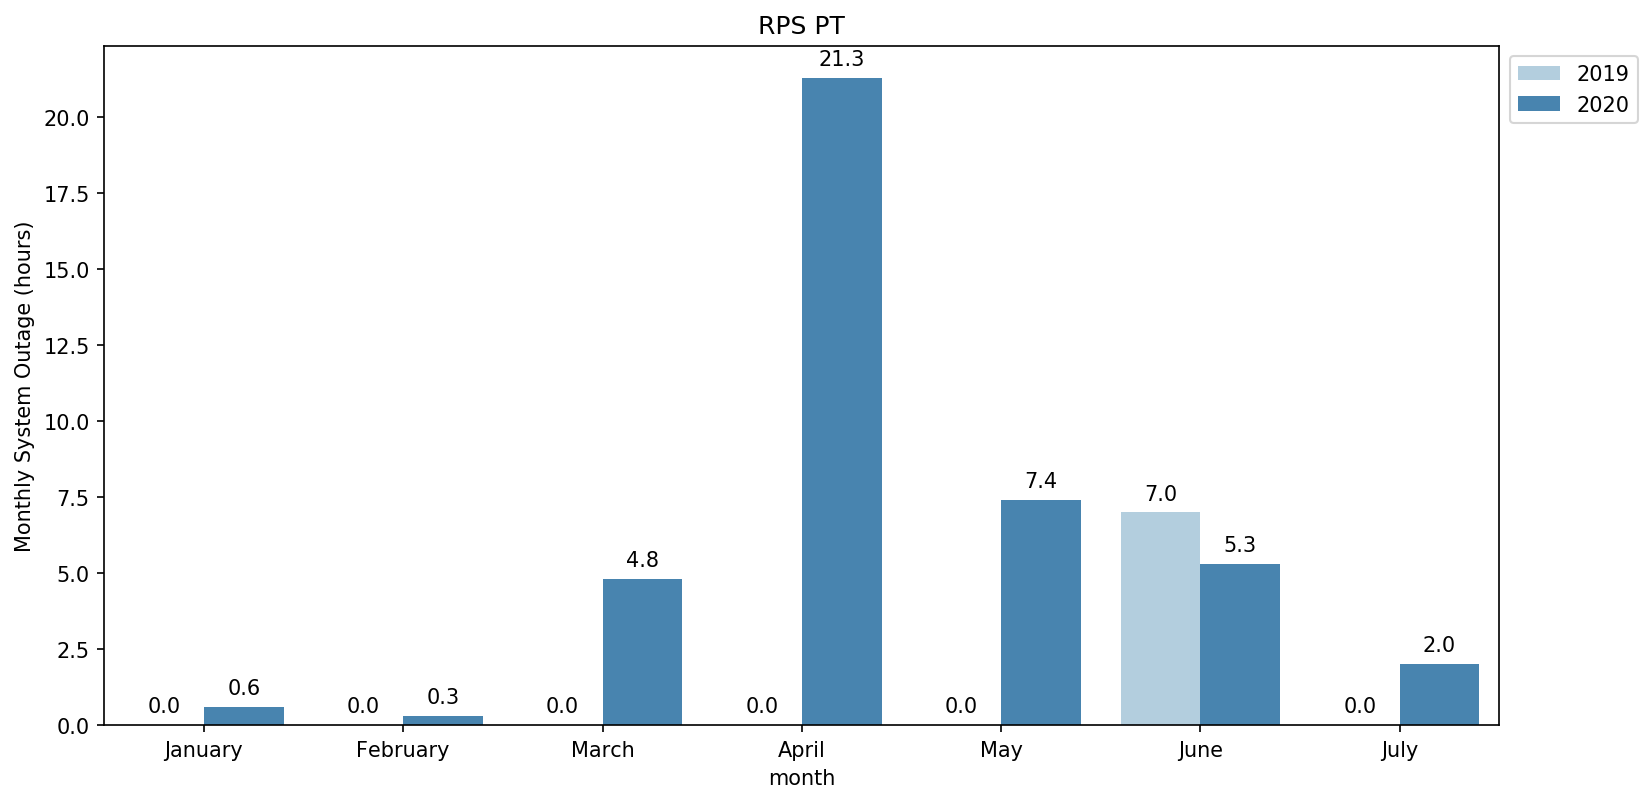

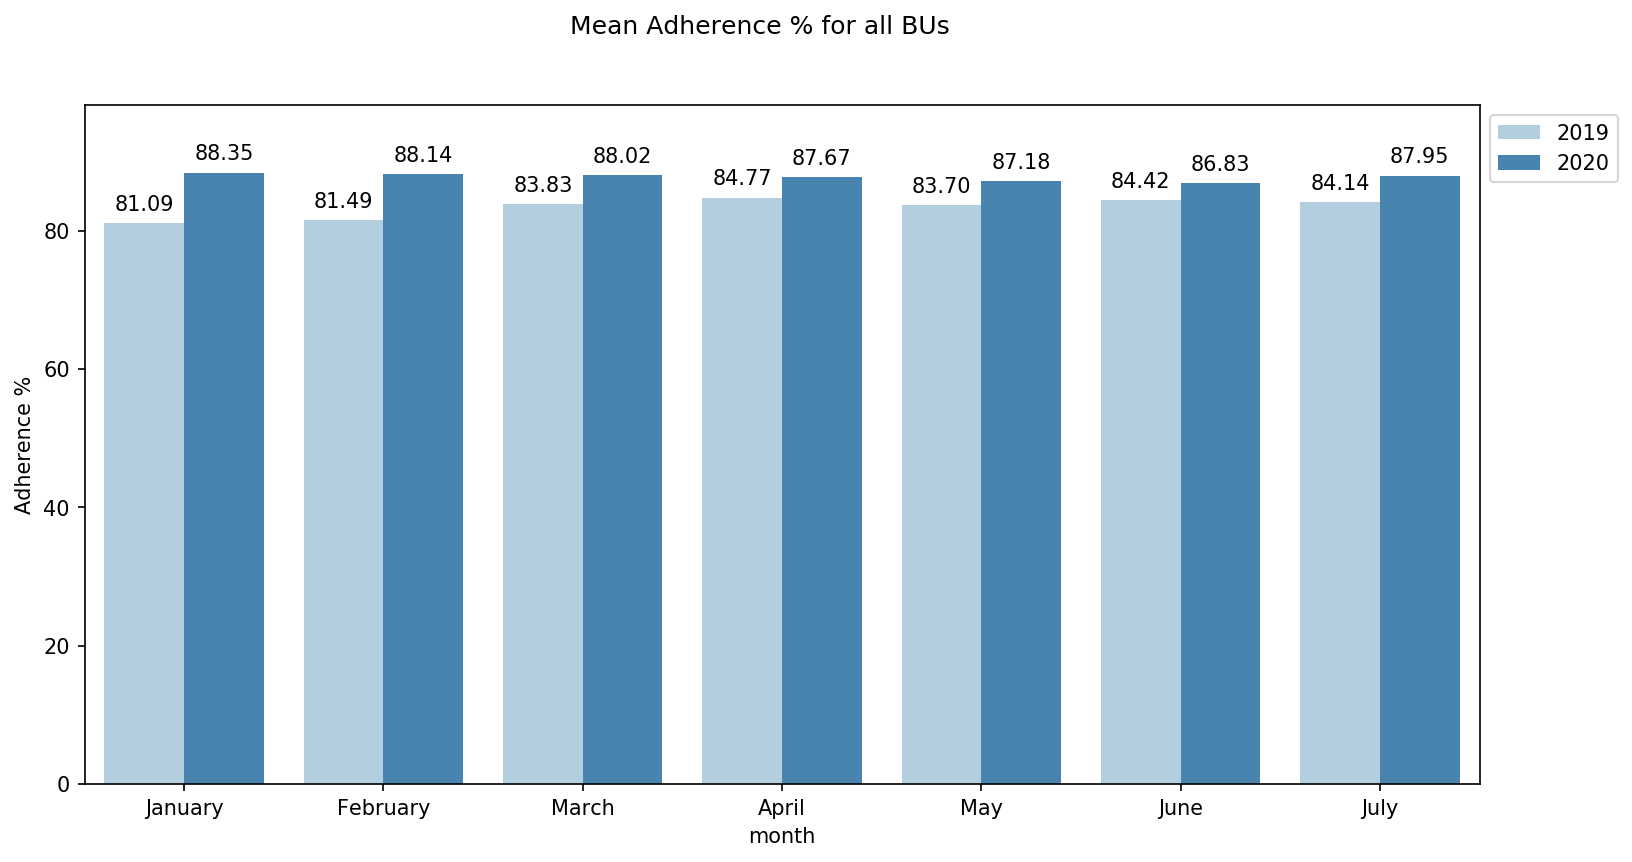

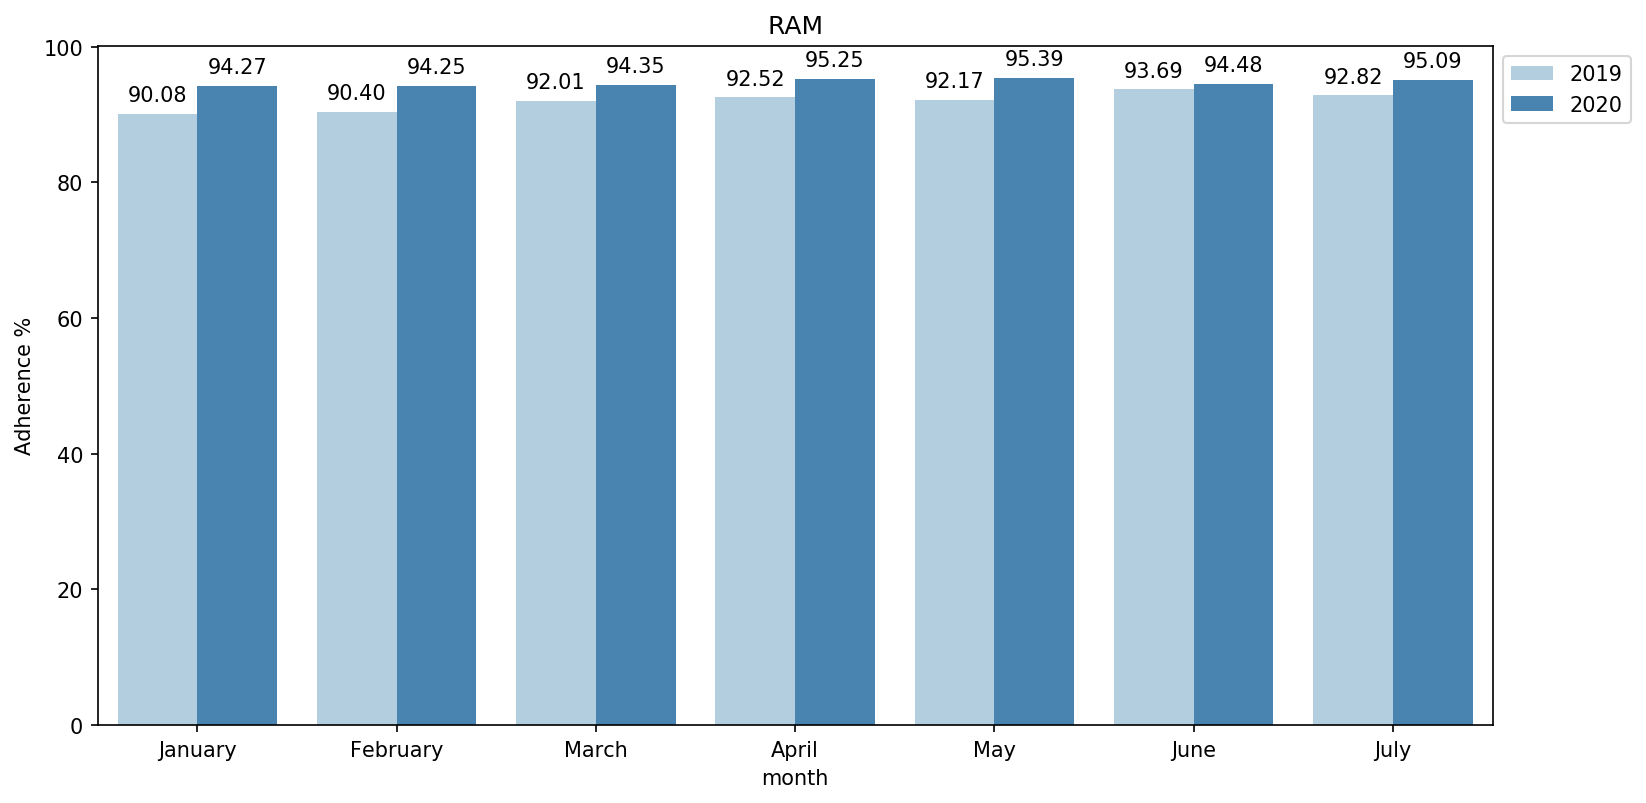

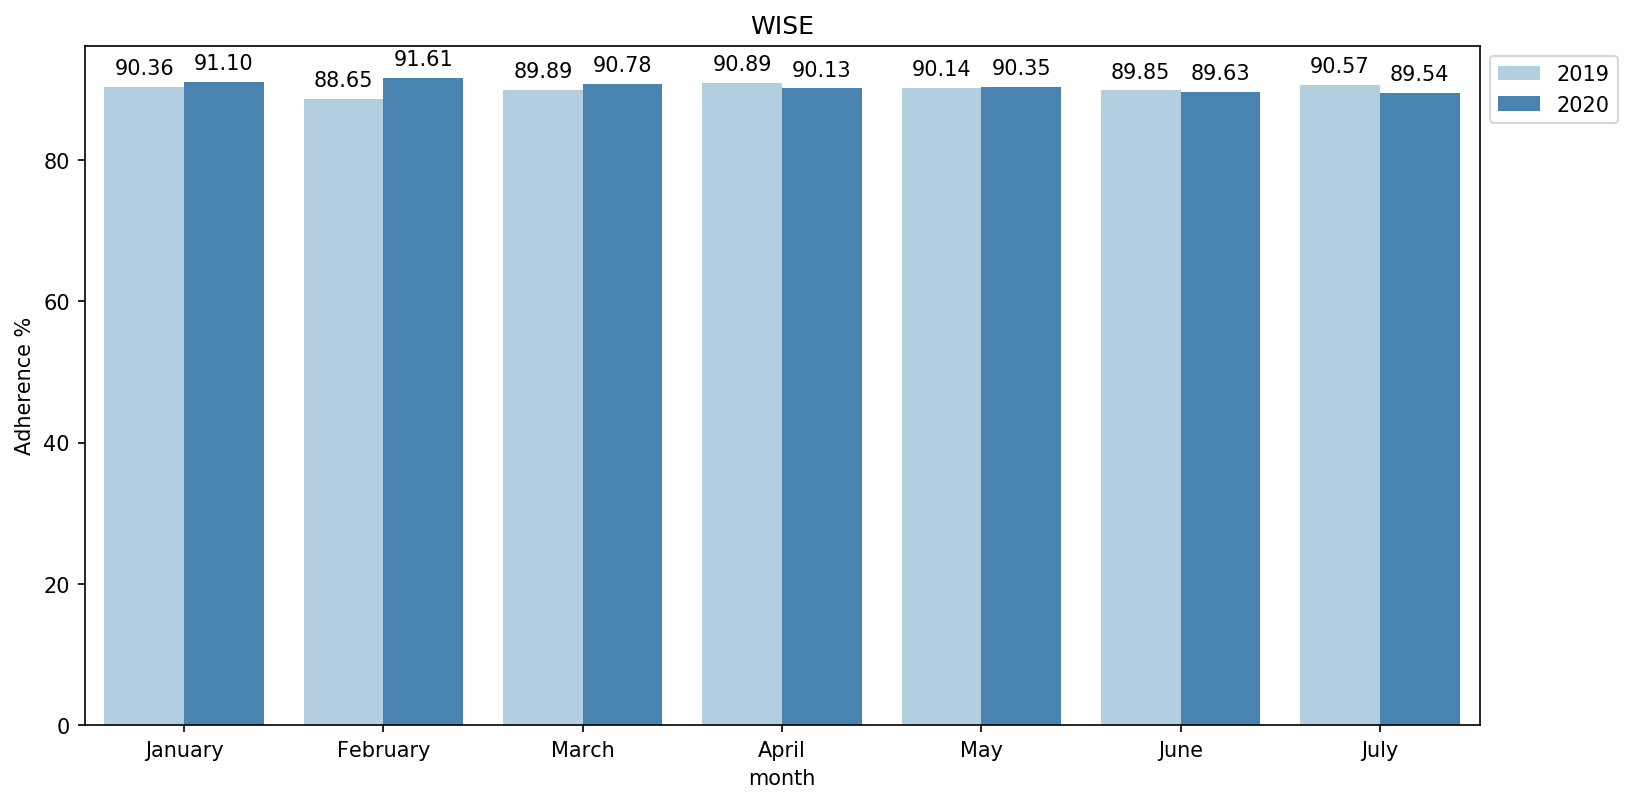

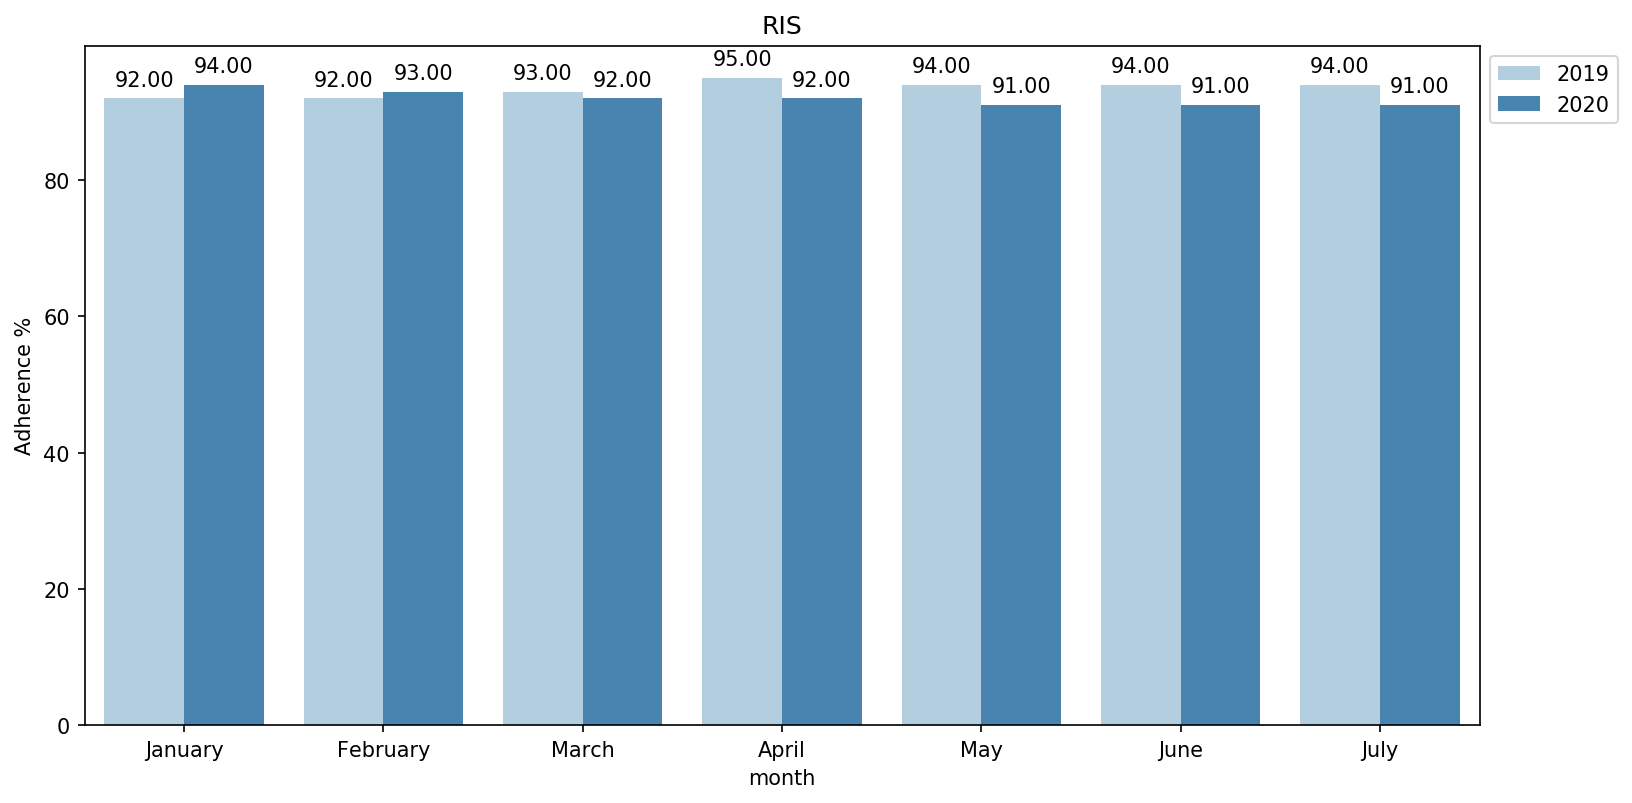

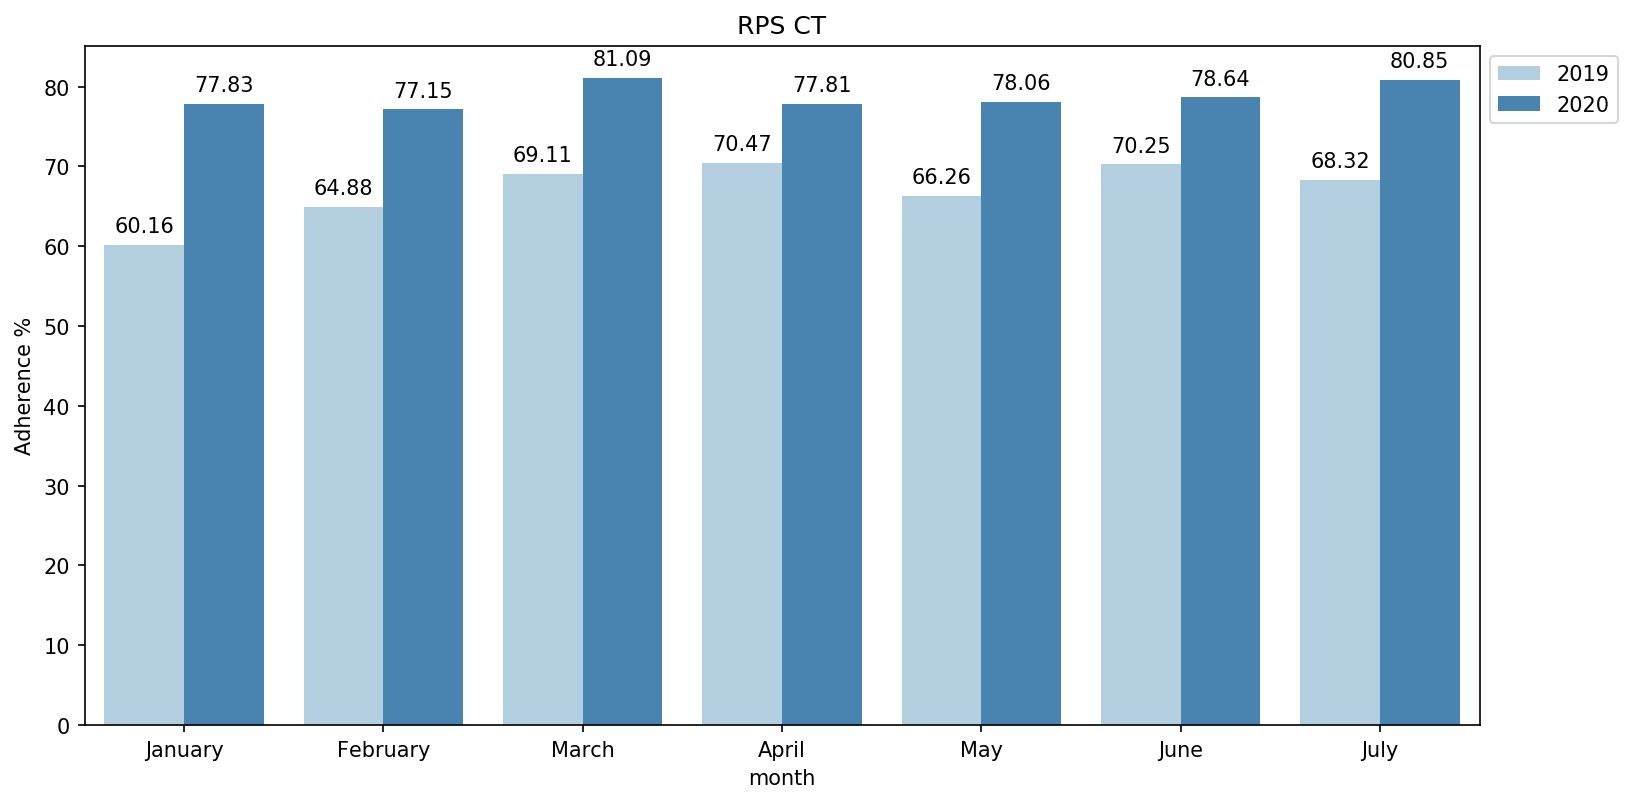

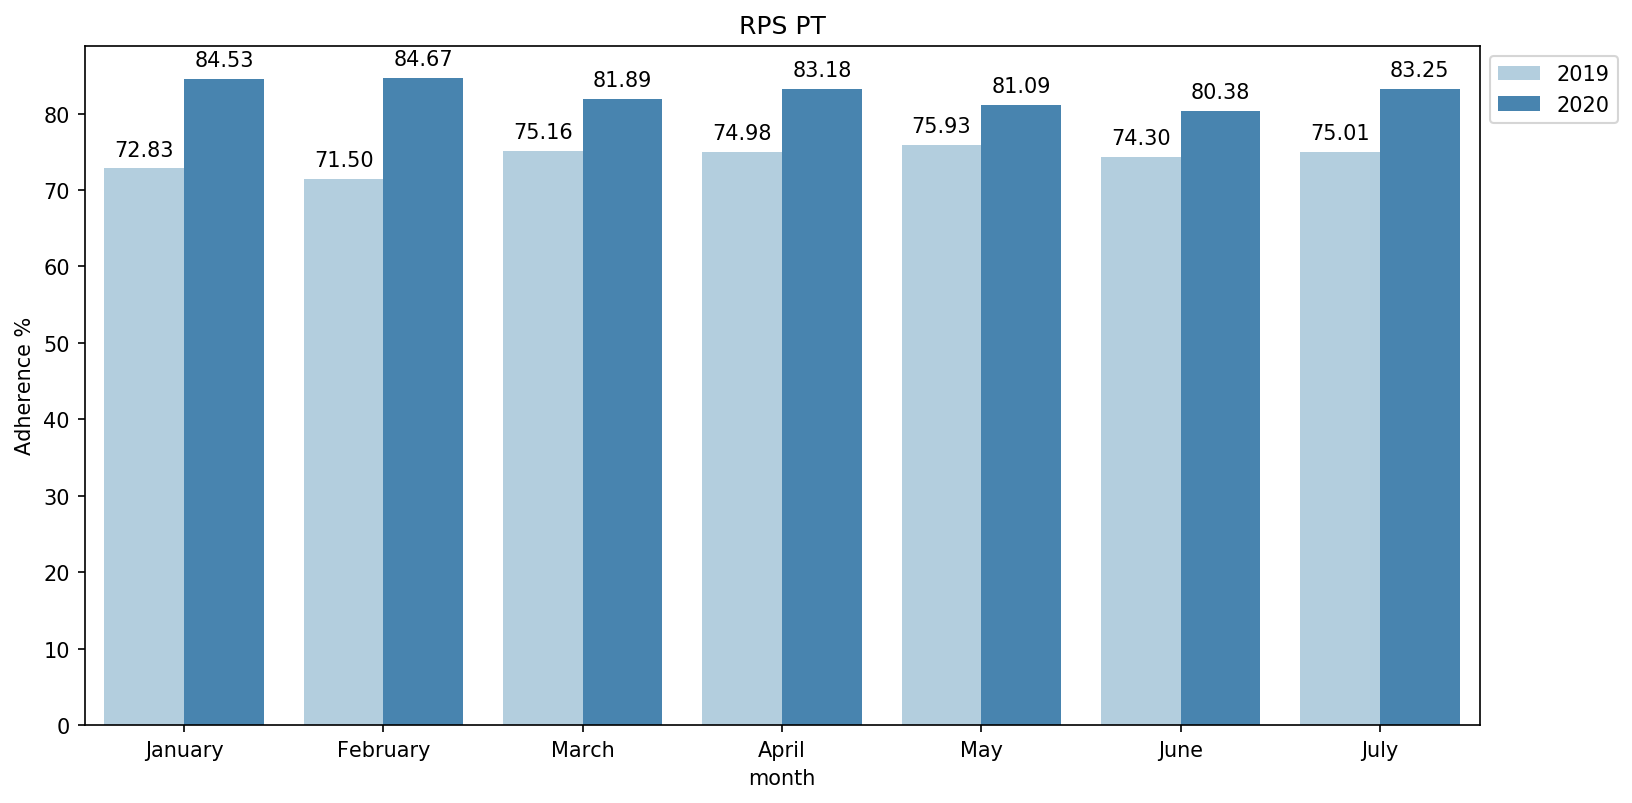

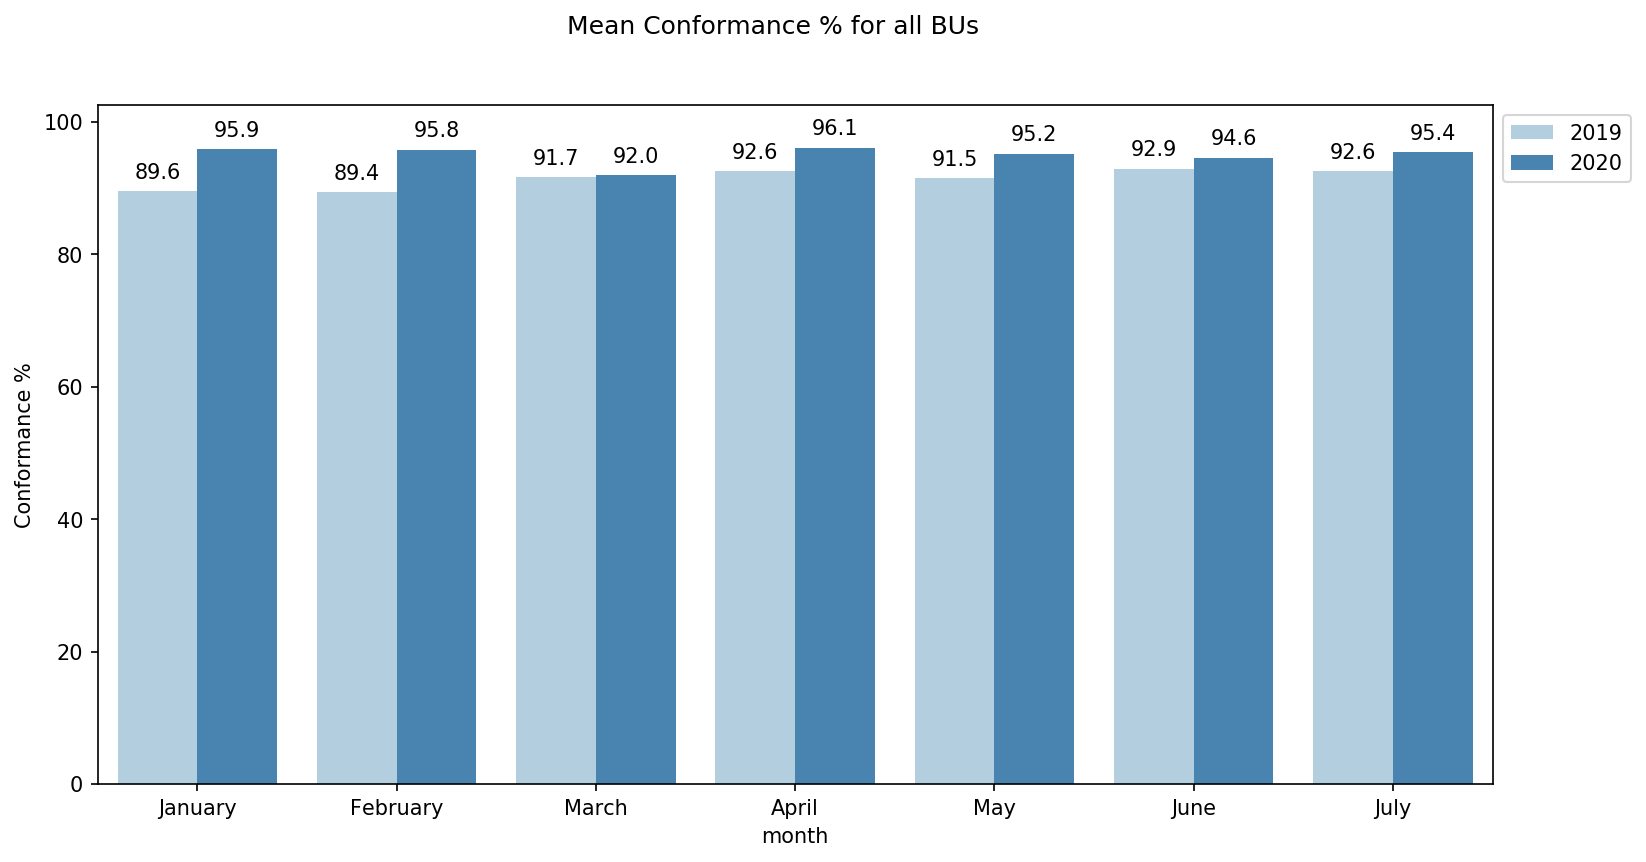

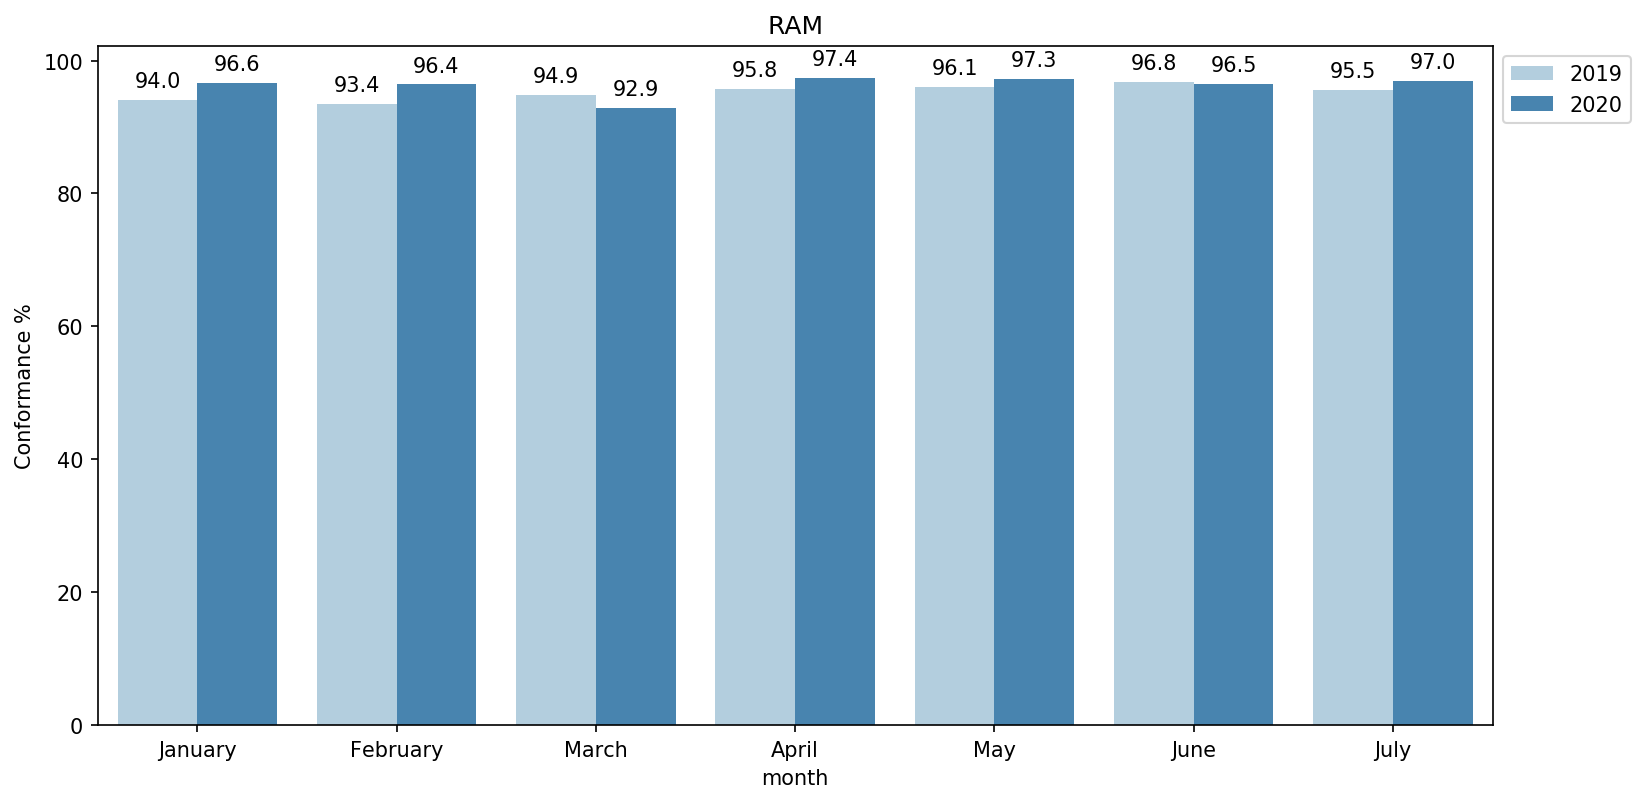

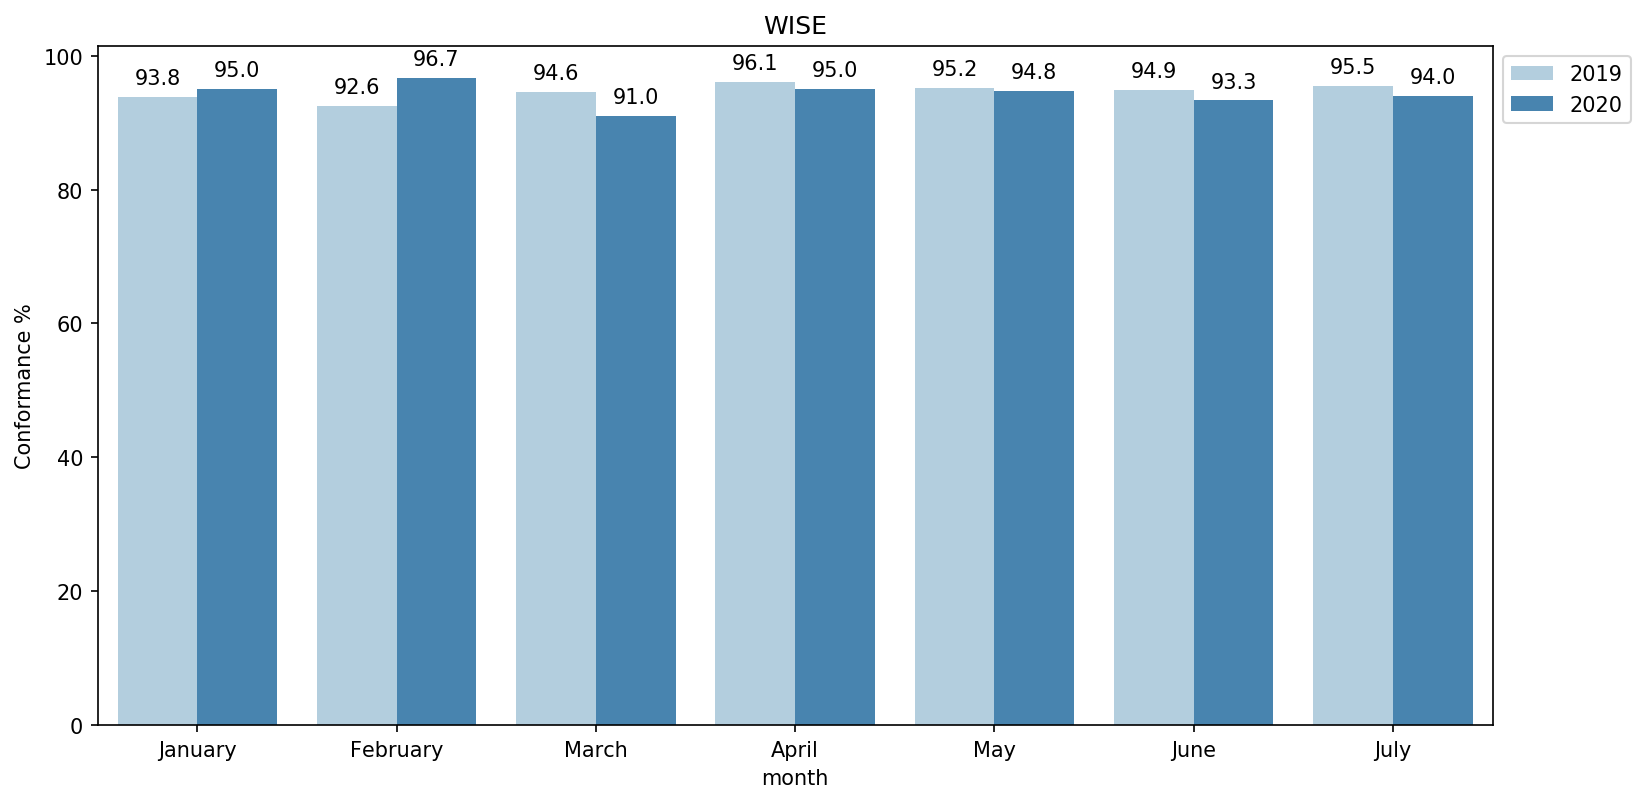

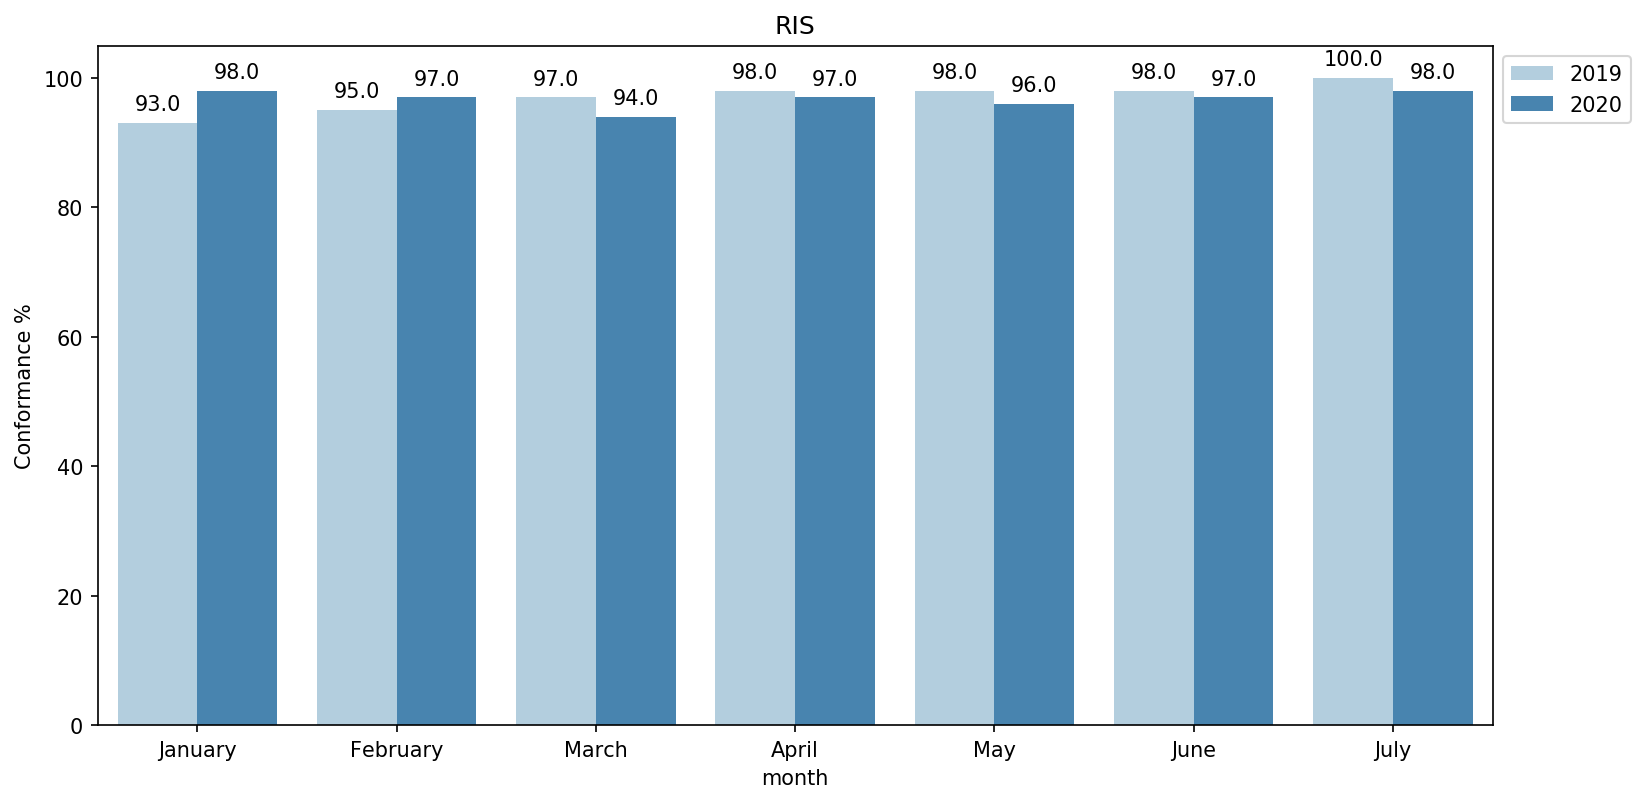

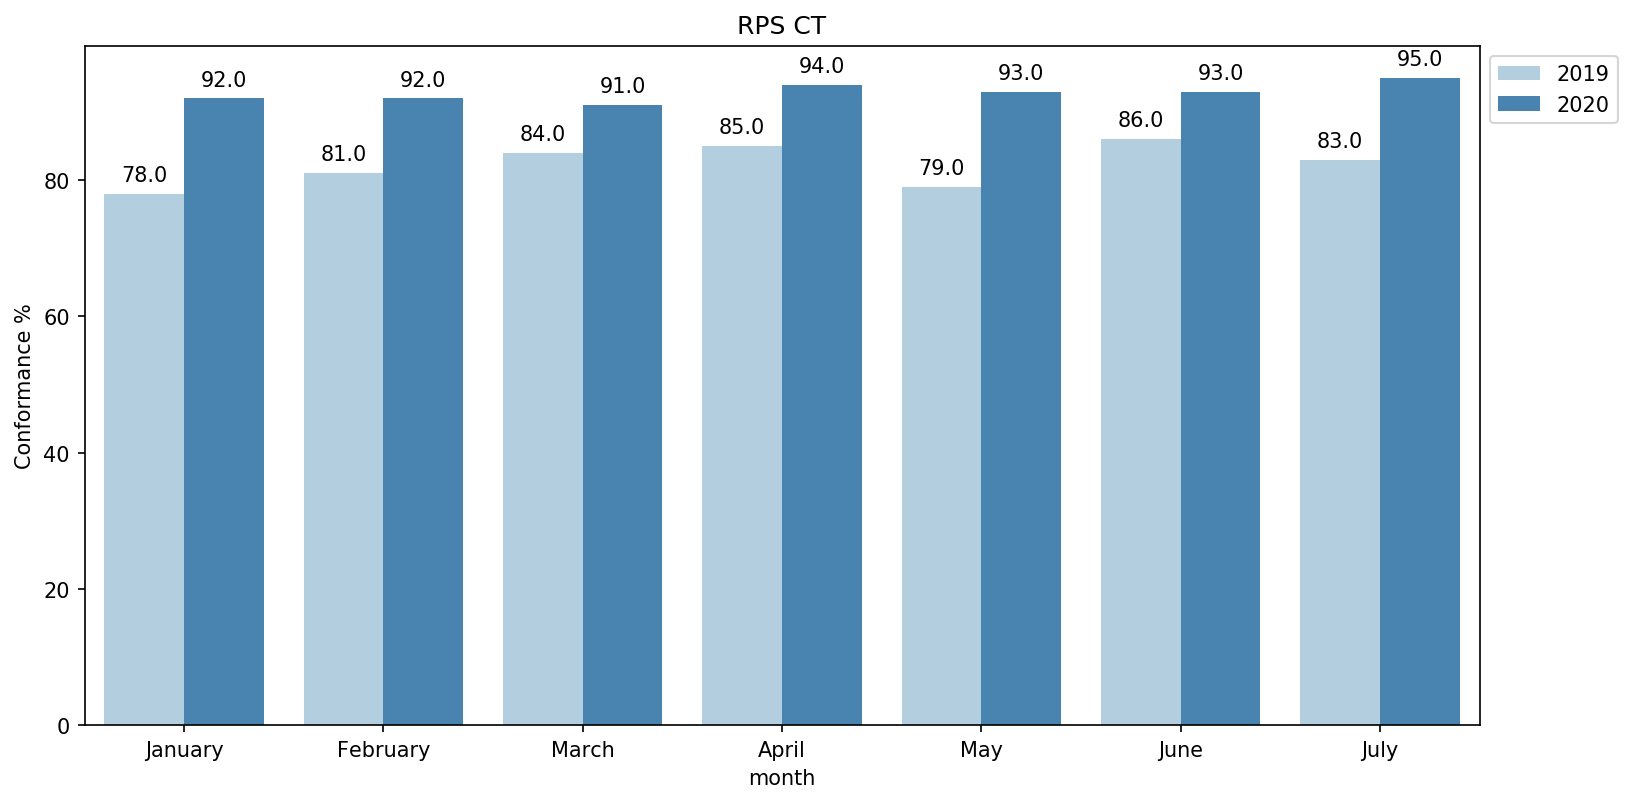

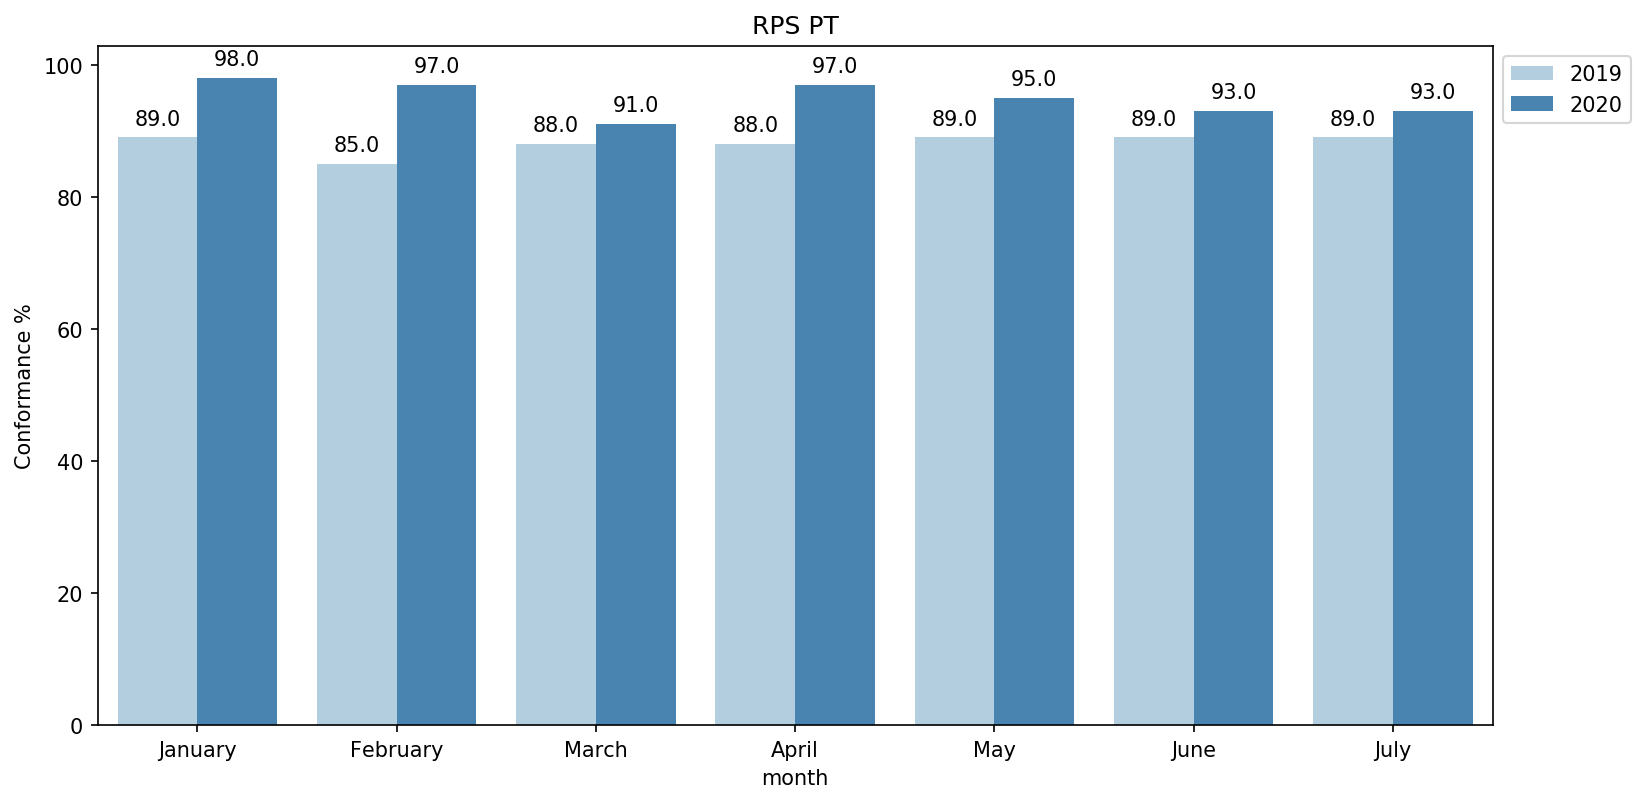

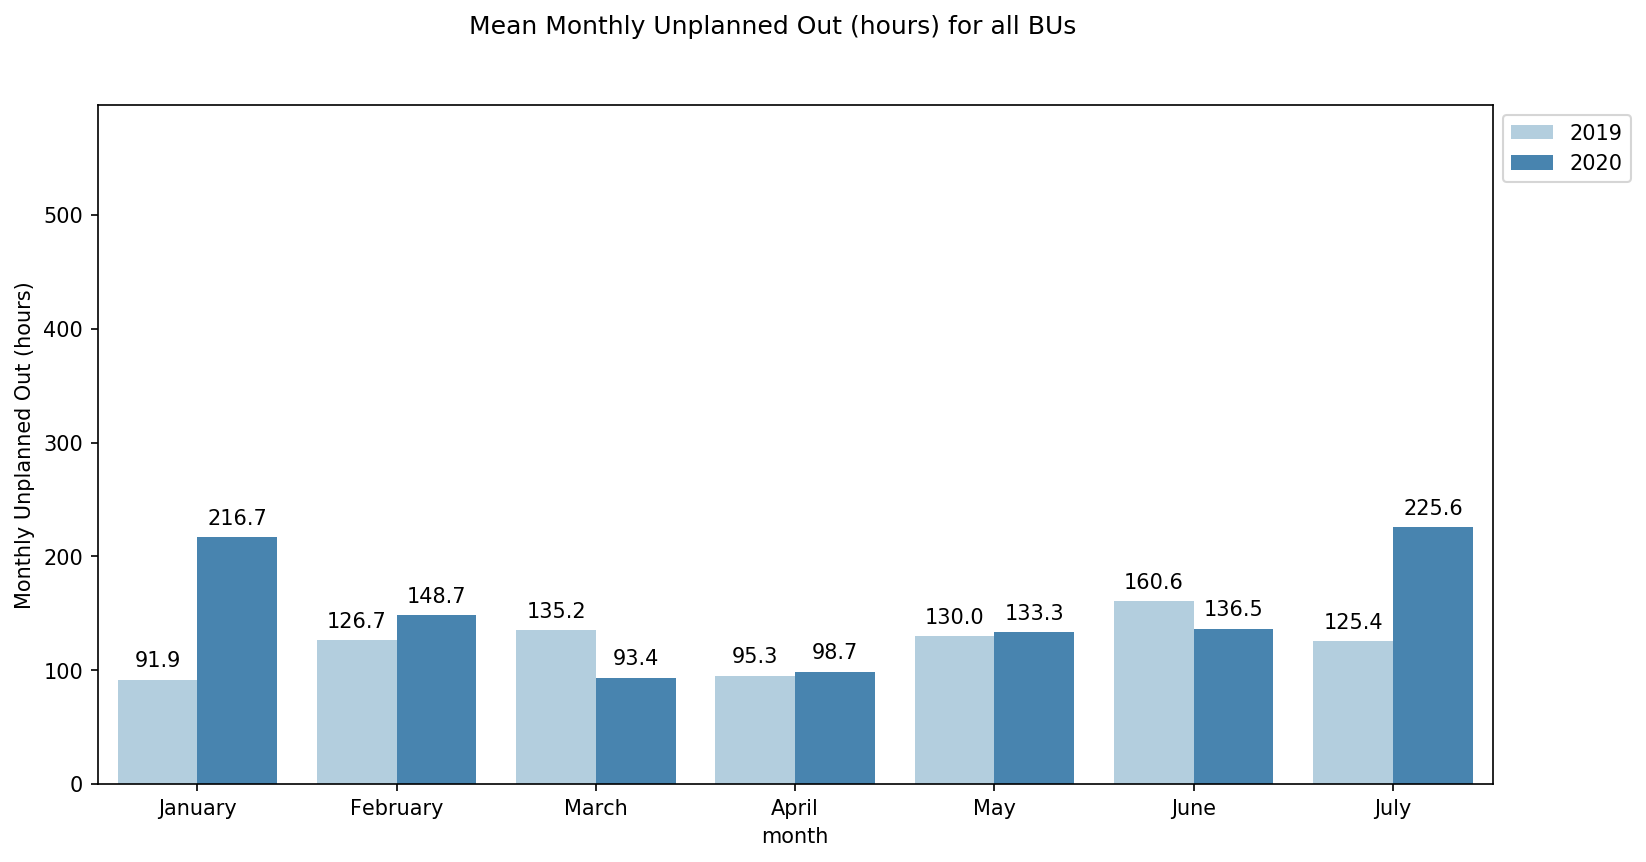

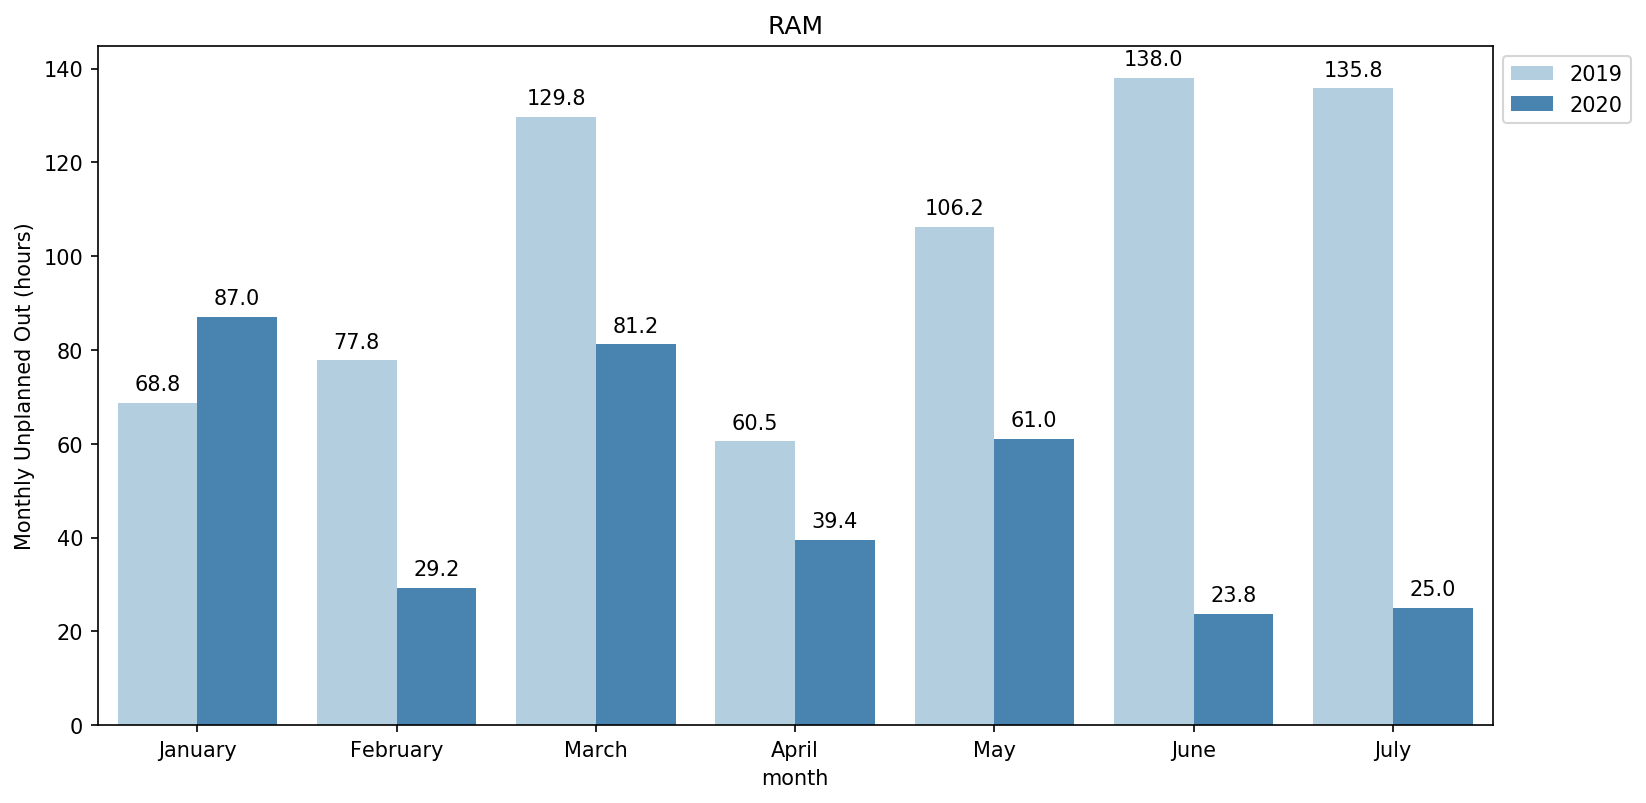

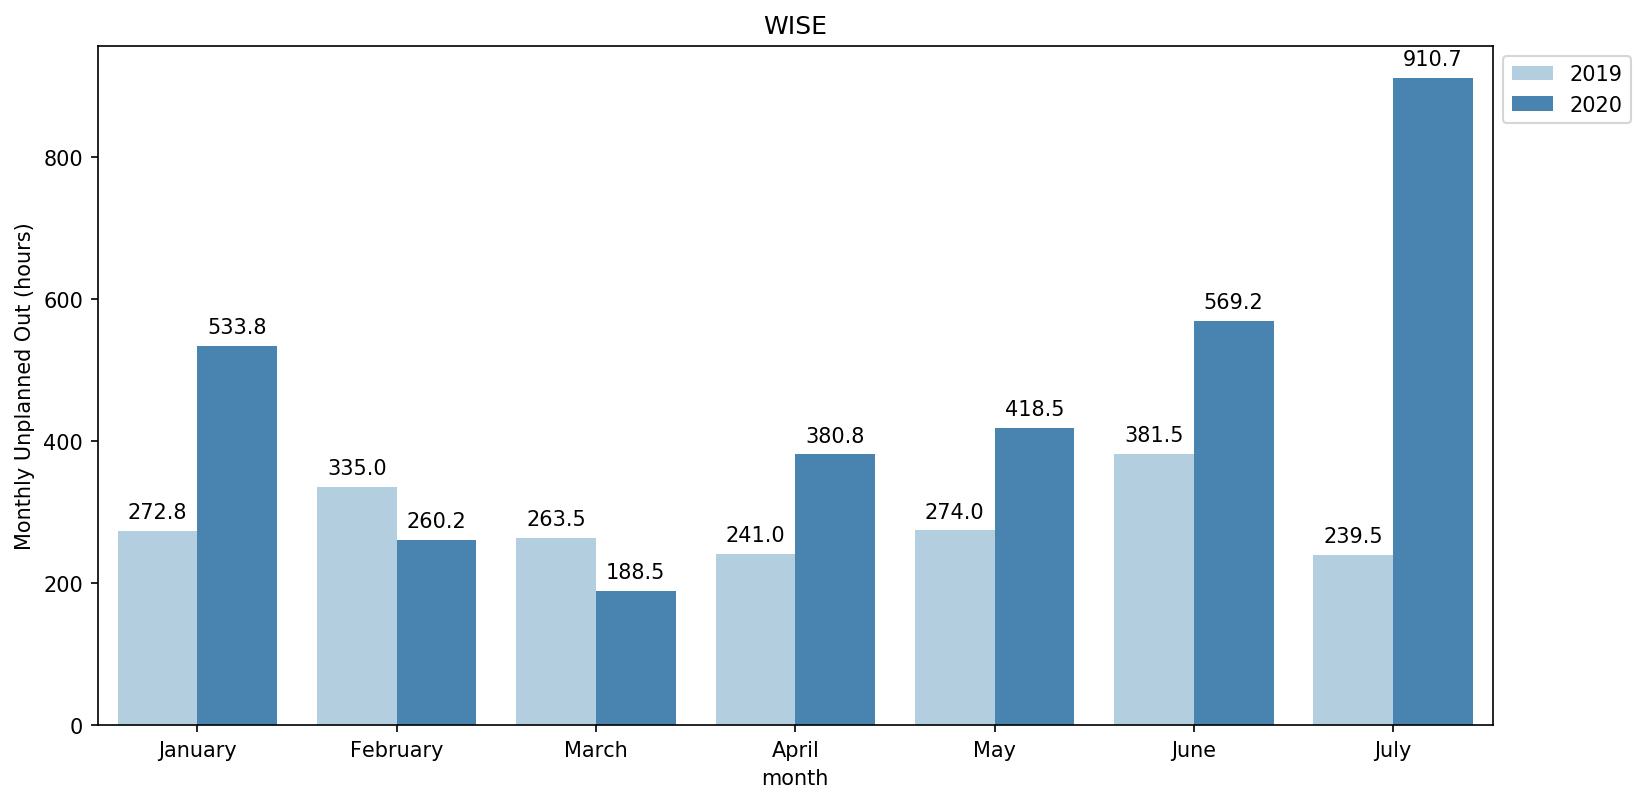

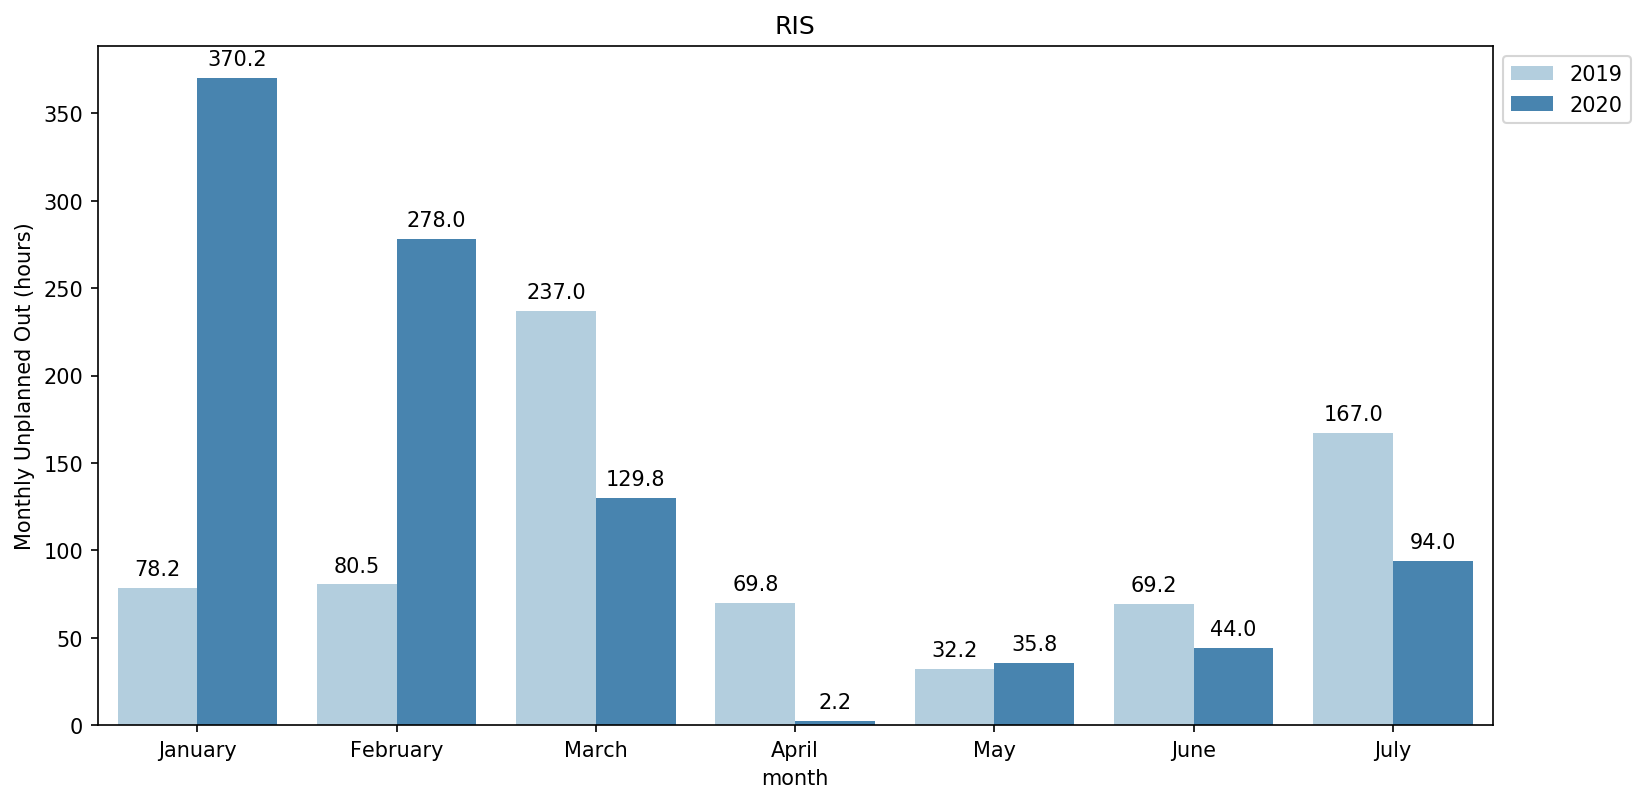

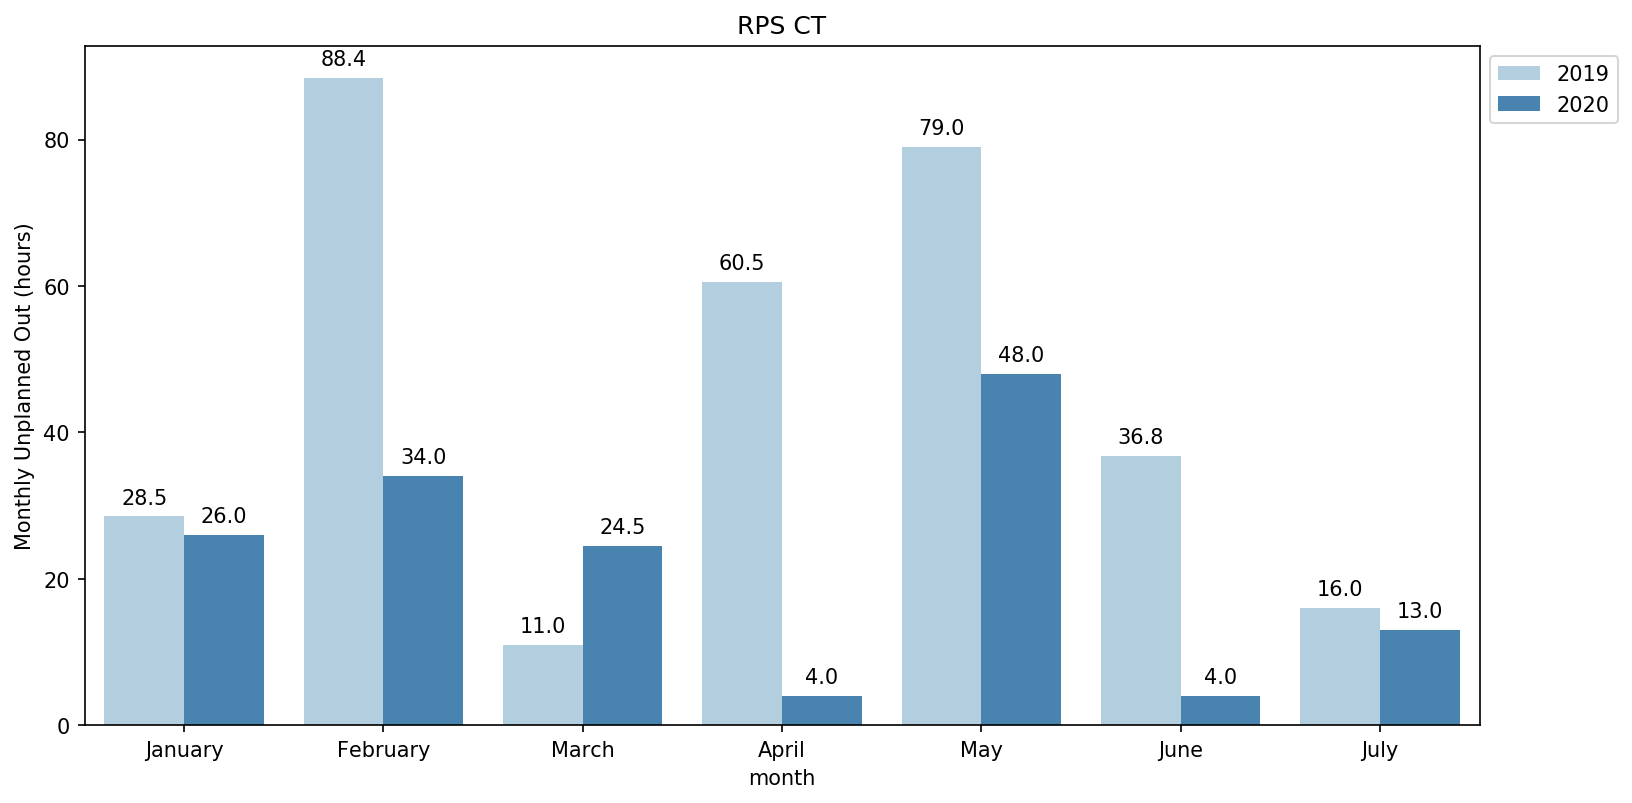

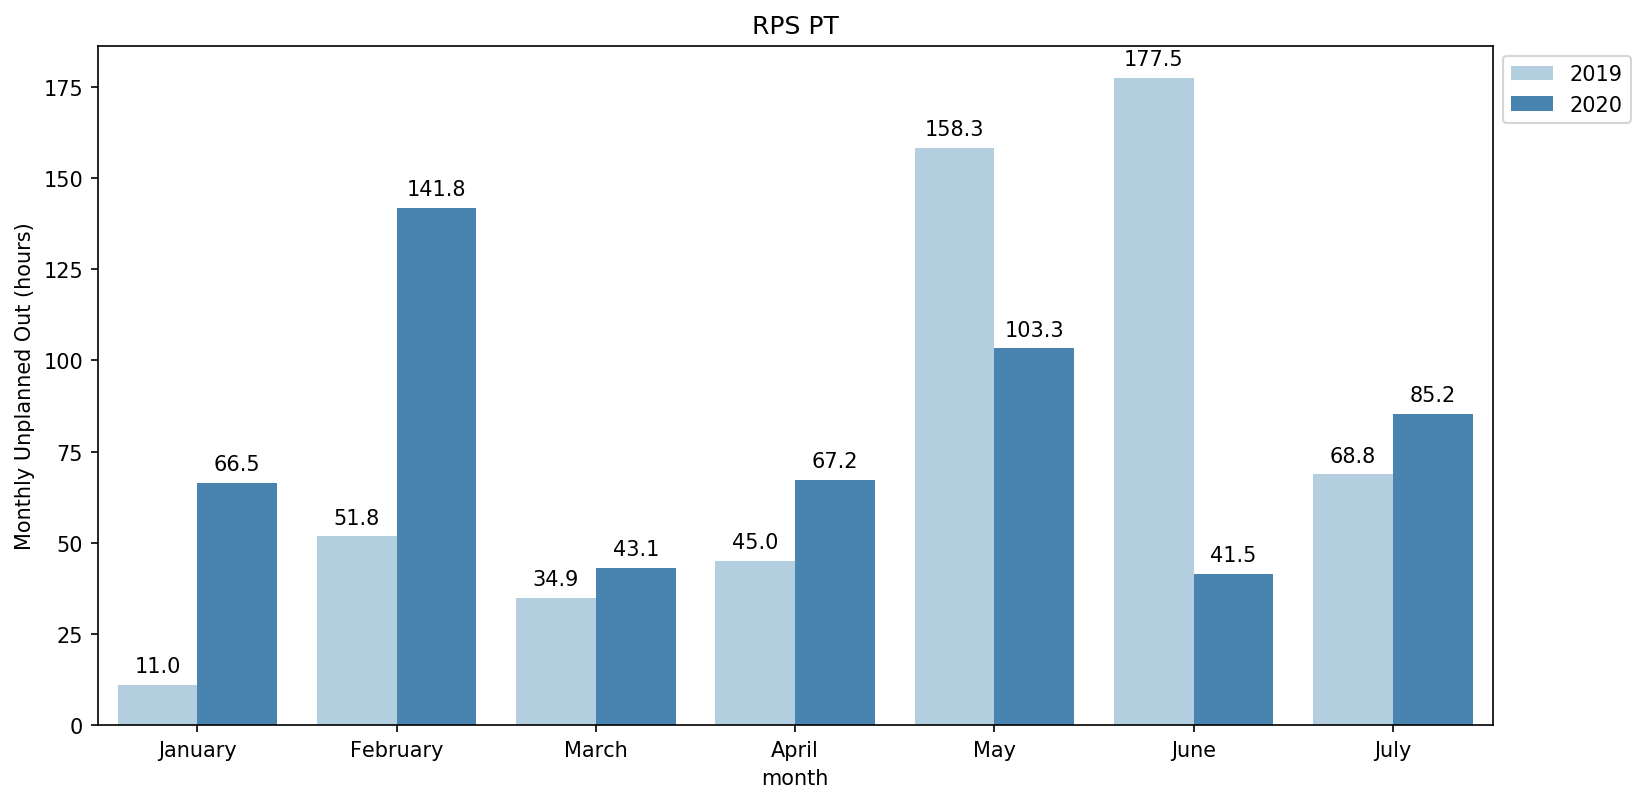

In [10]:
for c in ['AHT', 'Attrition %', 'Shrink %', 'Monthly System Outage (hours)', 'Adherence %', 'Conformance %',
         'Monthly Unplanned Out (hours)']:
    plt.figure(figsize=(12,6), dpi=150)
    splot = sns.barplot(data=df, palette='Blues', x='month', y=c, hue='year', errwidth=0)
    if c in set(['Attrition %', 'Shrink %', 'Adherence %']):
        precision = '.2f'
    elif c == 'AHT':
        precision = '.0f'
    else:
        precision = '.1f'
    for p in splot.patches:
        splot.annotate(format(p.get_height(), precision), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    plt.suptitle('Mean '+c+' for all BUs')
    plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
    plt.savefig('./png/'+c+"_barplot.png", format="png")
    plt.show()
    for bu in df['BU'].unique():
        plt.figure(figsize=(12,6),dpi=150)
        splot = sns.barplot(data=df[df['BU']==bu], palette='Blues', x='month', y=c, hue='year')
        for p in splot.patches:
            splot.annotate(format(p.get_height(), precision), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
        plt.title(bu)
        plt.savefig('./png/'+c+'_'+bu+"_barplot.png", format="png")
        plt.show()

## Compare AHT across BU's from 2019-2020

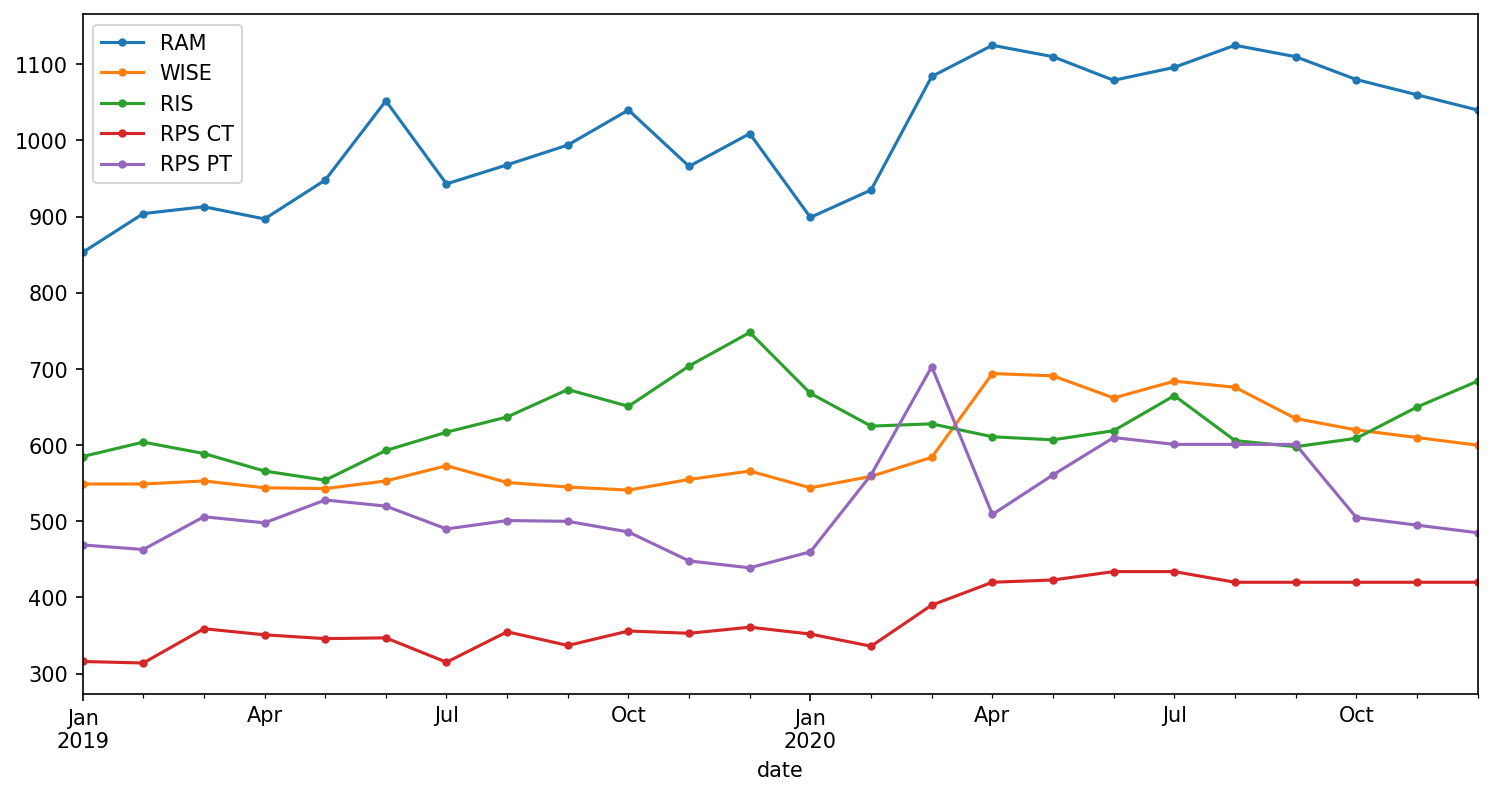

In [11]:
## make copy for later
df = df1.copy()

plt.figure(figsize=(12,6), dpi=150)
for bu in df['BU'].unique():
    df[df['BU']==bu]['AHT'].plot(marker='.')
plt.legend(df['BU'].unique())
plt.savefig('./png/AHT_lineplot.png', format="png")
plt.show()

## Compare AHT by year for each BU

In [12]:
# df['month'] = df.index.month

# for c in df.columns[1:-2]:
#     try:
#         plt.figure(figsize=(8,4))
#         ax = sns.lineplot(x='month', y=c, data=df[(df['year']==2019)], ci=None)
#         ax = sns.lineplot(x='month', y=c, data=df[(df['year']==2020)], ci=None)
#         plt.suptitle(c+' for all BUs')
#         plt.legend([2019,2020])
#         plt.show()
#     except:
#         print('\nThere is an issue with column', c, '\n')
#         continue
#     for bu in df['BU'].unique():
#             ax = sns.lineplot(x='month', y=c, data=df[(df['BU']==bu) & (df['year']==2019)])
#             ax = sns.lineplot(x='month', y=c, data=df[(df['BU']==bu) & (df['year']==2020)])
#             plt.title(bu)
#             plt.legend([2019,2020])
#             plt.show()


In [13]:
# index df on January through July
df = df.loc[df.index.month.isin(range(8)),:]

## Is AHT greater in 2020?

In [14]:
df['AHT'].groupby(df.index.year).describe()

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2019,35.0,580.114286,200.269197,314.0,479.5,549.0,598.5,1052.0
2020,35.0,656.085714,224.697230,336.0,526.5,611.0,692.5,1125.0


## The mean AHT across all business units was 580 in 2019 and 656 in 2020

In [15]:
# set df to display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Examine Average Hold Time (AHT) by Business Unit (BU) for years 2019 and 2020

In [16]:
df.groupby(['BU','month', 'year']).mean()#.sort_values(by='AHT')

AHT  Attrition %  Shrink %  \
BU     month    year                                  
RAM    April    2019   897.0         6.00     27.08   
                2020  1125.0         3.53     26.60   
       February 2019   904.0         2.83     34.85   
                2020   935.0         8.89     35.84   
       January  2019   853.0         4.49     34.06   
                2020   899.0         7.59     31.31   
       July     2019   943.0         4.65     33.32   
                2020  1096.0         3.45     33.00   
       June     2019  1052.0        25.56     36.83   
                2020  1079.0         4.44     32.67   
       March    2019   913.0         8.25     34.99   
                2020  1084.0         2.27     24.03   
       May      2019   948.0         6.36     36.20   
                2020  1110.0         1.11     32.72   
RIS    April    2019   566.0         4.00     34.00   
                2020   611.0         4.00     38.00   
       February 2019   604.0        17.00     52.00   
                2020   625.0        11.00     47.00   
       January  2019   585.0         8.00     32.00   
                2020   668.0         6.00     38.00   
       July     2019   617.0        14.00     45.00   
                2020   665.0         4.00     37.00   
       June     2019   593.0        16.00     50.00   
                2020   619.0         3.00     37.00   
       March    2019   589.0         7.00     36.00   
                2020   628.0        12.00     37.00   
       May      2019   554.0        14.00     49.00   
                2020   607.0         4.00     40.00   
RPS CT April    2019   351.0         4.00     29.00   
                2020   420.0         2.00     19.00   
       February 2019   314.0         2.00     32.00   
                2020   336.0         0.00     30.00   
       January  2019   316.0         4.00     34.00   
                2020   352.0         0.00     25.00   
       July     2019   315.0         2.00     30.00   
                2020   434.0         0.00     26.00   
       June     2019   347.0         2.00     28.00   
                2020   434.0         2.00     21.00   
       March    2019   359.0         4.00     24.00   
                2020   390.0         5.00     21.00   
       May      2019   346.0         7.00     27.00   
                2020   423.0         0.00     20.00   
RPS PT April    2019   498.0         3.00     31.00   
                2020   509.0         3.00     22.00   
       February 2019   463.0         8.00     32.00   
                2020   561.0         3.00     28.00   
       January  2019   469.0         1.00     34.00   
                2020   460.0         4.00     31.00   
       July     2019   490.0         5.00     30.00   
                2020   601.0         0.00     27.00   
       June     2019   520.0         2.00     32.00   
                2020   610.0         3.00     23.00   
       March    2019   506.0         2.00     30.00   
                2020   703.0         3.00     22.00   
       May      2019   528.0         0.00     36.00   
                2020   561.0         1.00     23.00   
WISE   April    2019   544.0         1.67     29.05   
                2020   694.0         5.20     23.94   
       February 2019   549.0         7.30     30.47   
                2020   559.0         3.82     31.19   
       January  2019   549.0         4.32     27.01   
                2020   544.0         4.96     29.04   
       July     2019   573.0         6.76     28.22   
                2020   684.0         5.65     32.01   
       June     2019   553.0        15.03     33.35   
                2020   662.0         9.16     32.05   
       March    2019   553.0        11.20     29.65   
                2020   584.0         7.97     25.56   
       May      2019   543.0         4.87     31.33   
                2020   691.0         5.24     28.40   

                      Monthly System Outage (hours)  \
BU     mo

## Step 3: Run statistical test on AHT: RAM

To determine if there is a statistically significant difference in 2019 AHT vs. 2020 AHT for BU: RAM during March through July.

In [17]:
# create new window from march-july
df = df.loc[df.index.month.isin(range(3,8)),:]

In [18]:
# compare standard deviations of 2019 to 2020
df[(df['BU']=='RAM') & (df['year']==2019)]['AHT'].std(), df[(df['BU']=='RAM') & (df['year']==2020)]['AHT'].std()

(60.4838821505366, 18.912958520548813)

For the months of March through July, the standard deviation of the 2019 data is significantly higher than 2020, implying that 2019 was actually more variable than 2020.

In [19]:
## create 2 samples to test
a = df[(df['BU']=='RAM') & (df['year']==2019)]['AHT']
b = df[(df['BU']=='RAM') & (df['year']==2020)]['AHT']
    
ttest_ind(a, b, axis=0, equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=-5.229213259634857, pvalue=0.0038707873154899724)

According to the t-test, there is a statistically significant difference between RAM Average Hold Time (AHT) in 2019 and 2020 for the months of March through July, per p-value of 0.004.

## Analyze front/back office 2019 to front/back office 2020

Is AHT greater for front office in 2020 compared to 2019?

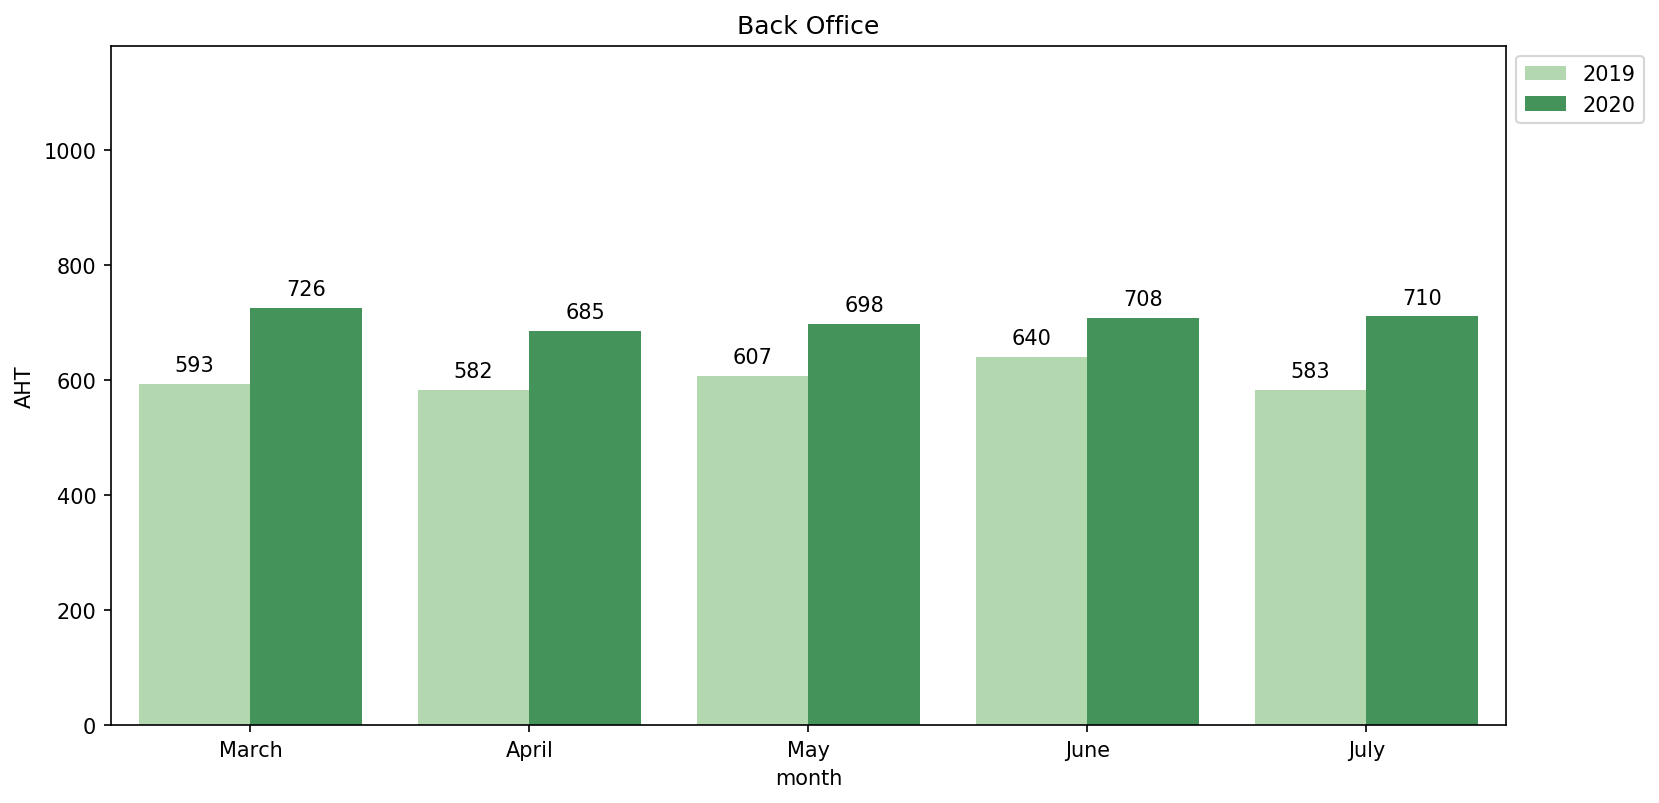

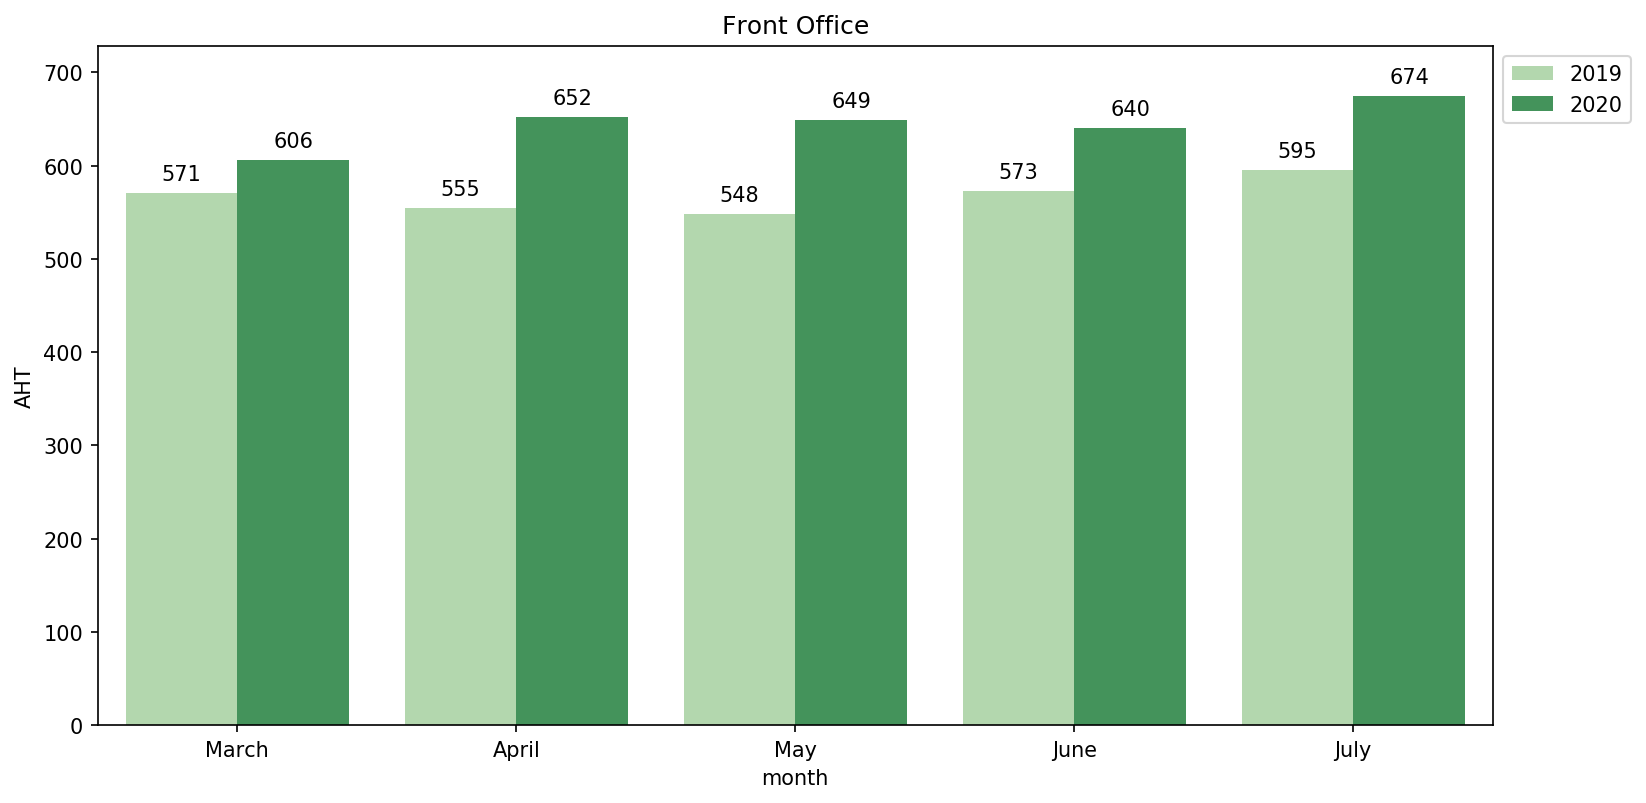

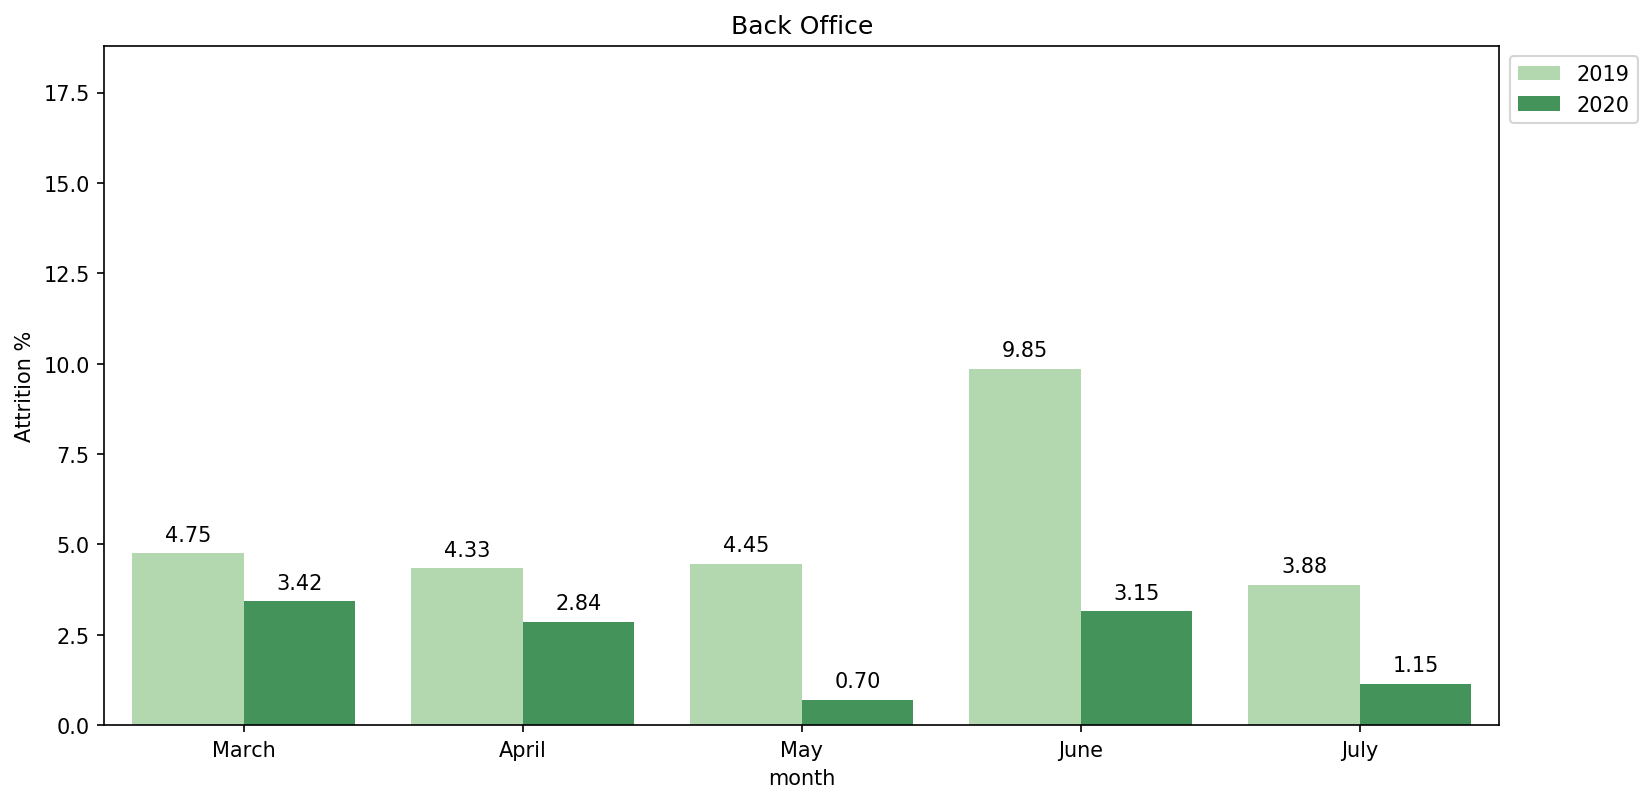

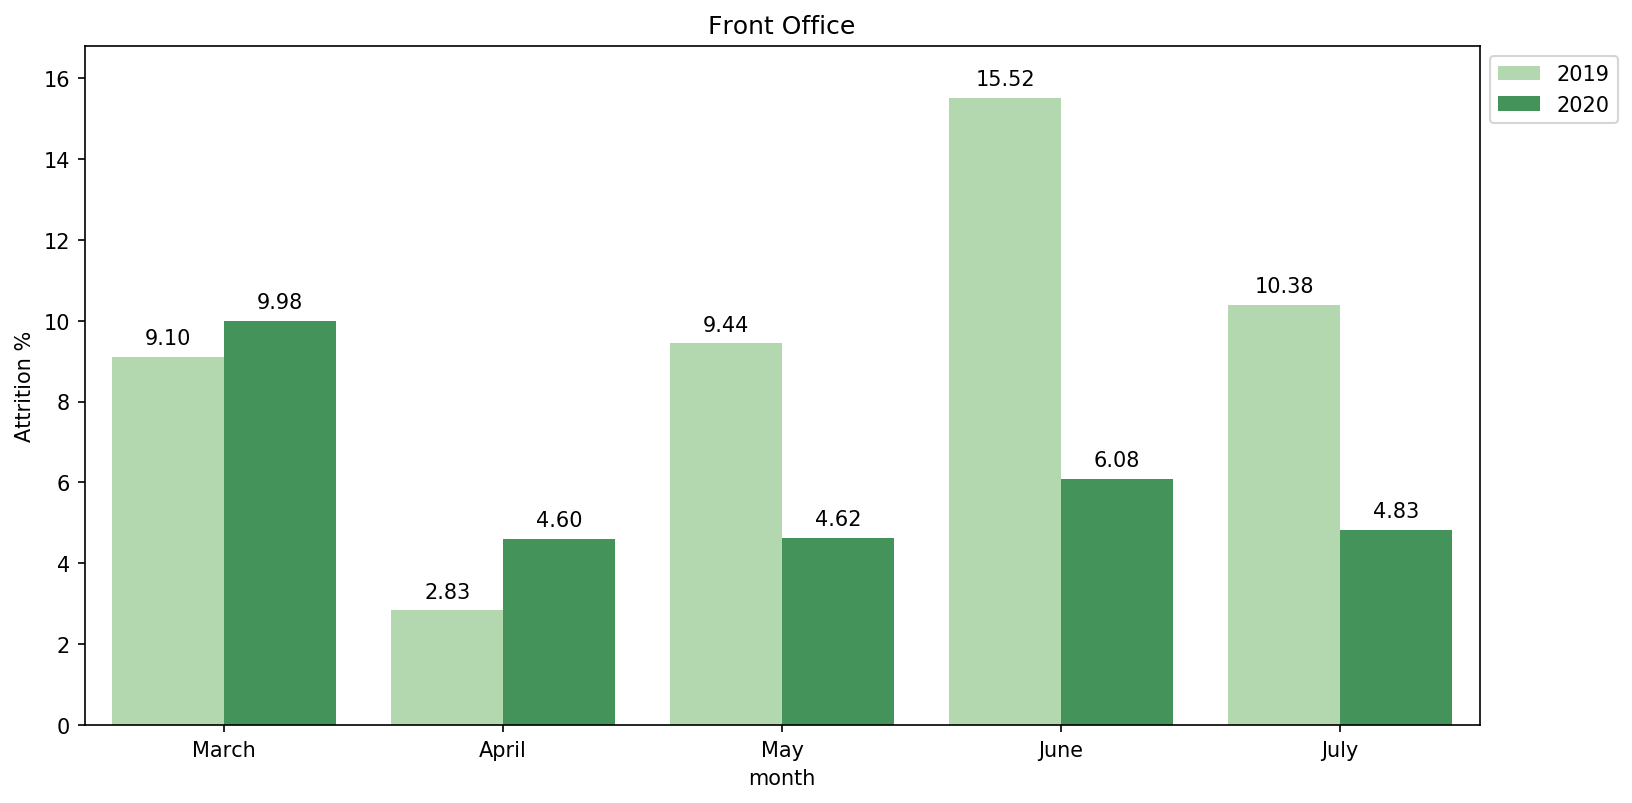

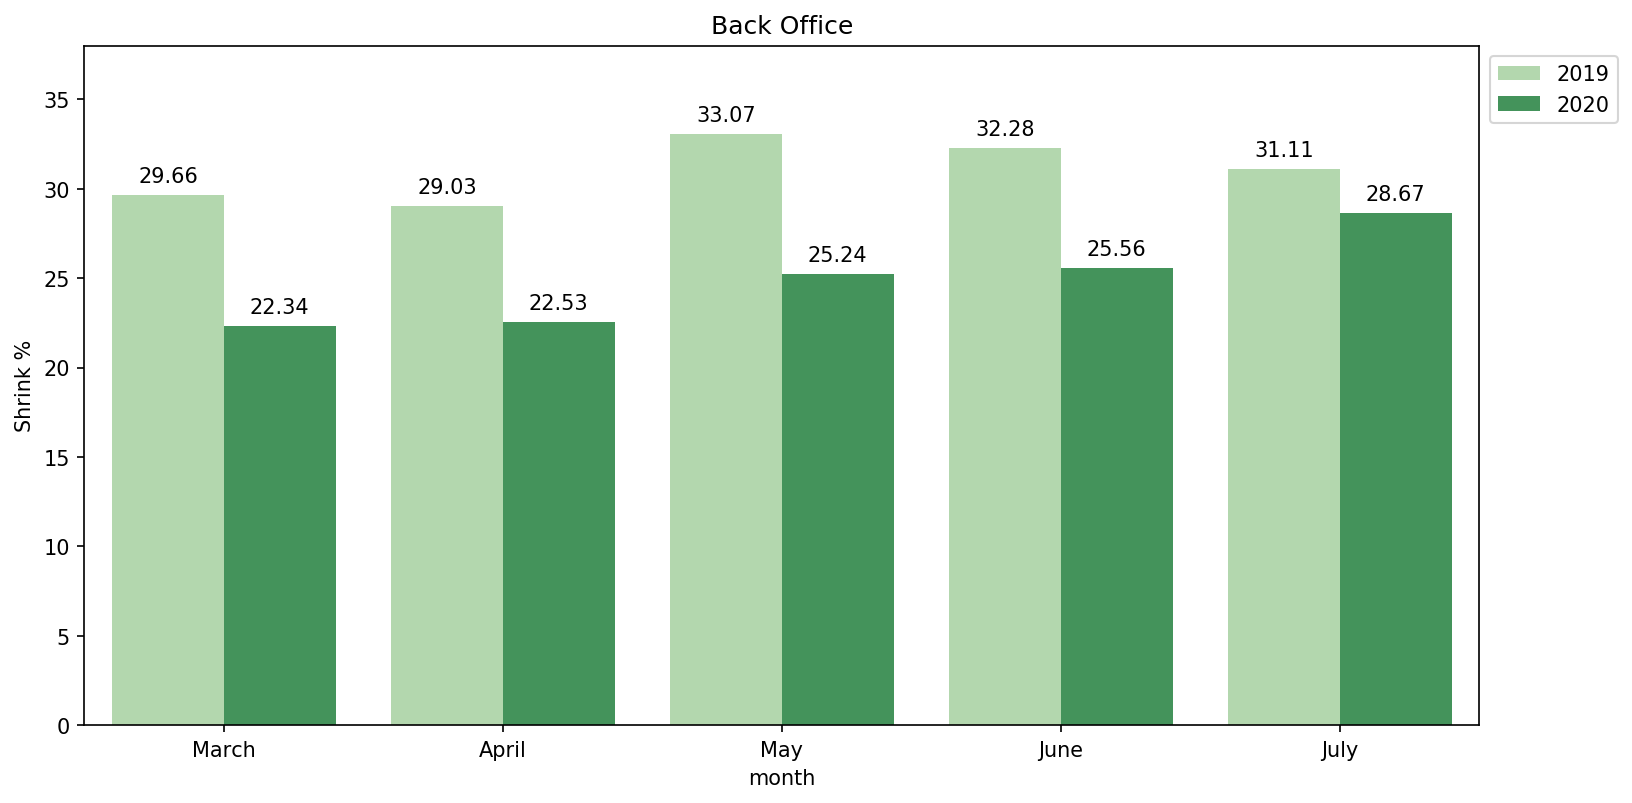

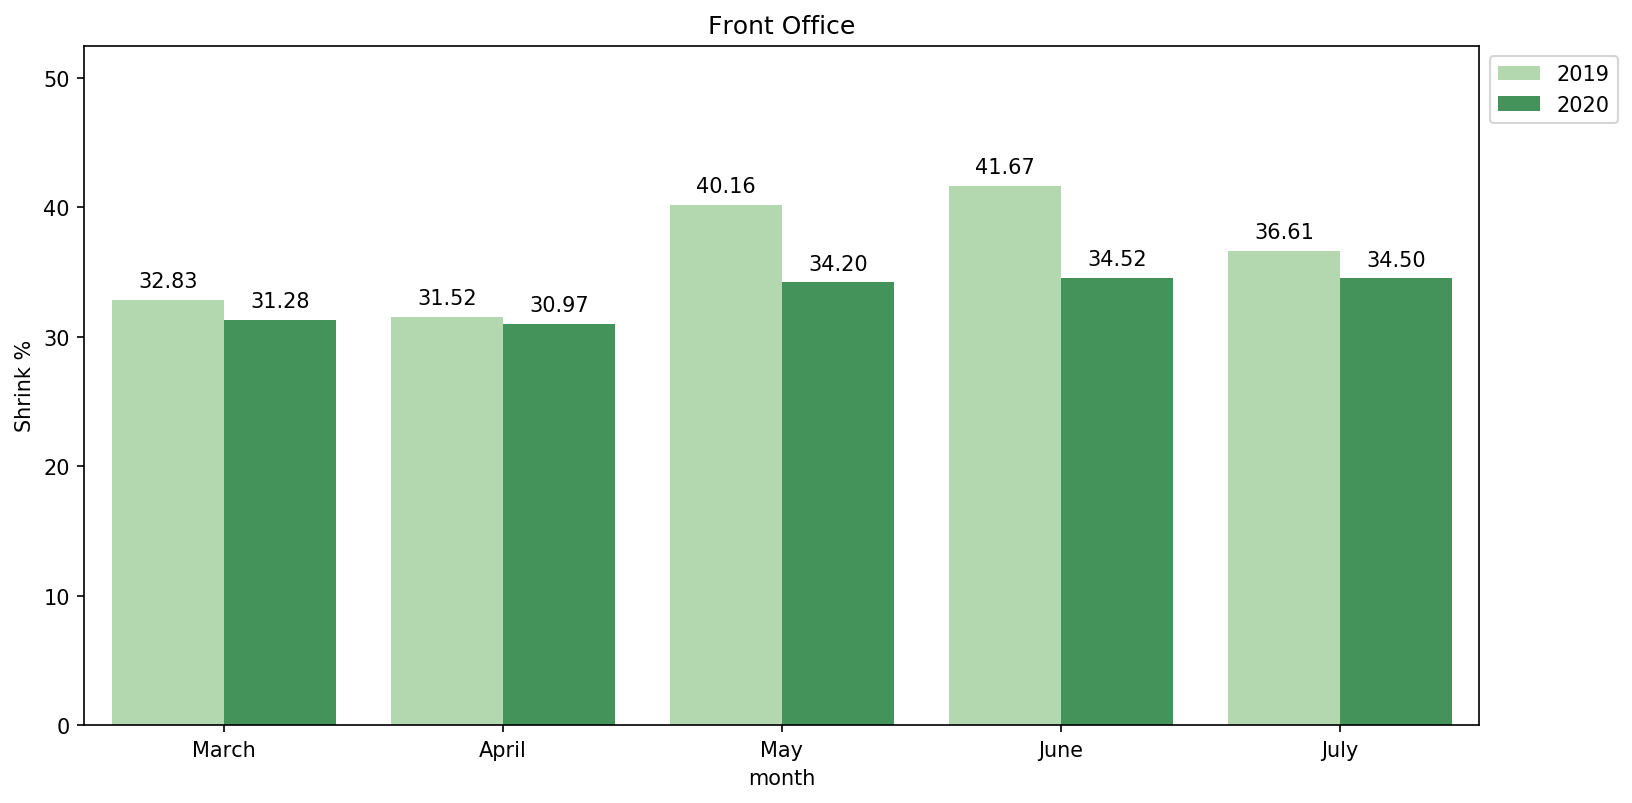

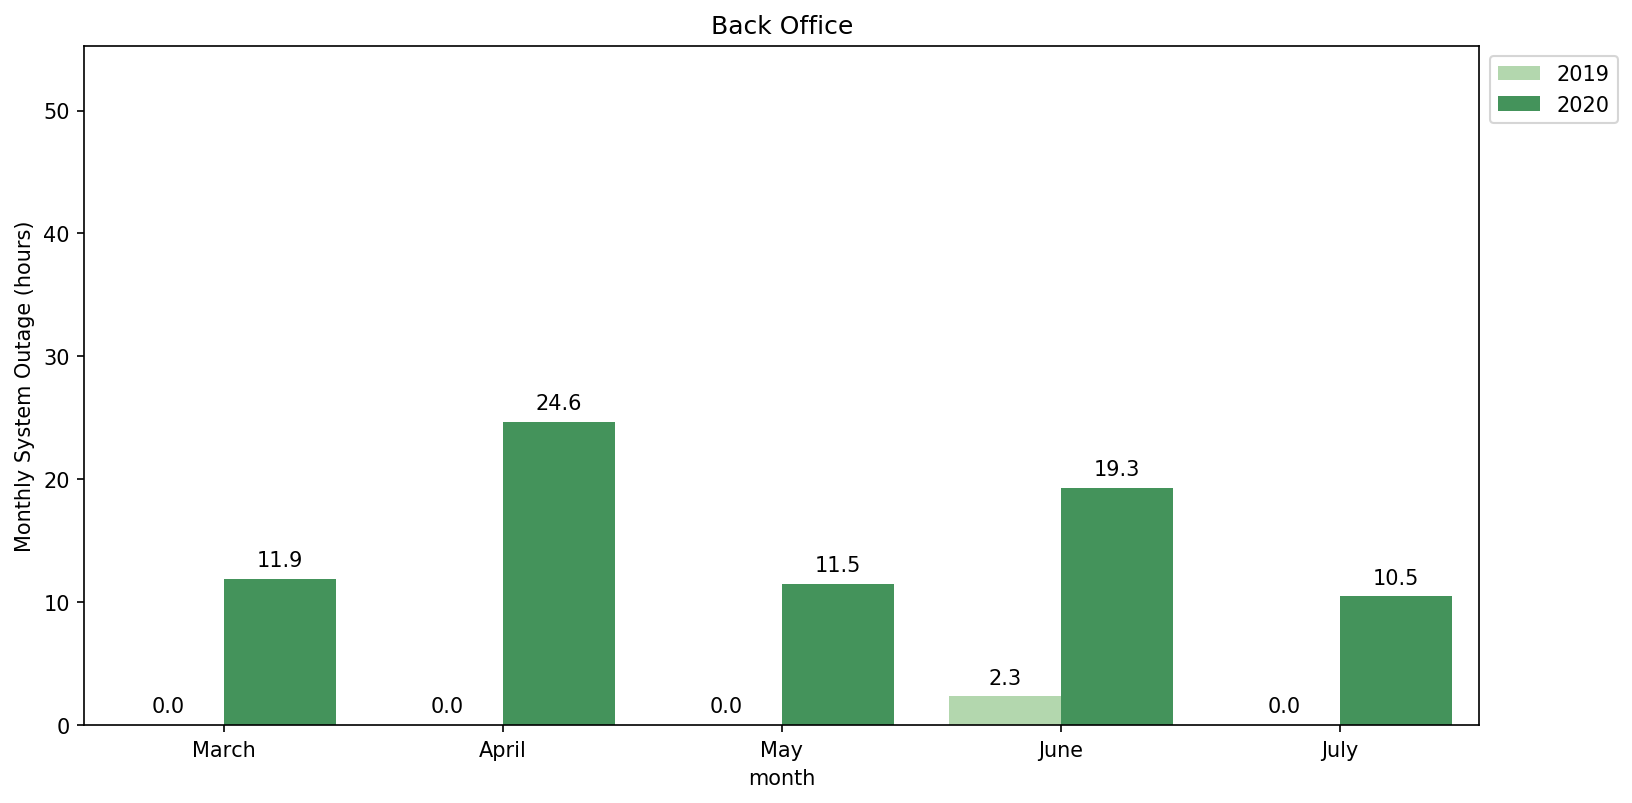

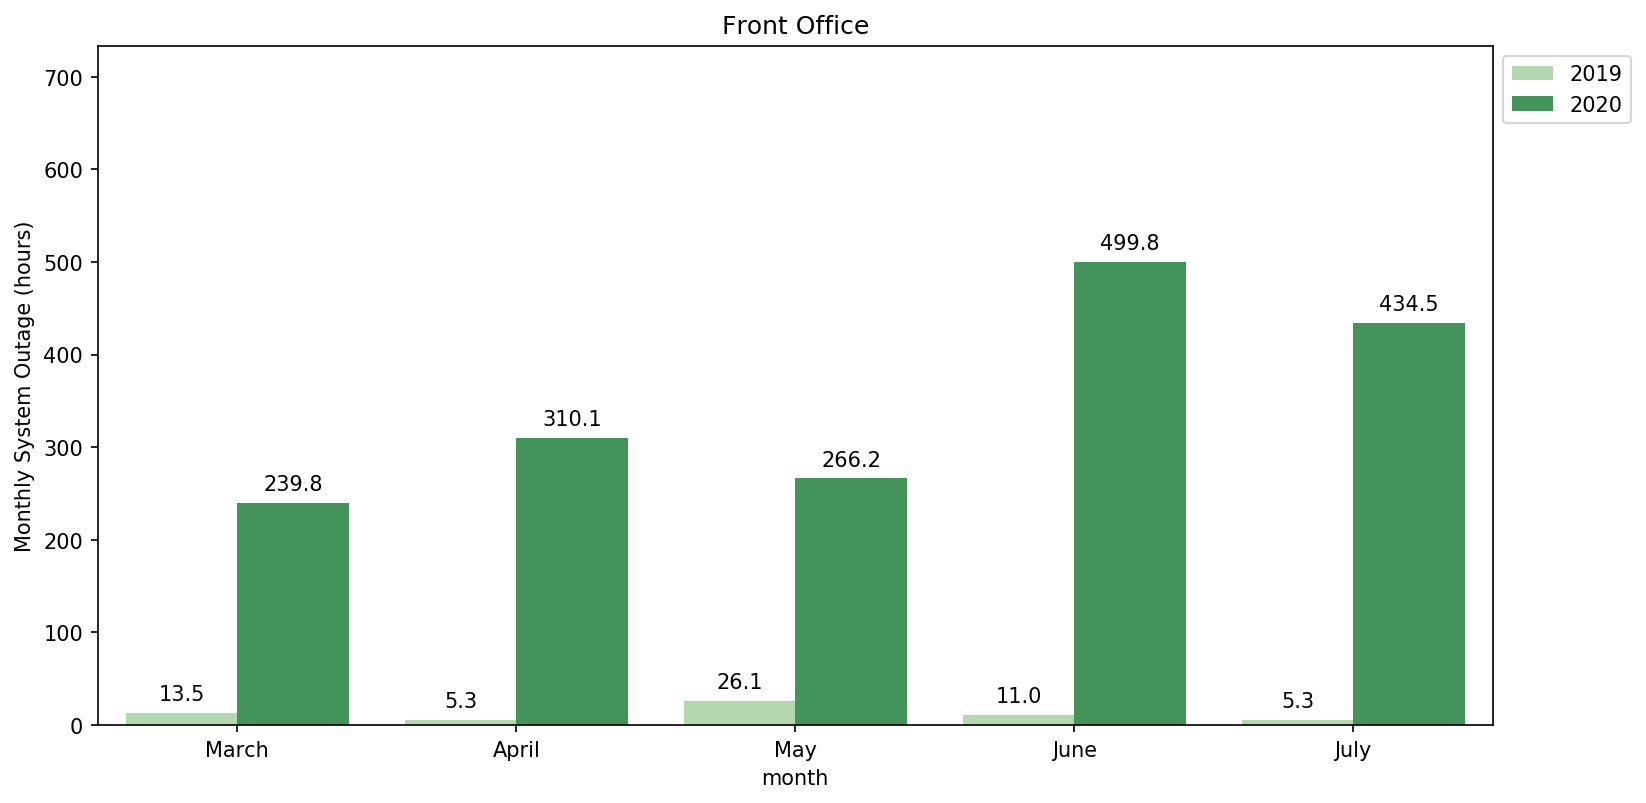

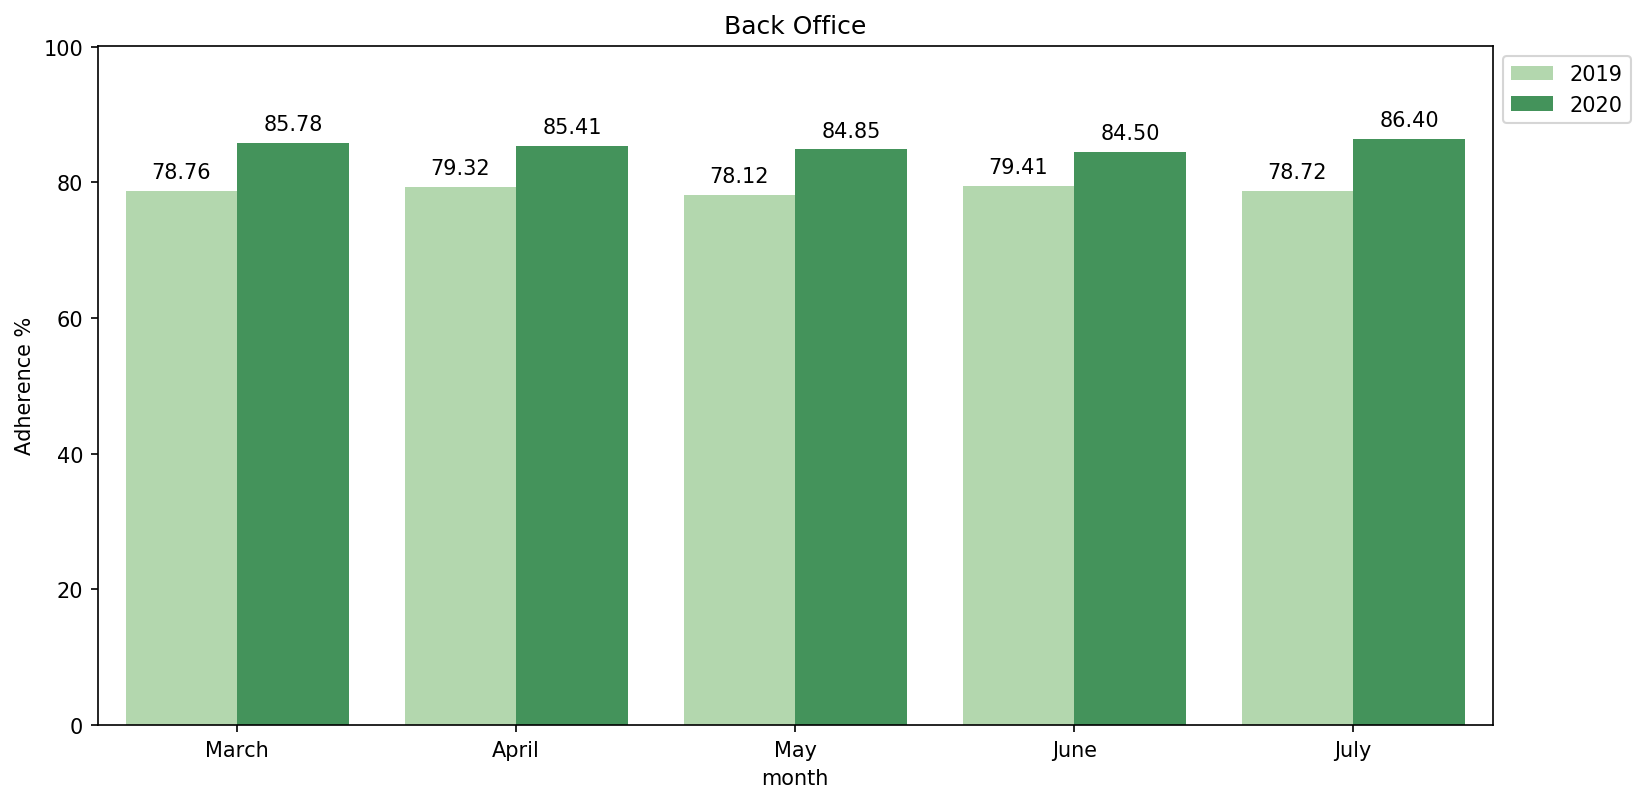

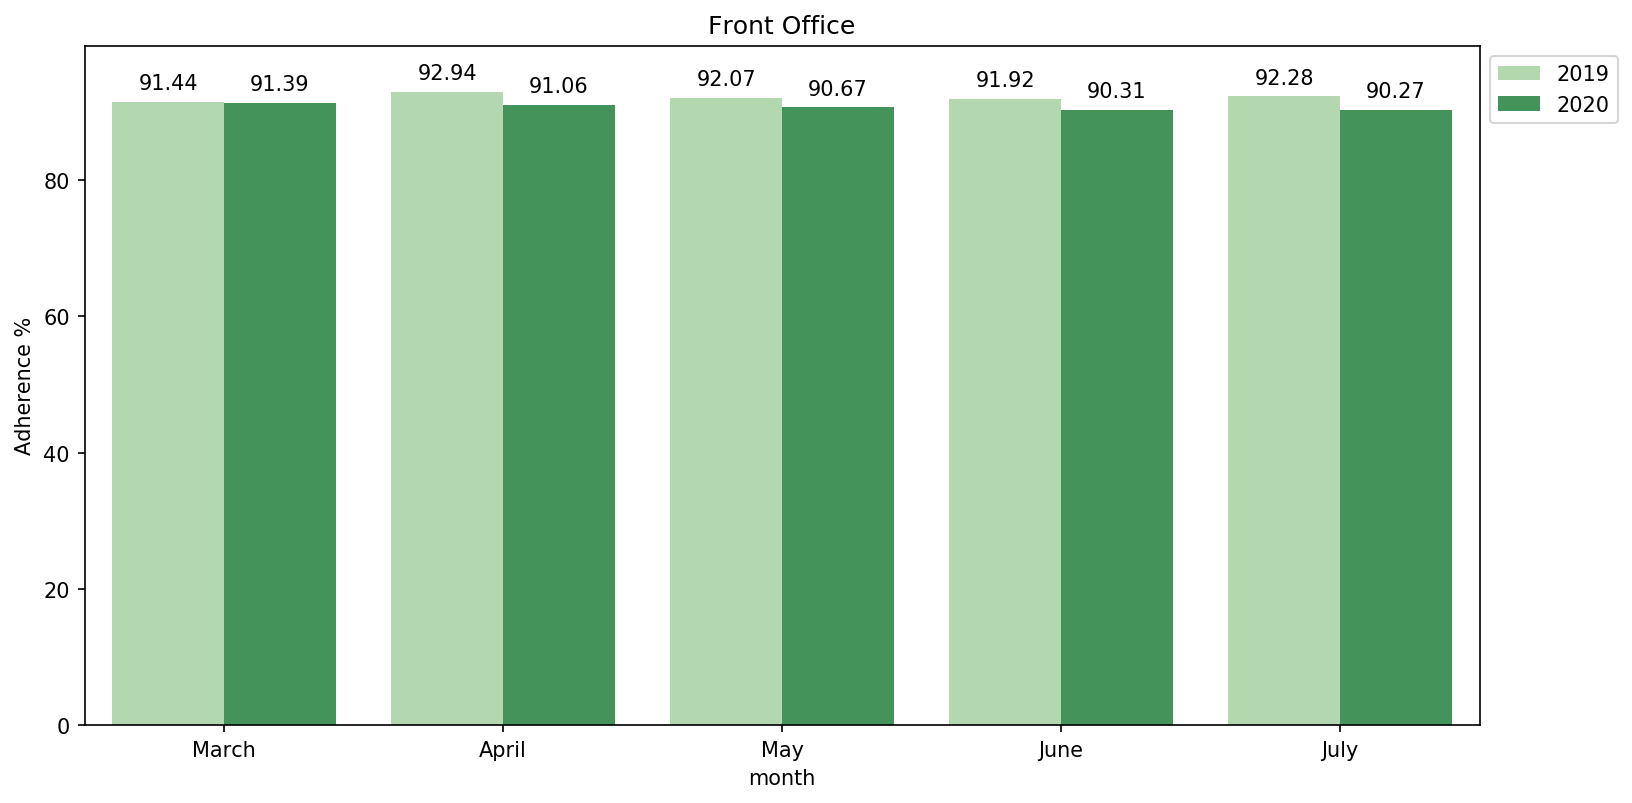

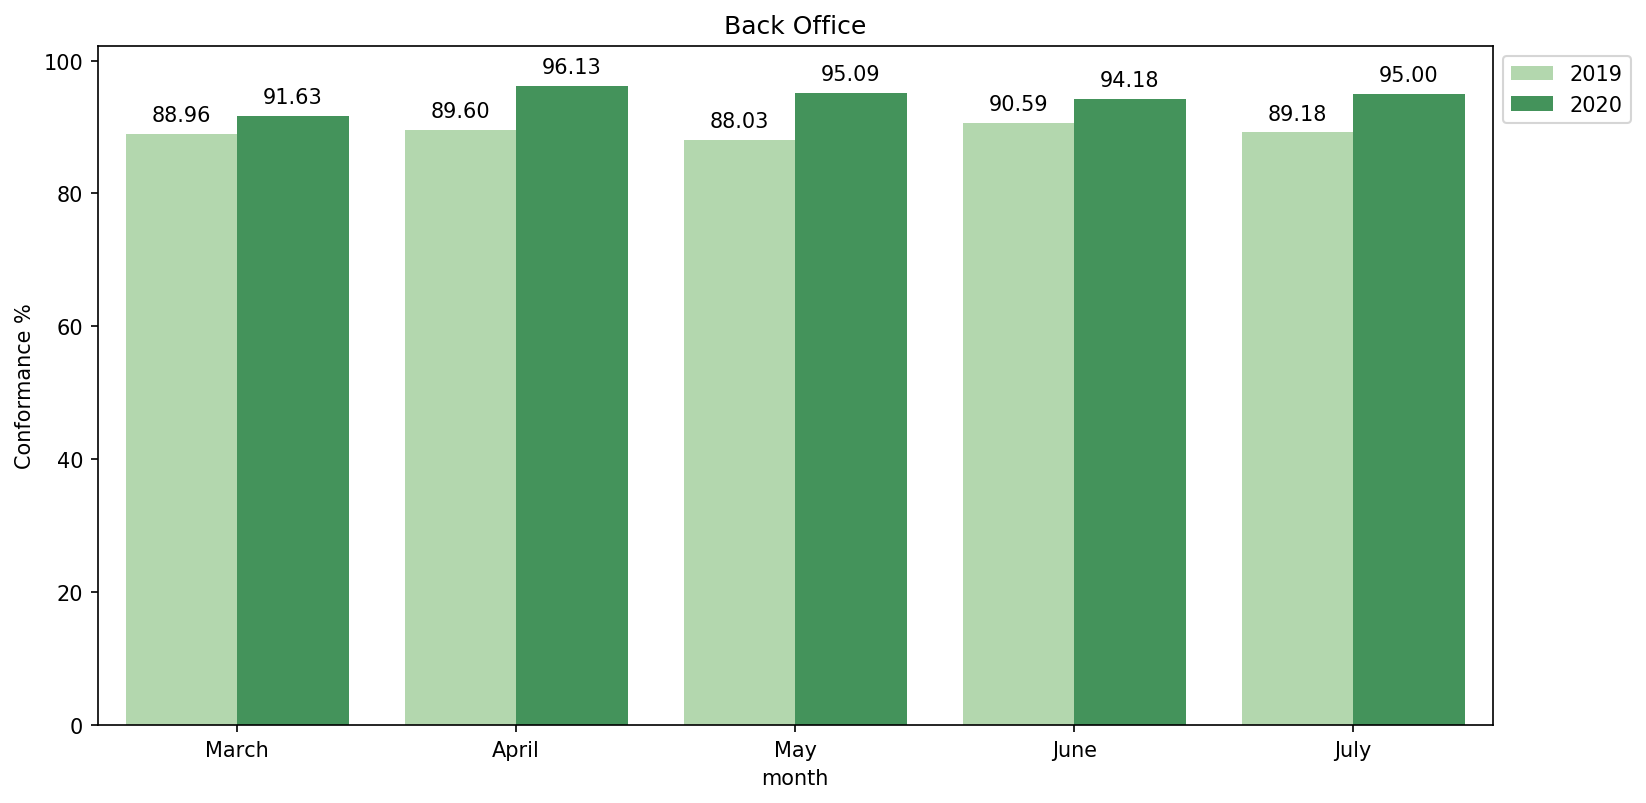

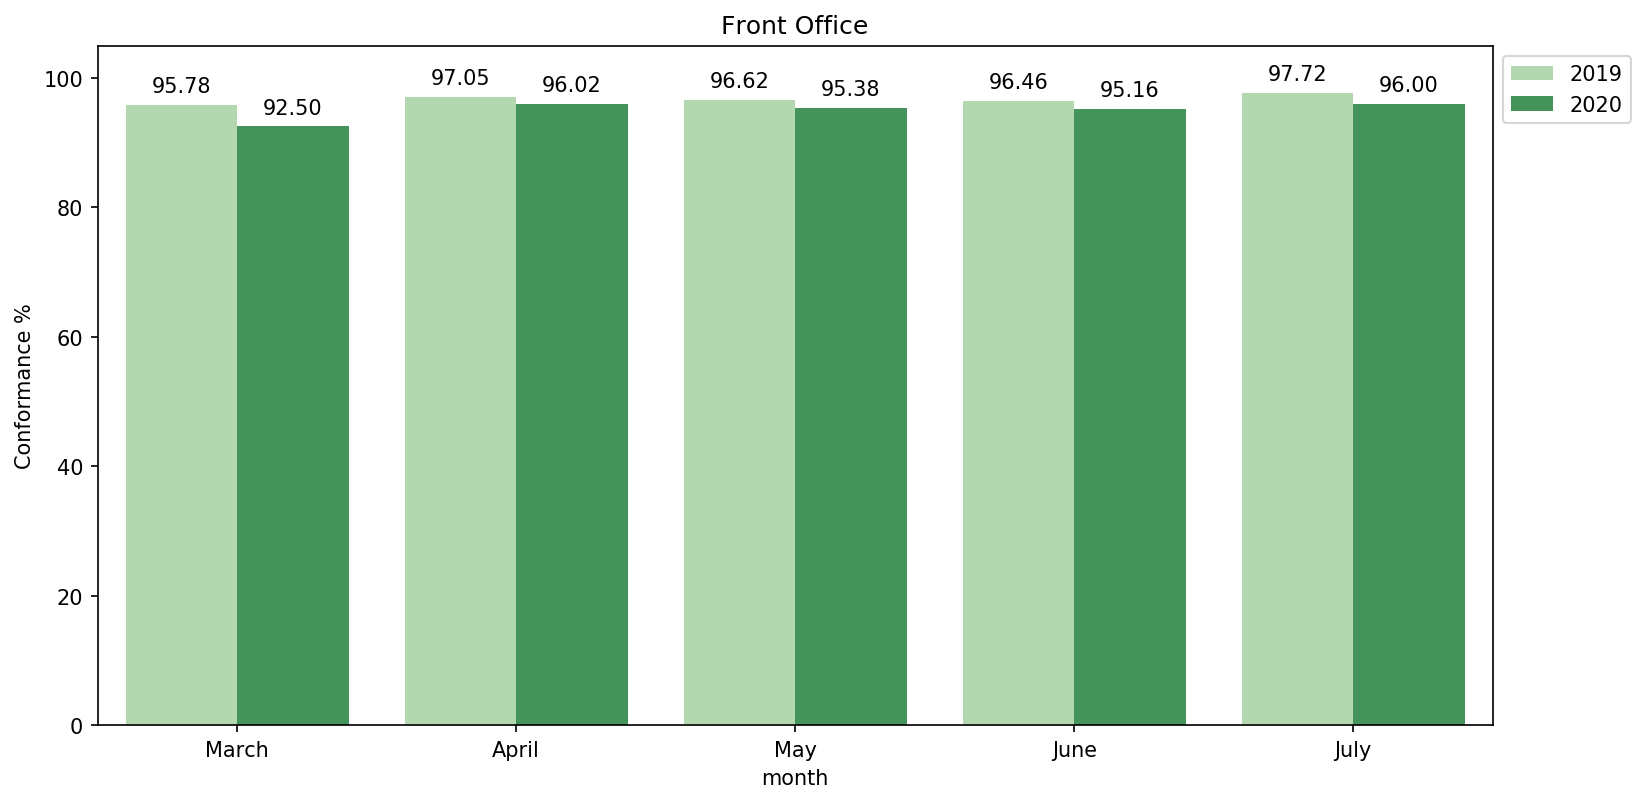

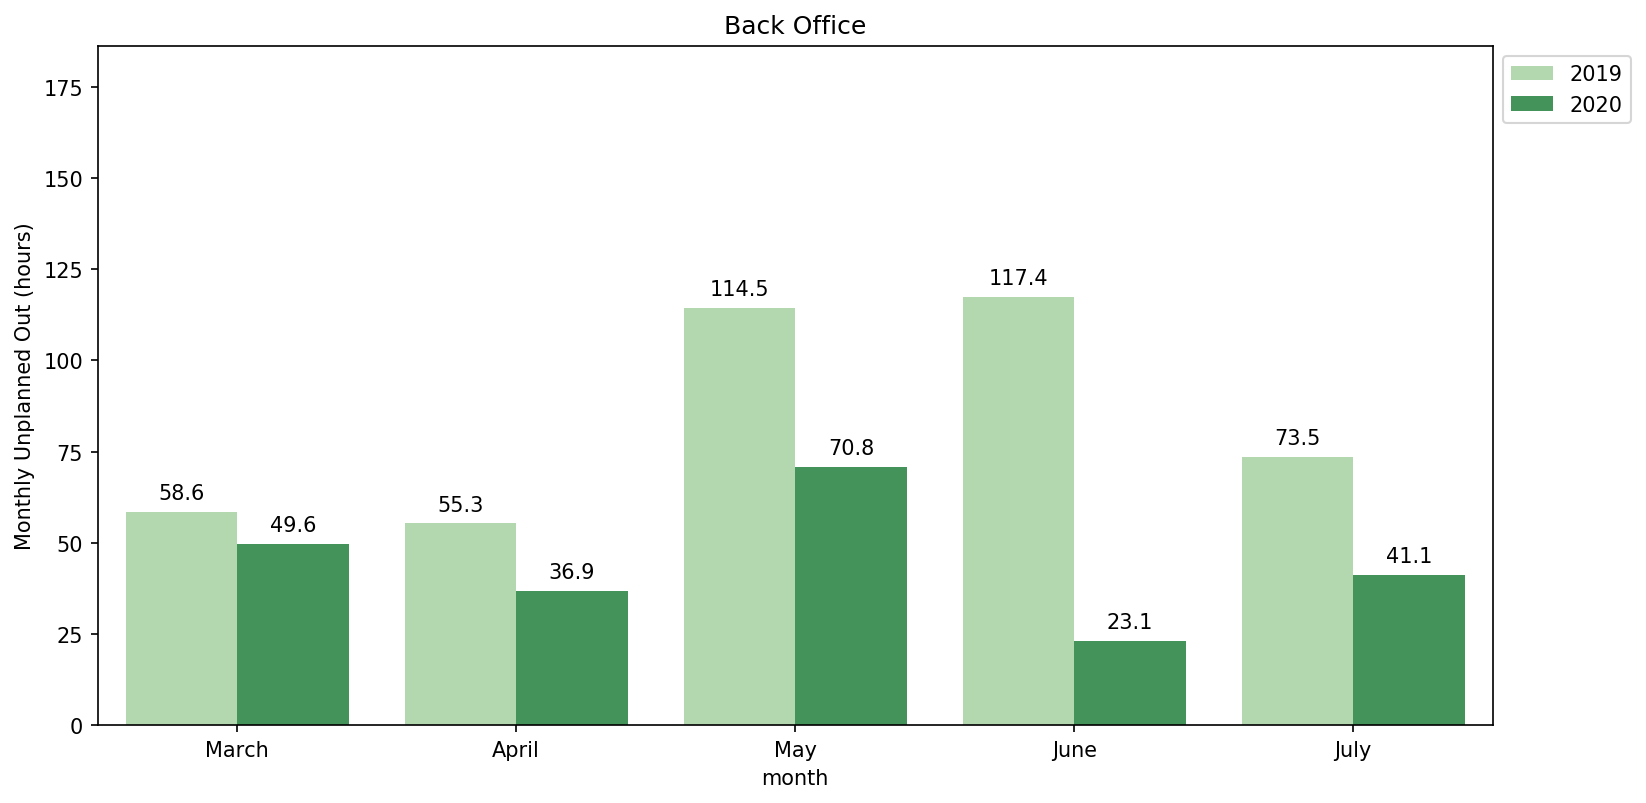

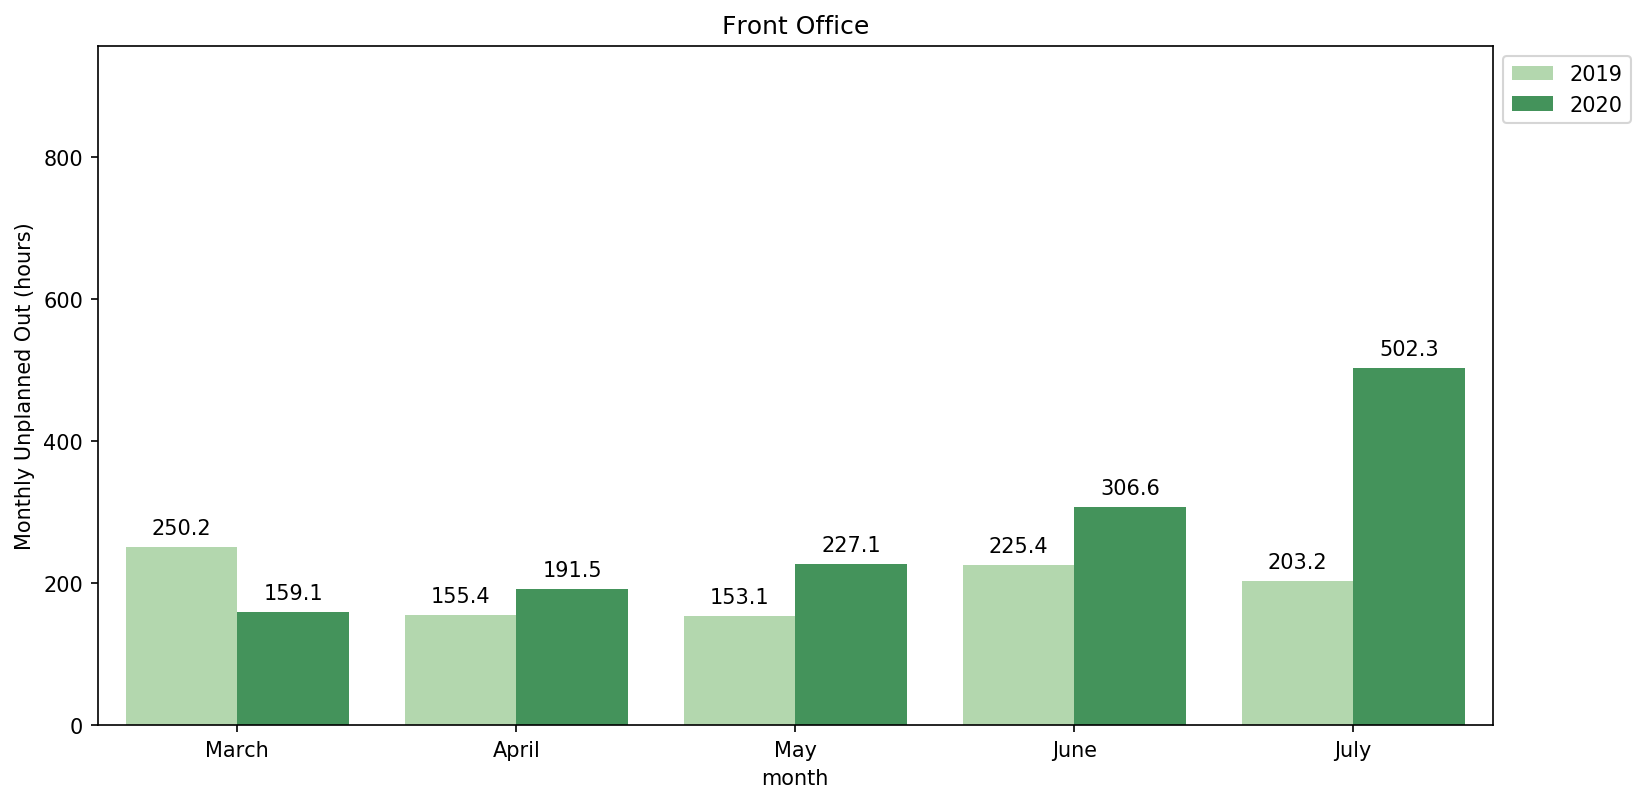

In [20]:
for c in ['AHT', 'Attrition %', 'Shrink %', 'Monthly System Outage (hours)', 'Adherence %', 'Conformance %',
         'Monthly Unplanned Out (hours)']:
    if c in set(['Attrition %', 'Shrink %', 'Adherence %', 'Conformance %']):
        precision = '.2f'
    elif c == 'AHT':
        precision = '.0f'
    else:
        precision = '.1f'
    for bu in df['Back/Front Office'].unique():
        plt.figure(figsize=(12,6), dpi=150)
        splot = sns.barplot(data=df[df['Back/Front Office']==bu], palette='Greens', x='month', y=c, hue='year',
                           errwidth=0)
        for p in splot.patches:
            splot.annotate(format(p.get_height(), precision), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
        plt.title(bu)
        plt.savefig('./png/'+c+'_'+bu+'_barplot.png', format="png")
        plt.show()

In [21]:
df.groupby(['Back/Front Office','year']).mean()

AHT  Attrition %  Shrink %  \
Back/Front Office year                                      
Back Office       2019  600.866667     5.454667    31.028   
                  2020  705.266667     2.253333    24.868   
Front Office      2019  568.500000     9.453000    36.560   
                  2020  644.500000     6.022000    33.096   

                        Monthly System Outage (hours)  \
Back/Front Office year                                  
Back Office       2019                       0.466667   
                  2020                      15.568000   
Front Office      2019                      12.233000   
                  2020                     350.062000   

                        Monthly Sameday Callout (hours)  \
Back/Front Office year                                    
Back Office       2019                       551.856000   
                  2020                       290.312667   
Front Office      2019                      2039.927000   
                  2020                      1824.601000   

                        Monthly Unplanned Out (hours)  \
Back/Front Office year                                  
Back Office       2019                      83.866667   
                  2020                      44.282000   
Front Office      2019                     197.475000   
                  2020                     277.350000   

                        Monthly Planned Out (hours)  Adherence %  \
Back/Front Office year                                             
Back Office       2019                   722.225333    78.866667   
                  2020                   625.771333    85.386667   
Front Office      2019                  1864.390000    92.134000   
                  2020                  1995.145000    90.743000   

                        Conformance %  ACW/ Call (seconds)  \
Back/Front Office year                                       
Back Office       2019         89.272                0.000   
                  2020         94.406                0.000   
Front Office      2019         96.727              116.643   
                  2020         95.011              142.824   

                        AVG Hold Time (seconds)  \
Back/Front Office year                            
Back Office       2019                    0.000   
                  2020                    0.000   
Front Office      2019                   64.577   
                  2020                   76.444   

                        Monthly Processing-No Work (minutes)  
Back/Front Office year                                        
Back Office       2019                                 0.000  
                  2020                              4101.404  
Front Office      2019                                 0.000  
                  2020                                 0.000

In [22]:
df.groupby(['Back/Front Office','month', 'year']).mean()

AHT  Attrition %   Shrink %  \
Back/Front Office month year                                       
Back Office       April 2019  582.000000     4.333333  29.026667   
                        2020  684.666667     2.843333  22.533333   
                  July  2019  582.666667     3.883333  31.106667   
                        2020  710.333333     1.150000  28.666667   
                  June  2019  639.666667     9.853333  32.276667   
                        2020  707.666667     3.146667  25.556667   
                  March 2019  592.666667     4.750000  29.663333   
                        2020  725.666667     3.423333  22.343333   
                  May   2019  607.333333     4.453333  33.066667   
                        2020  698.000000     0.703333  25.240000   
Front Office      April 2019  555.000000     2.835000  31.525000   
                        2020  652.500000     4.600000  30.970000   
                  July  2019  595.000000    10.380000  36.610000   
                        2020  674.500000     4.825000  34.505000   
                  June  2019  573.000000    15.515000  41.675000   
                        2020  640.500000     6.080000  34.525000   
                  March 2019  571.000000     9.100000  32.825000   
                        2020  606.000000     9.985000  31.280000   
                  May   2019  548.500000     9.435000  40.165000   
                        2020  649.000000     4.620000  34.200000   

                              Monthly System Outage (hours)  \
Back/Front Office month year                                  
Back Office       April 2019                       0.000000   
                        2020                      24.633333   
                  July  2019                       0.000000   
                        2020                      10.466667   
                  June  2019                       2.333333   
                        2020                      19.316667   
                  March 2019                       0.000000   
                        2020                      11.906667   
                  May   2019                       0.000000   
                        2020                      11.516667   
Front Office      April 2019                       5.300000   
                        2020                     310.075000   
                  July  2019                       5.290000   
                        2020                     434.475000   
                  June  2019                      11.005000   
                        2020                     499.810000   
                  March 2019                      13.485000   
                        2020                     239.775000   
                  May   2019                      26.085000   
                        2020                     266.175000   

                              Monthly Sameday Callout (hours)  \
Back/Front Office month year                                    
Back Office       April 2019                       563.196667   
                        2020                       251.416667   
                  July  2019                       493.946667   
                        2020                       223.526667   
                  June  2019                       474.806667   
                        2020                       305.473333   
                  March 2019                       597.636667   
                        2020                       442.436667   
                  May   2019                       629.693333   
                        2020                       228.710000   
Front Office      April 2019                      2035.080000   
                        2020                      1454.650000   
                  July  2019                      2058.610000   
                        2020                      1871.590000   
                  June  2019                      1641.735000   
                        2020                    

In [23]:
# compare AHT standard deviations for front office of 2019 to 2020
print('AHT standard deviation\n')
print('front office 2019:', df[(df['Back/Front Office']=='Front Office') & (df['year']==2019)]['AHT'].std(), 
'\nfront office 2020:',df[(df['Back/Front Office']=='Front Office') & (df['year']==2020)]['AHT'].std())
print('back office 2019:', df[(df['Back/Front Office']=='Back Office') & (df['year']==2019)]['AHT'].std(), 
'\nback office 2020:',df[(df['Back/Front Office']=='Back Office') & (df['year']==2020)]['AHT'].std())

AHT standard deviation

front office 2019: 24.35957489138283 
front office 2020: 39.45531931466557
back office 2019: 267.5256641004391 
back office 2020: 300.3182756121689


For the months of March through July, the standard deviation of AHT for the 2019 front and back office is significantly lower than 2020, implying that 2020 is more variable.

In [24]:
## create 2 samples to test
a = df[(df['Back/Front Office']=='Front Office') & (df['year']==2019)]['AHT']
b = df[(df['Back/Front Office']=='Front Office') & (df['year']==2020)]['AHT']
    
print('Front Office:', ttest_ind(a, b, axis=0, equal_var=False, nan_policy='propagate'))

Front Office: Ttest_indResult(statistic=-5.183023053461618, pvalue=0.00011153142815503682)


In [25]:
## create 2 samples to test back office
a = df[(df['Back/Front Office']=='Back Office') & (df['year']==2019)]['AHT']
b = df[(df['Back/Front Office']=='Back Office') & (df['year']==2020)]['AHT']
    
print('Back Office:', ttest_ind(a, b, axis=0, equal_var=False, nan_policy='propagate'))

Back Office: Ttest_indResult(statistic=-1.005331181134062, pvalue=0.32345990578377115)


## Conclusion

1. Front office AHT was significantly lower for 2019 when compared to 2020 per p-value 0.0001
2. There is no significant difference in back office AHT for 2019 when compared to 2020 per p-value 0.3